## **Driver Churn Prediction**


**Dataset**

| Feature              | Description                                                                                             |
|----------------------|---------------------------------------------------------------------------------------------------------|
| MMMM-YY              | Reporting Date (Monthly)                                                                                |
| Driver_ID            | Unique ID for drivers                                                                                   |
| Age                  | Age of the driver                                                                                       |
| Gender               | Gender of the driver – Male : 0, Female: 1                                                              |
| City                 | City Code of the driver                                                                                 |
| Education_Level      | Education level – 0 for 10+, 1 for 12+, 2 for graduate                                                  |
| Income               | Monthly average Income of the driver                                                                    |
| Date Of Joining      | Joining date for the driver                                                                             |
| LastWorkingDate      | Last date of working for the driver                                                                     |
| Joining Designation  | Designation of the driver at the time of joining                                                        |
| Grade                | Grade of the driver at the time of reporting                                                            |
| Total Business Value | The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments) |
| Quarterly Rating     | Quarterly rating of the driver: 1, 2, 3, 4, 5 (higher is better)                                        |



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Driver_Info.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [4]:
df = df.iloc[:,1:]

In [5]:
df.isnull().sum().to_frame(name='null_count')

,null_count
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


### **Observations**

- We can see that there are lot of missing values in the dataset for LastWorkingDate
- There are some missing values for Age and Gender

#### Data Cleaning and Feature Engineering

In [6]:
df['reporting_month_year'] = pd.to_datetime(df['MMM-YY'], format='%m/%d/%y')
df.drop(columns=['MMM-YY'], inplace=True)

df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y', errors='coerce')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y', errors='coerce')

df['Quarter'] = df['reporting_month_year'].dt.quarter
df['ReportingYear'] = df['reporting_month_year'].dt.year
df['ReportingYear_Quarter'] = df['ReportingYear'].astype(str) + '-' + df['Quarter'].astype(str)

In [7]:
df = df.drop_duplicates()

In [8]:
df[df["Gender"].isnull()]

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,reporting_month_year,Quarter,ReportingYear,ReportingYear_Quarter
240,43,27.0,NaN,C15,0,12906,2018-07-13,2019-02-20,1,1,0,1,2019-02-01,1,2019,2019-1
258,49,21.0,NaN,C20,0,53039,2018-05-25,NaT,1,2,0,1,2019-02-01,1,2019,2019-1
264,49,21.0,NaN,C20,0,53039,2018-05-25,NaT,1,2,300300,2,2019-08-01,3,2019,2019-3
466,68,31.0,NaN,C29,0,79288,2015-10-18,NaT,1,3,544930,3,2019-08-01,3,2019,2019-3
820,116,21.0,NaN,C11,0,16477,2018-04-12,NaT,1,1,129590,1,2019-02-01,1,2019,2019-1
859,119,31.0,NaN,C29,1,71000,2019-11-16,NaT,3,3,0,1,2019-11-01,4,2019,2019-4
1514,225,32.0,NaN,C14,0,44792,2020-07-13,NaT,3,3,337020,3,2020-12-01,4,2020,2020-4
1892,296,31.0,NaN,C20,1,65094,2018-10-06,NaT,1,2,145670,2,2019-08-01,3,2019,2019-3
2277,354,31.0,NaN,C11,0,60555,2018-11-30,NaT,1,1,0,1,2019-02-01,1,2019,2019-1
2359,365,24.0,NaN,C22,0,44740,2020-01-02,NaT,2,2,0,1,2020-03-01,1,2020,2020-1


In [9]:
df[df["Driver_ID"] == 305].sort_values("reporting_month_year").head(20)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,reporting_month_year,Quarter,ReportingYear,ReportingYear_Quarter
1927,305,NaN,0.0,C9,0,20176,2018-08-26,NaT,1,1,0,1,2019-01-01,1,2019,2019-1
1928,305,24.0,0.0,C9,0,20176,2018-08-26,2019-08-02,1,1,0,1,2019-02-01,1,2019,2019-1


In [10]:
from sklearn.impute import KNNImputer

list_of_columns = [
    'Driver_ID',
    'Age',
    'Gender',
    'Education_Level',
    'Income',
    'Joining Designation',
    'Grade',
    'Total Business Value',
    'Quarterly Rating'
]

df_subset = df[list_of_columns].copy()

k_imputer = KNNImputer(n_neighbors=5, weights='distance')

df_imputed = pd.DataFrame(
    k_imputer.fit_transform(df_subset),
    columns=list_of_columns
)

df['Age'] = df['Age'].fillna(df_imputed['Age'].round().astype('Int64'))
df['Gender'] = df['Gender'].fillna(df_imputed['Gender'].round().astype('Int64'))

df.head()


,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,reporting_month_year,Quarter,ReportingYear,ReportingYear_Quarter
0,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019-01-01,1,2019,2019-1
1,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019-02-01,1,2019,2019-1
2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,2019-03-01,1,2019,2019-1
3,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020-11-01,4,2020,2020-4
4,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,2020-12-01,4,2020,2020-4


In [11]:
df = df.sort_values(['Driver_ID', 'reporting_month_year'])

df['LastWorkingDate'] = df.groupby('Driver_ID')['LastWorkingDate'].transform(lambda x: x.ffill())

df['Churned'] = df['LastWorkingDate'].notnull().astype(int)

df['Had_Negative_Business'] = (df['Total Business Value'] < 0).astype(int)

df['Income_first'] = df.groupby('Driver_ID')['Income'].transform('first')
df['Income_last'] = df.groupby('Driver_ID')['Income'].transform('last')
df['Has_Income_Increased'] = (df['Income_last'] > df['Income_first']).astype(int)

df['Rating_first'] = df.groupby('Driver_ID')['Quarterly Rating'].transform('first')
df['Rating_last'] = df.groupby('Driver_ID')['Quarterly Rating'].transform('last')
df['Has_Rating_Increased'] = (df['Rating_last'] > df['Rating_first']).astype(int)

In [12]:
df = df.sort_values(['Driver_ID', 'reporting_month_year'])

first_income = df.groupby('Driver_ID')['Income'].transform('first')
last_income = df.groupby('Driver_ID')['Income'].transform('last')

df['diff_Income'] = last_income - first_income

result_df = df[df['diff_Income'] > 0]

result_df[['Driver_ID', 'reporting_month_year', 'Income', 'diff_Income']].head(20)

,Driver_ID,reporting_month_year,Income,diff_Income
138,26,2019-01-01,121529,11048
139,26,2019-02-01,121529,11048
140,26,2019-03-01,121529,11048
141,26,2019-04-01,121529,11048
142,26,2019-05-01,121529,11048
143,26,2019-06-01,121529,11048
144,26,2019-07-01,121529,11048
145,26,2019-08-01,121529,11048
146,26,2019-09-01,121529,11048
147,26,2019-10-01,121529,11048


In [13]:
df = df.sort_values(['Driver_ID', 'reporting_month_year'])

first_grade = df.groupby('Driver_ID')['Grade'].transform('first')
last_grade = df.groupby('Driver_ID')['Grade'].transform('last')

df['diff_grade'] = last_grade - first_grade

result_driver_ids = df.loc[df['diff_grade'] > 0, 'Driver_ID'].drop_duplicates().reset_index(drop=True)

result_driver_ids.head(20)

0       26
1       54
2       60
3       98
4      275
5      307
6      320
7      368
8      434
9      537
10     568
11     580
12     638
13     716
14     789
15     888
16    1031
17    1050
18    1161
19    1165
Name: Driver_ID, dtype: int64

In [14]:
grouped = df.groupby('Driver_ID').agg({
    'reporting_month_year': 'max',
    'Dateofjoining': 'max',
    'LastWorkingDate': 'max'
}).reset_index()

grouped.rename(columns={
    'reporting_month_year': 'max_reporting_month_year',
    'Dateofjoining': 'max_Dateofjoining',
    'LastWorkingDate': 'max_LastWorkingDate'
}, inplace=True)

filtered = grouped[grouped['max_LastWorkingDate'] < grouped['max_Dateofjoining']]

filtered.head()

,Driver_ID,max_reporting_month_year,max_Dateofjoining,max_LastWorkingDate
3,5,2019-03-01,2019-09-01,2019-07-03
12,18,2019-05-01,2019-09-01,2019-04-30
23,35,2020-05-01,2020-07-03,2020-05-05
45,59,2019-03-01,2019-06-01,2019-03-28
66,82,2020-08-01,2020-11-04,2020-07-29


In [15]:
agg_df = df.groupby('Driver_ID').agg(
    max_qr=('Quarterly Rating', 'max'),
    min_qr=('Quarterly Rating', 'min'),
    avg_qr=('Quarterly Rating', 'mean'),
    count_qr=('Quarterly Rating', 'count')
).reset_index()

agg_df = agg_df.sort_values('count_qr', ascending=False)

agg_df.head()


,Driver_ID,max_qr,min_qr,avg_qr,count_qr
1794,2110,2,1,1.375,24
2235,2617,2,1,1.750,24
1380,1623,3,2,2.250,24
1398,1642,4,1,2.250,24
1400,1644,3,1,2.125,24


In [16]:
df[df["Total Business Value"] == 0].head(10)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,...,Churned,Had_Negative_Business,Income_first,Income_last,Has_Income_Increased,Rating_first,Rating_last,Has_Rating_Increased,diff_Income,diff_grade
2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,...,1,0,57387,57387,0,2,2,0,0,0
3,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,...,0,0,67016,67016,0,1,1,0,0,0
4,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,...,0,0,67016,67016,0,1,1,0,0,0
5,4,43.0,0.0,C13,2,65603,2019-07-12,NaT,2,2,...,0,0,65603,65603,0,1,1,0,0,0
6,4,43.0,0.0,C13,2,65603,2019-07-12,NaT,2,2,...,0,0,65603,65603,0,1,1,0,0,0
7,4,43.0,0.0,C13,2,65603,2019-07-12,NaT,2,2,...,0,0,65603,65603,0,1,1,0,0,0
9,4,43.0,0.0,C13,2,65603,2019-07-12,2020-04-27,2,2,...,1,0,65603,65603,0,1,1,0,0,0
10,5,29.0,0.0,C9,0,46368,2019-09-01,NaT,1,1,...,0,0,46368,46368,0,1,1,0,0,0
12,5,29.0,0.0,C9,0,46368,2019-09-01,2019-07-03,1,1,...,1,0,46368,46368,0,1,1,0,0,0
13,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,...,0,0,78728,78728,0,1,2,1,0,0


In [17]:
print(df['LastWorkingDate'].max())

2020-12-28 00:00:00


In [18]:
print(df['reporting_month_year'].max())

2020-12-01 00:00:00


In [19]:
df_sorted = df.sort_values(['Driver_ID', 'reporting_month_year'])

# Group by Driver_ID
grouped = df_sorted.groupby("Driver_ID", group_keys=False)

# Aggregations equivalent to agg_map in Spark
agg_df = pd.DataFrame({
    'Date_Of_Joining': grouped['Dateofjoining'].first(),
    'Total_Business_Value': grouped['Total Business Value'].sum(),
    'Total_Had_Negative_Business': grouped['Had_Negative_Business'].sum(),
    'Has_Income_Increased': grouped['Has_Income_Increased'].max(),
    'Has_Rating_Increased': grouped['Has_Rating_Increased'].max(),
    'Avg_Business_Value': grouped['Total Business Value'].mean().astype(int),
    'Last_Reporting_Month': grouped['reporting_month_year'].last(),
    'Age': grouped['Age'].max(),
    'Gender': grouped['Gender'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    'Income': grouped['Income'].last(),
    'Total_Income': grouped['Income'].sum(),                        
    'Education_Level': grouped['Education_Level'].first(),           
    'City': grouped['City'].last(),
    'Joining_Designation': grouped['Joining Designation'].first(),
    'Grade': grouped['Grade'].last(),
    'Quarterly_Rating': grouped['Quarterly Rating'].last(),
    'Last_Working_Date': grouped['LastWorkingDate'].max(),
    'Churned': grouped['Churned'].max()
}).reset_index()

merged_df = agg_df.drop_duplicates('Driver_ID')

merged_df.head()

,Driver_ID,Date_Of_Joining,Total_Business_Value,Total_Had_Negative_Business,Has_Income_Increased,Has_Rating_Increased,Avg_Business_Value,Last_Reporting_Month,Age,Gender,Income,Total_Income,Education_Level,City,Joining_Designation,Grade,Quarterly_Rating,Last_Working_Date,Churned
0,1,2018-12-24,1715580,1,0,0,571860,2019-03-01,28.0,0.0,57387,172161,2,C23,1,1,2,2019-11-03,1
1,2,2020-06-11,0,0,0,0,0,2020-12-01,31.0,0.0,67016,134032,2,C7,2,2,1,NaT,0
2,4,2019-07-12,350000,0,0,0,70000,2020-04-01,43.0,0.0,65603,328015,2,C13,2,2,1,2020-04-27,1
3,5,2019-09-01,120360,0,0,0,40120,2019-03-01,29.0,0.0,46368,139104,0,C9,1,1,1,2019-07-03,1
4,6,2020-07-31,1265000,0,0,1,253000,2020-12-01,31.0,1.0,78728,393640,1,C11,3,3,2,NaT,0


In [20]:
merged_df['Date_Of_Joining'] = pd.to_datetime(merged_df['Date_Of_Joining'])
merged_df['Last_Working_Date'] = pd.to_datetime(merged_df['Last_Working_Date'])

default_date = pd.to_datetime("2020-12-31")

merged_df['Tenure'] = (
    (merged_df['Last_Working_Date'].fillna(default_date) - merged_df['Date_Of_Joining'])
    .dt.days.abs()
)

merged_df['Date_Of_Joining_month'] = merged_df['Date_Of_Joining'].dt.month
merged_df['Date_Of_Joining_year'] = merged_df['Date_Of_Joining'].dt.year

merged_df['Is_Valuable_Driver'] = (
    (merged_df['Total_Business_Value'] > merged_df['Total_Income']).astype(int)
)

merged_df.head(5)


,Driver_ID,Date_Of_Joining,Total_Business_Value,Total_Had_Negative_Business,Has_Income_Increased,Has_Rating_Increased,Avg_Business_Value,Last_Reporting_Month,Age,Gender,...,City,Joining_Designation,Grade,Quarterly_Rating,Last_Working_Date,Churned,Tenure,Date_Of_Joining_month,Date_Of_Joining_year,Is_Valuable_Driver
0,1,2018-12-24,1715580,1,0,0,571860,2019-03-01,28.0,0.0,...,C23,1,1,2,2019-11-03,1,314,12,2018,1
1,2,2020-06-11,0,0,0,0,0,2020-12-01,31.0,0.0,...,C7,2,2,1,NaT,0,203,6,2020,0
2,4,2019-07-12,350000,0,0,0,70000,2020-04-01,43.0,0.0,...,C13,2,2,1,2020-04-27,1,290,7,2019,1
3,5,2019-09-01,120360,0,0,0,40120,2019-03-01,29.0,0.0,...,C9,1,1,1,2019-07-03,1,60,9,2019,0
4,6,2020-07-31,1265000,0,0,1,253000,2020-12-01,31.0,1.0,...,C11,3,3,2,NaT,0,153,7,2020,1


In [21]:
df.drop(columns = ['diff_Income', 'diff_grade', 'Income_first', 'Income_last', 'Rating_first', 'Rating_last'], inplace=True)

#### **Univariate Analysis**

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Driver_ID                    2381 non-null   int64         
 1   Date_Of_Joining              2381 non-null   datetime64[ns]
 2   Total_Business_Value         2381 non-null   int64         
 3   Total_Had_Negative_Business  2381 non-null   int32         
 4   Has_Income_Increased         2381 non-null   int32         
 5   Has_Rating_Increased         2381 non-null   int32         
 6   Avg_Business_Value           2381 non-null   int32         
 7   Last_Reporting_Month         2381 non-null   datetime64[ns]
 8   Age                          2381 non-null   float64       
 9   Gender                       2381 non-null   float64       
 10  Income                       2381 non-null   int64         
 11  Total_Income                 2381 non-null 

In [23]:
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Date_Of_Joining,2381,2019-01-27 12:58:58.009239808,2013-01-04 00:00:00,2018-06-26 00:00:00,2019-06-23 00:00:00,2020-04-14 00:00:00,2020-12-28 00:00:00,NaN
Total_Business_Value,2381.0,4586741.822764,-1385530.0,0.0,817680.0,4173650.0,95331060.0,9127115.313446
Total_Had_Negative_Business,2381.0,0.062579,0.0,0.0,0.0,0.0,3.0,0.267006
Has_Income_Increased,2381.0,0.01806,0.0,0.0,0.0,0.0,1.0,0.133195
Has_Rating_Increased,2381.0,0.150357,0.0,0.0,0.0,0.0,1.0,0.357496
Avg_Business_Value,2381.0,312085.152037,-197932.0,0.0,150624.0,429498.0,3972127.0,449570.40148
Last_Reporting_Month,2381,2020-03-31 15:04:09.475010560,2019-01-01 00:00:00,2019-09-01 00:00:00,2020-06-01 00:00:00,2020-12-01 00:00:00,2020-12-01 00:00:00,NaN
Age,2381.0,33.745905,21.0,29.0,33.0,37.0,58.0,5.948846
Gender,2381.0,0.410332,0.0,0.0,0.0,1.0,1.0,0.491997


In [24]:
merged_df[merged_df["Tenure"]==0].T

,220,1026,1344,2041
Driver_ID,264,1207,1581,2397
Date_Of_Joining,2020-12-18 00:00:00,2020-12-04 00:00:00,2019-06-30 00:00:00,2020-05-15 00:00:00
Total_Business_Value,0,0,0,0
Total_Had_Negative_Business,0,0,0,0
Has_Income_Increased,0,0,0,0
Has_Rating_Increased,0,0,0,0
Avg_Business_Value,0,0,0,0
Last_Reporting_Month,2020-12-01 00:00:00,2020-04-01 00:00:00,2019-07-01 00:00:00,2020-05-01 00:00:00
Age,25.0,28.0,29.0,38.0
Gender,0.0,0.0,0.0,1.0


### **Observations**

- We can see that there are some drivers who left on same day they joined.

### **Outlier Detection**

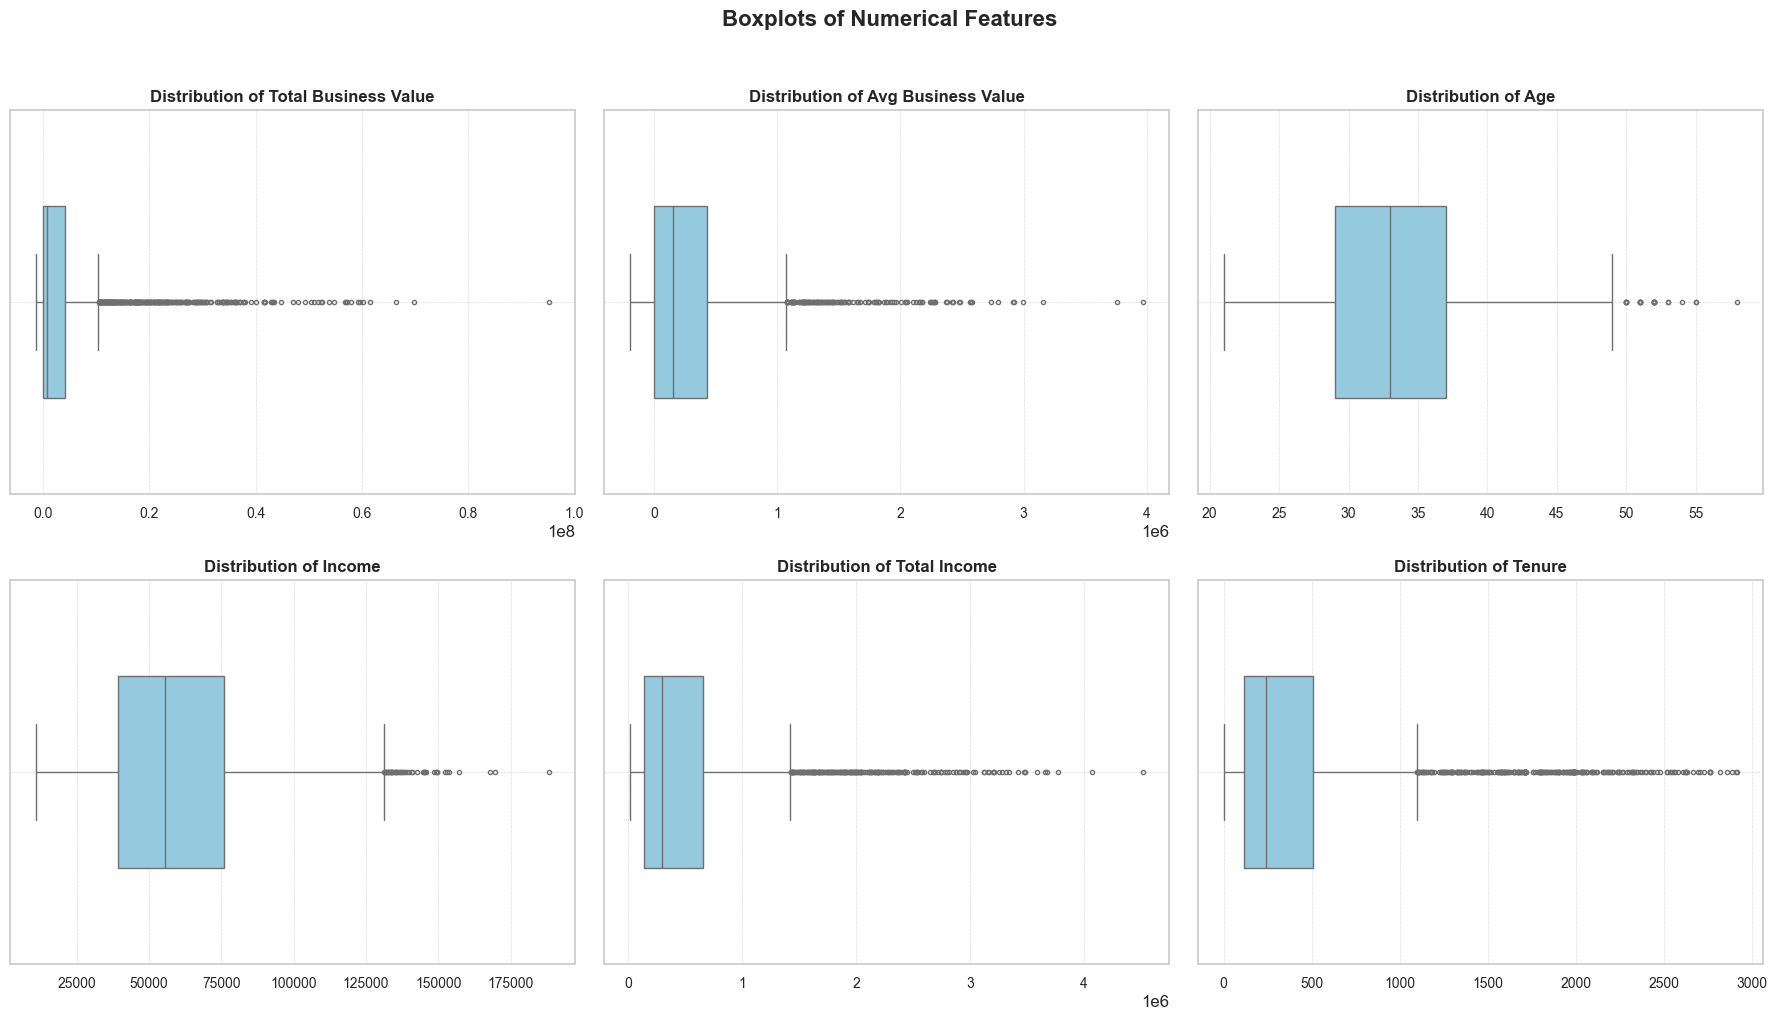

In [25]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

numerical_cols = ['Total_Business_Value', 'Avg_Business_Value', 'Age', 'Income', 'Total_Income', 'Tenure']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(numerical_cols):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=merged_df[col], ax=ax, color='skyblue', width=0.5, fliersize=3, linewidth=1)
    ax.set_title(f'Distribution of {col.replace("_", " ")}', fontsize=12, fontweight='bold')
    ax.set_xlabel("")
    ax.tick_params(axis='x', labelsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.suptitle("Boxplots of Numerical Features", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **Observations**

- From above plot we can see there are some outliers in total business value and average business value

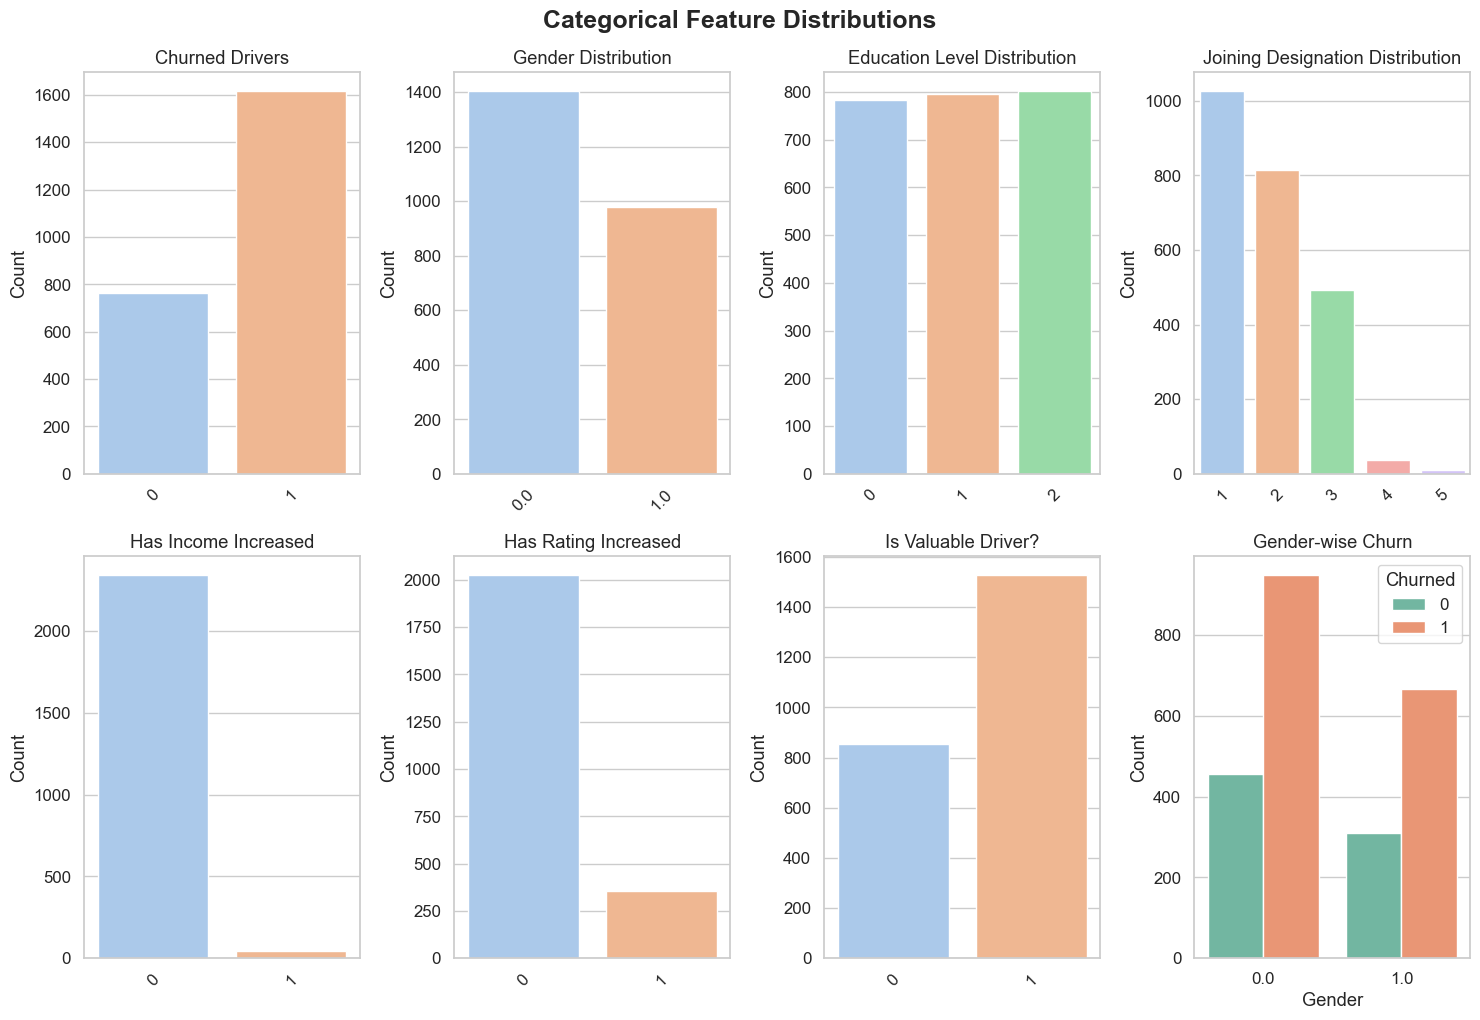

In [26]:
sns.set(style="whitegrid", font_scale=1.1)

cat_cols = [
    ("Churned", "Churned Drivers"),
    ("Gender", "Gender Distribution"),
    ("Education_Level", "Education Level Distribution"),
    ("Joining_Designation", "Joining Designation Distribution"),
    ("Has_Income_Increased", "Has Income Increased"),
    ("Has_Rating_Increased", "Has Rating Increased"),
    ("Is_Valuable_Driver", "Is Valuable Driver?")
]

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()

for i, (col, title) in enumerate(cat_cols):
    order = merged_df[col].value_counts().index if merged_df[col].dtype == 'O' else None
    sns.countplot(x=col, data=merged_df, ax=axes[i], palette="pastel", order=order)
    axes[i].set_title(title)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

sns.countplot(x="Gender", hue="Churned", data=merged_df, palette="Set2", ax=axes[-1])
axes[-1].set_title("Gender-wise Churn")
axes[-1].set_xlabel("Gender")
axes[-1].set_ylabel("Count")
axes[-1].legend(title="Churned")

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=18, fontweight='bold', y=1.02)
plt.show()


### **Observations**

- In the dataset there are 1616 churned drivers
- There are 1404 male and 977 female drivers
- Almost all educations levels of drivers aew same
- Most drivers joined at 1 designation
- We can see that only 43 drivers have increased their income
- Out of all the drivers only 358 drivers has increased their rating 
- 668 female drivers have churned
- 948 male drivers have churned

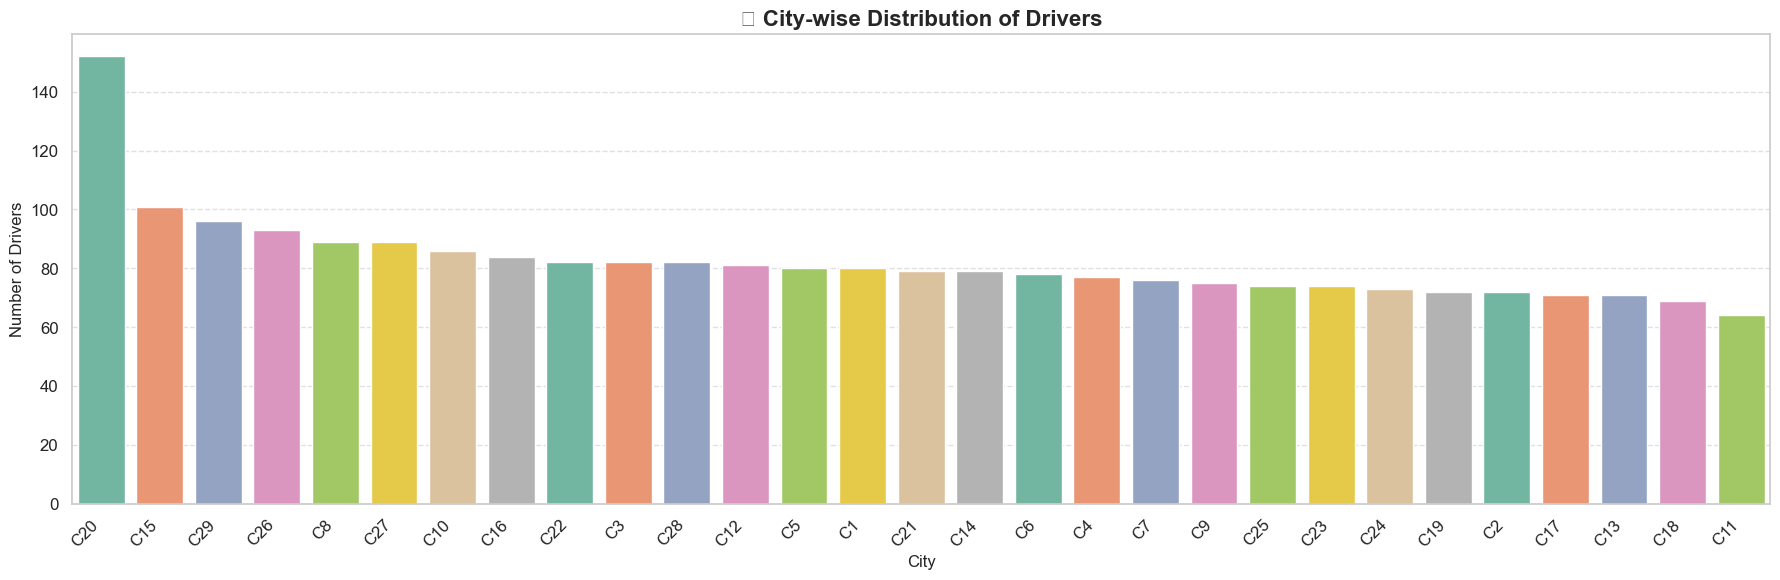

In [27]:
city_order = merged_df['City'].value_counts().index

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(18, 6))
sns.countplot(data=merged_df, x="City", order=city_order, palette="Set2")

plt.title("🚕 City-wise Distribution of Drivers", fontsize=16, fontweight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Drivers", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### **Observations**

- We can see that C20 has the highest number of drivers

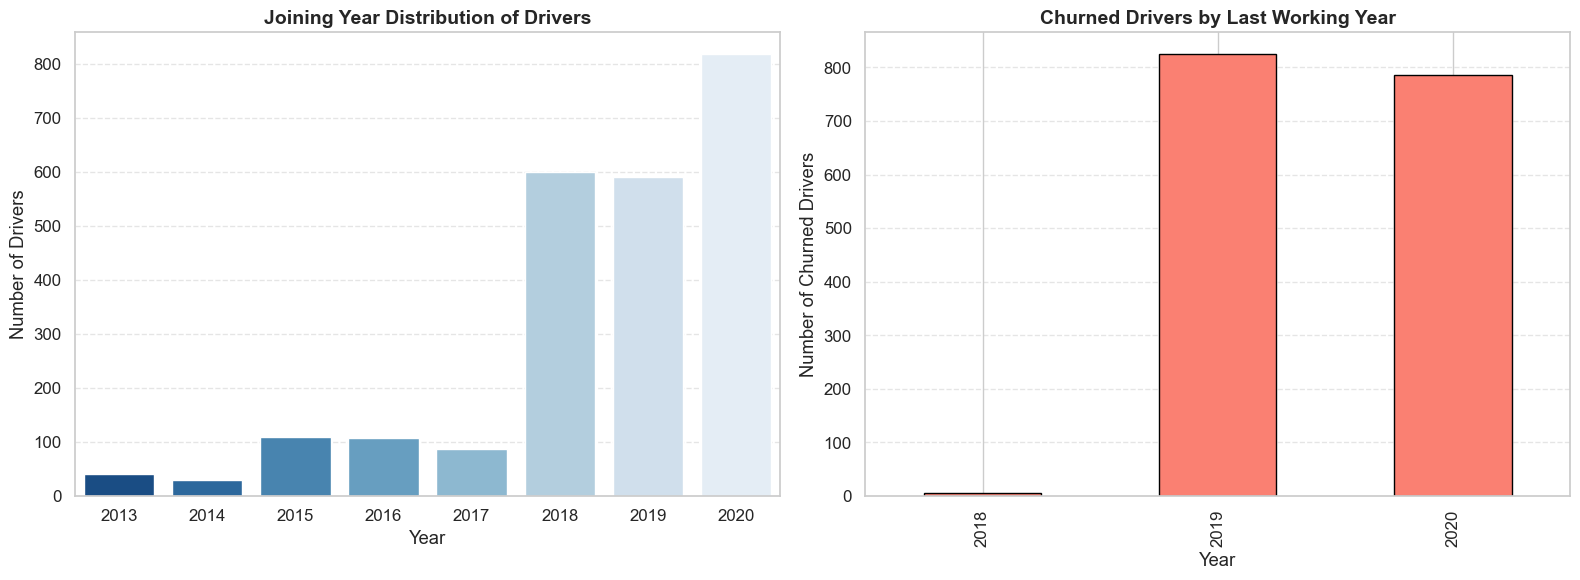

In [28]:
sns.set(style="whitegrid", font_scale=1.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(
    x="Date_Of_Joining_year",
    data=merged_df,
    palette="Blues_r",
    ax=ax[0]
)
ax[0].set_title("Joining Year Distribution of Drivers", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Drivers")
ax[0].grid(axis='y', linestyle='--', alpha=0.5)

merged_df[merged_df["Churned"] == 1]["Last_Working_Date"].dt.year.value_counts().sort_index().plot(
    kind="bar",
    ax=ax[1],
    color="salmon",
    edgecolor="black"
)
ax[1].set_title("Churned Drivers by Last Working Year", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of Churned Drivers")
ax[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### **Observations**

- We can see that there was large number of drivers who joined during 2018, and large exit of drivers during 2019

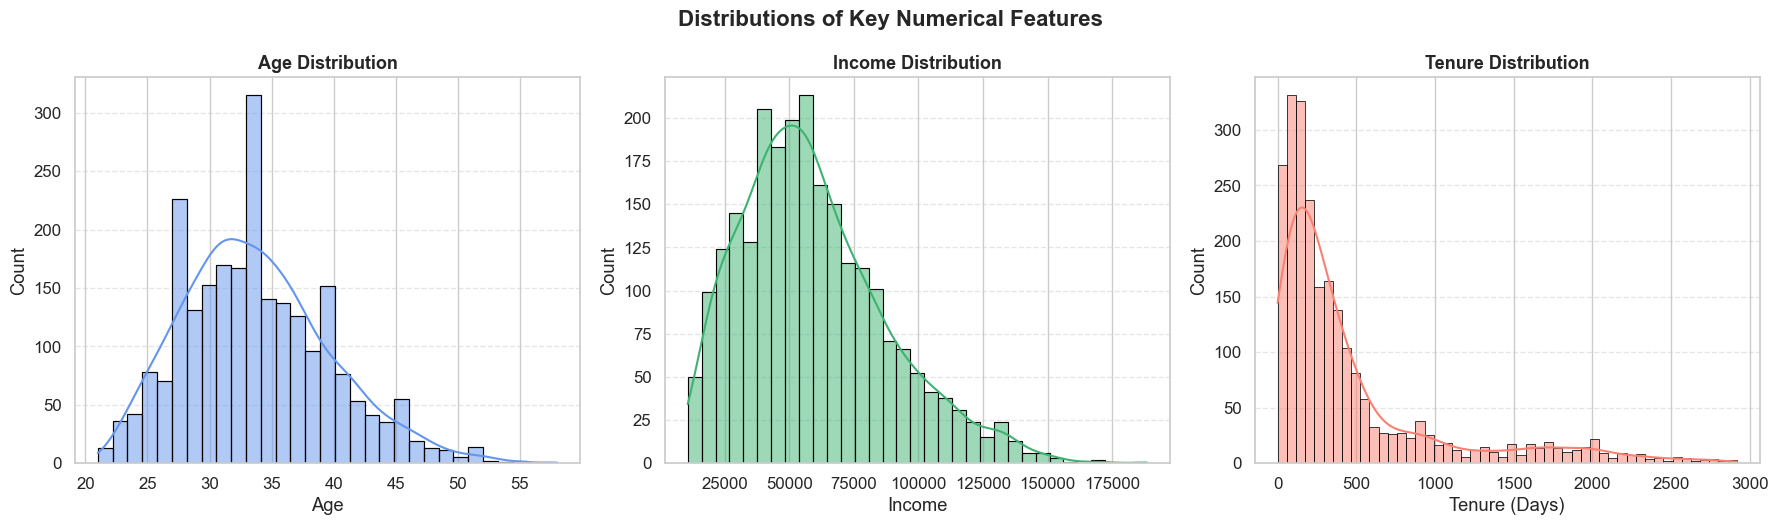

In [29]:
sns.set(style="whitegrid", font_scale=1.1)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(merged_df["Age"], kde=True, color="cornflowerblue", ax=ax[0], edgecolor="black")
ax[0].set_title("Age Distribution", fontsize=13, fontweight='bold')
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")
ax[0].grid(axis='y', linestyle='--', alpha=0.5)

sns.histplot(merged_df["Income"], kde=True, color="mediumseagreen", ax=ax[1], edgecolor="black")
ax[1].set_title("Income Distribution", fontsize=13, fontweight='bold')
ax[1].set_xlabel("Income")
ax[1].set_ylabel("Count")
ax[1].grid(axis='y', linestyle='--', alpha=0.5)

sns.histplot(merged_df["Tenure"], kde=True, color="salmon", ax=ax[2], edgecolor="black")
ax[2].set_title("Tenure Distribution", fontsize=13, fontweight='bold')
ax[2].set_xlabel("Tenure (Days)")
ax[2].set_ylabel("Count")
ax[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("Distributions of Key Numerical Features", fontsize=16, fontweight='bold', y=1.05)
plt.show()

### **Observations**

1. **Age Distribution**:

   * Most drivers are aged **between 28 and 38 years**, with a slight **right skew**.
   * Indicates a young to mid-career workforce.

2. **Income Distribution**:

   * Follows a **positively skewed** (right-skewed) distribution.
   * Majority earn **₹40,000–₹70,000**, with a few high-income outliers above ₹1.5 lakh.

3. **Tenure Distribution**:

   * Highly **right-skewed** — most drivers have **shorter tenures (<500 days)**.
   * Suggests frequent churn or short-term contracts.


#### **Bivariate Analysis**

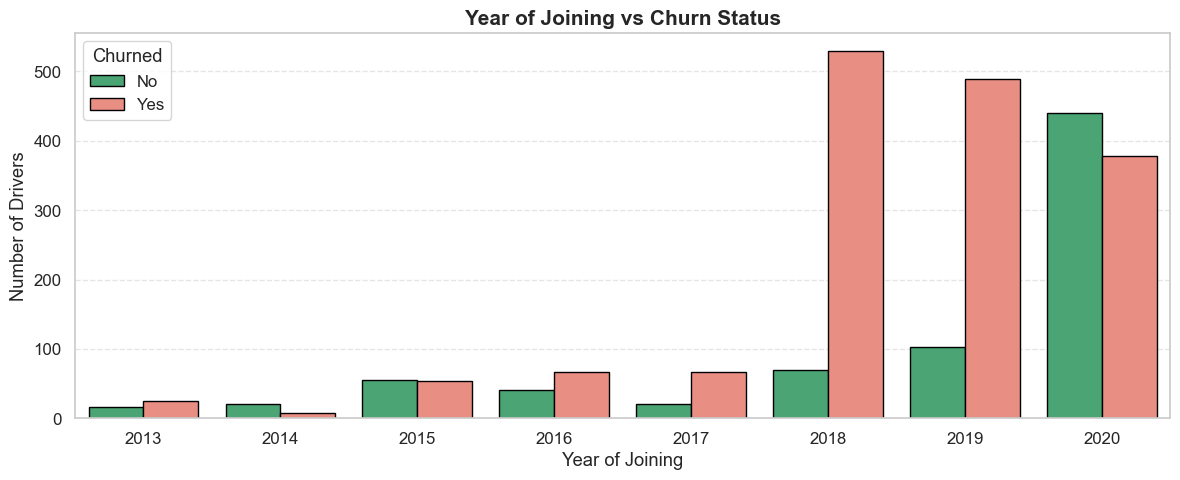

In [30]:
sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(12, 5))
sns.countplot(
    x="Date_Of_Joining_year",
    data=merged_df,
    hue="Churned",
    palette={0: "mediumseagreen", 1: "salmon"},
    edgecolor="black"
)

plt.title("Year of Joining vs Churn Status", fontsize=15, fontweight='bold')
plt.xlabel("Year of Joining")
plt.ylabel("Number of Drivers")
plt.legend(title="Churned", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Observations**

- We can see that there was big churn of drivers who joined in 2018, 2019 and 2020

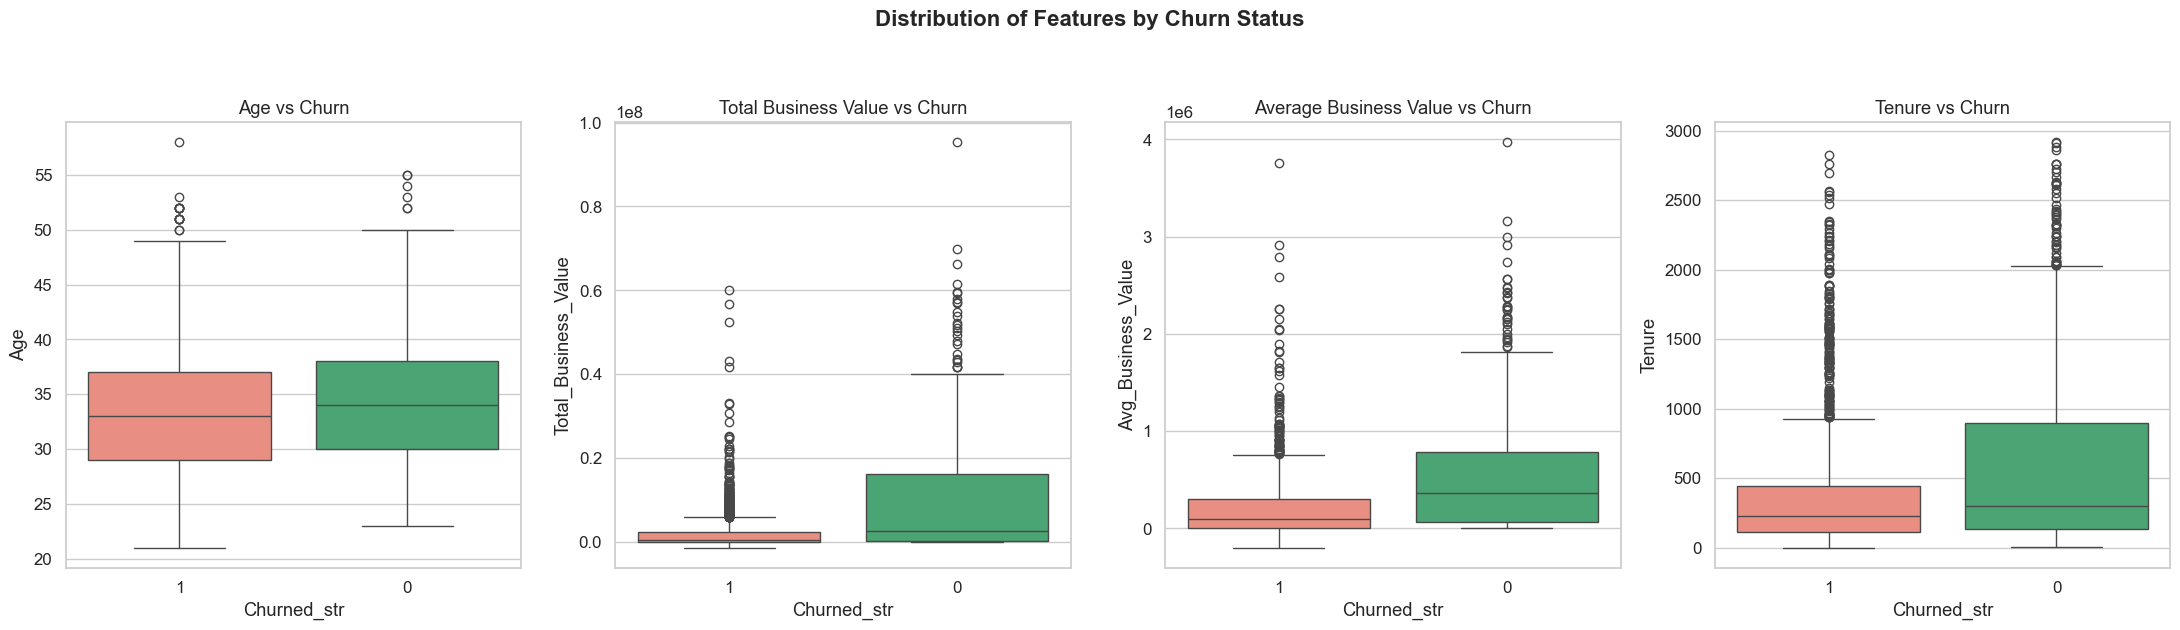

In [31]:
merged_df["Churned_str"] = merged_df["Churned"].astype(str)

palette = {"0": "mediumseagreen", "1": "salmon"}

fig, ax = plt.subplots(1, 4, figsize=(22, 6))

sns.boxplot(data=merged_df, x="Churned_str", y="Age", palette=palette, ax=ax[0])
ax[0].set_title("Age vs Churn")

sns.boxplot(data=merged_df, x="Churned_str", y="Total_Business_Value", palette=palette, ax=ax[1])
ax[1].set_title("Total Business Value vs Churn")

sns.boxplot(data=merged_df, x="Churned_str", y="Avg_Business_Value", palette=palette, ax=ax[2])
ax[2].set_title("Average Business Value vs Churn")

sns.boxplot(data=merged_df, x="Churned_str", y="Tenure", palette=palette, ax=ax[3])
ax[3].set_title("Tenure vs Churn")

plt.suptitle("Distribution of Features by Churn Status", fontsize=16, fontweight="bold", y=1.05)
plt.tight_layout()
plt.show()

### **Observations**

* **Age vs Churn**:
  There’s **no major age difference** between churned and retained drivers — suggesting age might not be a primary churn driver.

* **Total Business Value**:
  Drivers who **did not churn** clearly contributed **significantly more total business value**. This hints that **high-performing drivers are more likely to be retained**.

* **Tenure**:
  Tenure (time since joining) is **much shorter for churned drivers**, meaning **newer drivers are more likely to leave**, while long-tenured drivers are more loyal.

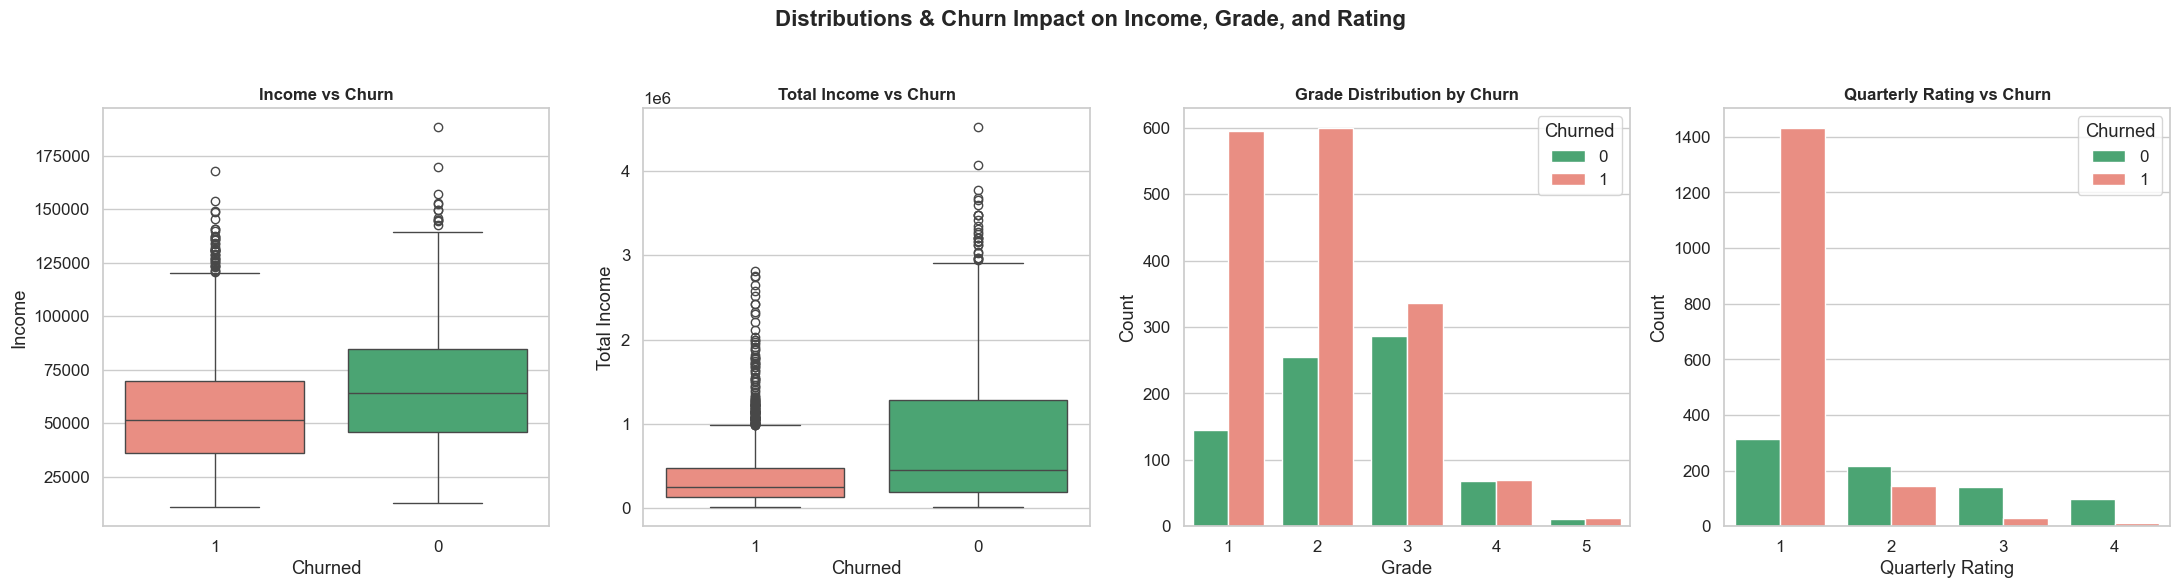

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(22, 6))
fig.suptitle("Distributions & Churn Impact on Income, Grade, and Rating", fontsize=16, fontweight="bold")

sns.boxplot(data=merged_df, x="Churned_str", y="Income", palette={'0': "mediumseagreen", '1': "salmon"}, ax=ax[0])
ax[0].set_title("Income vs Churn", fontsize=12, fontweight="bold")
ax[0].set_xlabel("Churned")
ax[0].set_ylabel("Income")

sns.boxplot(data=merged_df, x="Churned_str", y="Total_Income", palette={'0': "mediumseagreen", '1': "salmon"}, ax=ax[1])
ax[1].set_title("Total Income vs Churn", fontsize=12, fontweight="bold")
ax[1].set_xlabel("Churned")
ax[1].set_ylabel("Total Income")

sns.countplot(data=merged_df, x="Grade", hue="Churned", palette={0: "mediumseagreen", 1: "salmon"}, ax=ax[2])
ax[2].set_title("Grade Distribution by Churn", fontsize=12, fontweight="bold")
ax[2].set_xlabel("Grade")
ax[2].set_ylabel("Count")
ax[2].legend(title="Churned")

sns.countplot(data=merged_df, x="Quarterly_Rating", hue="Churned", palette={0: "mediumseagreen", 1: "salmon"}, ax=ax[3])
ax[3].set_title("Quarterly Rating vs Churn", fontsize=12, fontweight="bold")
ax[3].set_xlabel("Quarterly Rating")
ax[3].set_ylabel("Count")
ax[3].legend(title="Churned")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Observations**

1. **Income Impact**
   * Drivers who **churned** tend to have significantly **lower income** and **total earnings** than those who stayed.

2. **Grade Distribution**

   * Most drivers fall within **Grade 1, 2, and 3**.
   * A **majority of churned drivers** are concentrated in **Grade 1 and 2**, suggesting that lower-ranked employees are more vulnerable to churn.
   * **Grade 4 and 5** drivers are **rare** and show **lower churn**, possibly due to better incentives or stability.

3. **Quarterly Rating Influence**

   * A striking number of **churned drivers** had a **rating of 1**, the lowest possible.
   * Very **few churned drivers** had high ratings (3 or 4).

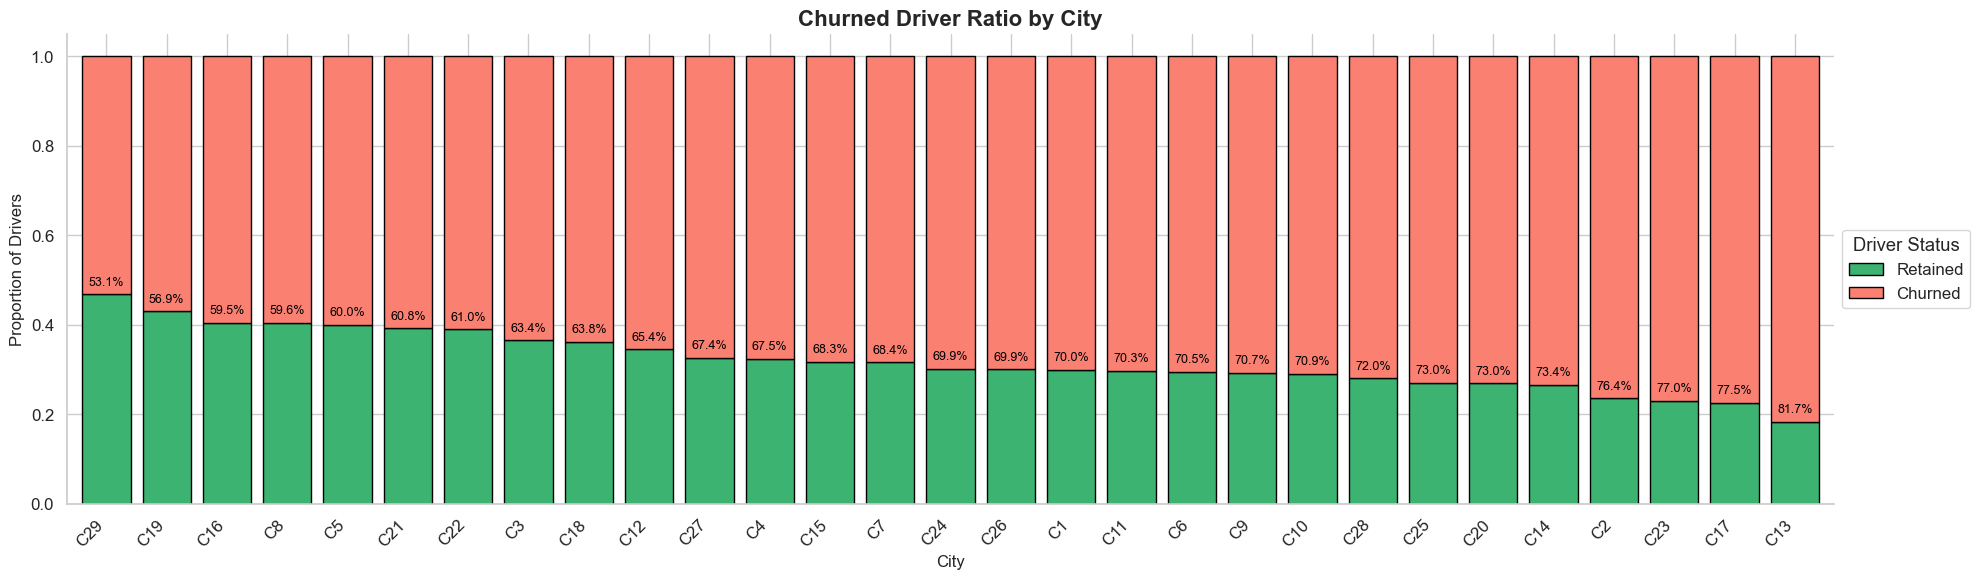

In [33]:
churn_by_city = pd.crosstab(merged_df["City"], merged_df["Churned"], normalize="index")

churn_by_city = churn_by_city.sort_values(1)
colors = ["mediumseagreen", "salmon"]

fig, ax = plt.subplots(figsize=(20, 6))

churn_by_city.plot(
    kind="bar",
    stacked=True,
    color=colors,
    ax=ax,
    edgecolor='black',
    width=0.8
)

ax.set_title("Churned Driver Ratio by City", fontsize=16, fontweight='bold')
ax.set_ylabel("Proportion of Drivers", fontsize=12)
ax.set_xlabel("City", fontsize=12)
plt.xticks(rotation=45, ha="right")

ax.legend(["Retained", "Churned"], title="Driver Status", loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

for idx, row in enumerate(churn_by_city.itertuples()):
    churn_pct = row[2] * 100
    ax.text(idx, row[1] + 0.02, f"{churn_pct:.1f}%", ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

### **Observation**

1. **High Churn Cities**:

   * Cities like **C13 (81.7%)**, **C17 (77.5%)**, and **C23 (77.0%)** exhibit the **highest churn ratios**, indicating a potential issue with driver satisfaction, operations, or market conditions in these regions.

2. **Moderate Churn Cities**:

   * Cities such as **C10 to C15** show churn rates between **68% to 73%**, which are **above average** and still concerning.

3. **Low Churn Cities**:

   * Cities like **C29 (53.1%)**, **C19 (56.9%)**, and **C16 (59.5%)** have **better retention**, making them **relatively healthier regions** for operations.

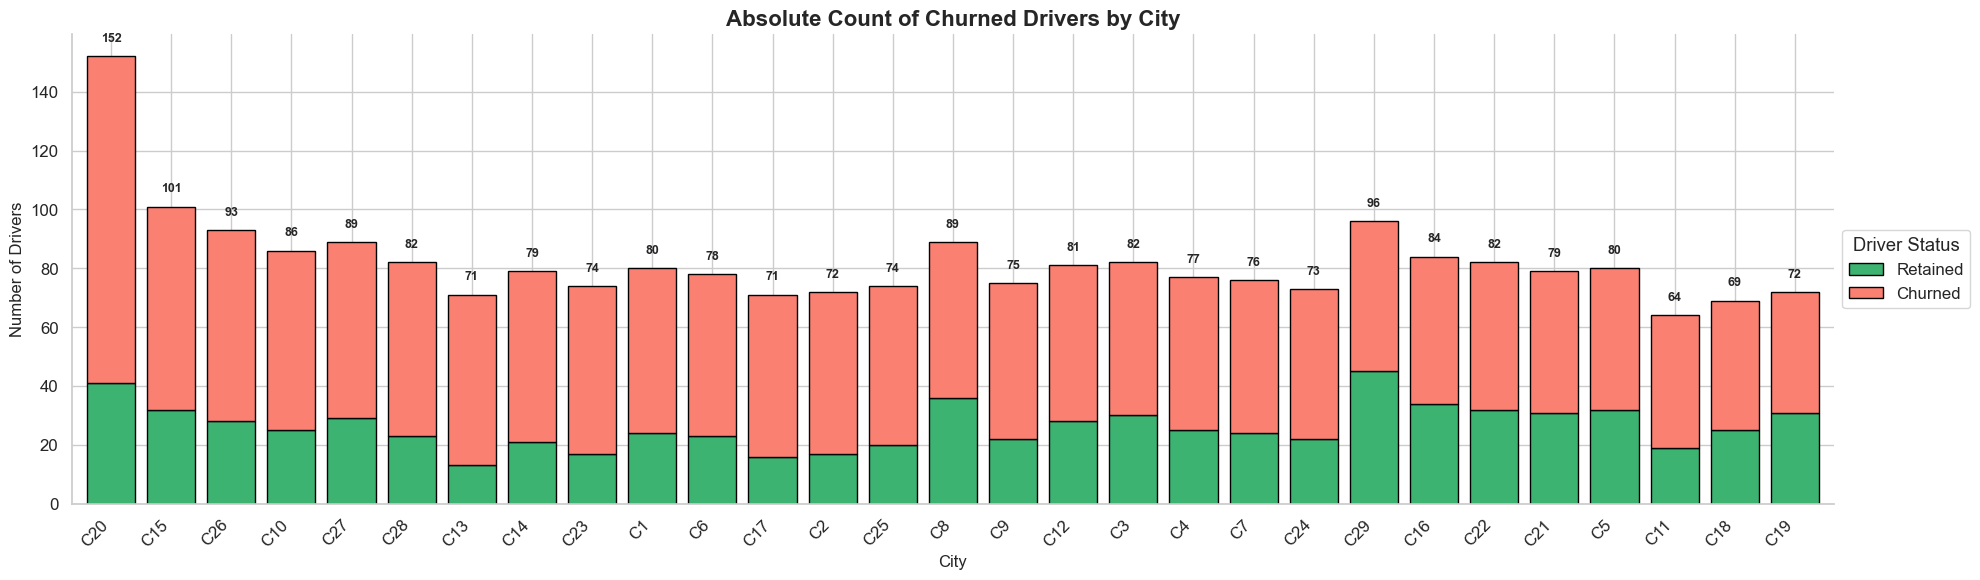

In [34]:
city_churn_counts = pd.crosstab(merged_df["City"], merged_df["Churned"])
city_churn_counts = city_churn_counts.sort_values(by=1, ascending=False)  # Sort by churn count

fig, ax = plt.subplots(figsize=(20, 6))
colors = ["mediumseagreen", "salmon"]

city_churn_counts.plot(
    kind="bar",
    stacked=True,
    color=colors,
    edgecolor="black",
    width=0.8,
    ax=ax
)

ax.set_title("Absolute Count of Churned Drivers by City", fontsize=16, fontweight='bold')
ax.set_xlabel("City", fontsize=12)
ax.set_ylabel("Number of Drivers", fontsize=12)
plt.xticks(rotation=45, ha="right")

ax.legend(["Retained", "Churned"], title="Driver Status", loc="center left", bbox_to_anchor=(1, 0.5))
sns.despine()

for idx, (city, row) in enumerate(city_churn_counts.iterrows()):
    total = row[0] + row[1]
    ax.text(idx, total + 5, f"{total}", ha="center", fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### **Observations**

**1. Churned Driver Ratio by City (Proportional View)**

**Insight:**

* **City C13** has the **highest churn rate**, with over **80%** of its drivers having churned.
* Cities like **C17, C23, C2, C14, and C20** also show a **high proportion of churned drivers**, exceeding **70%**.
* **City C29** stands out with the **lowest churn rate** (\~53% churn), indicating better driver retention.

**2. Absolute Count of Churned Drivers by City**

**Insight:**

* **City C20** has the **highest absolute number of churned drivers** (\~150), making it a critical area for churn management.
* Despite its low churn rate, **C29** has a large driver base (close to 100 churned), indicating high volume but relatively better retention.
* Cities like **C10, C15, and C26** also show high churn volume.

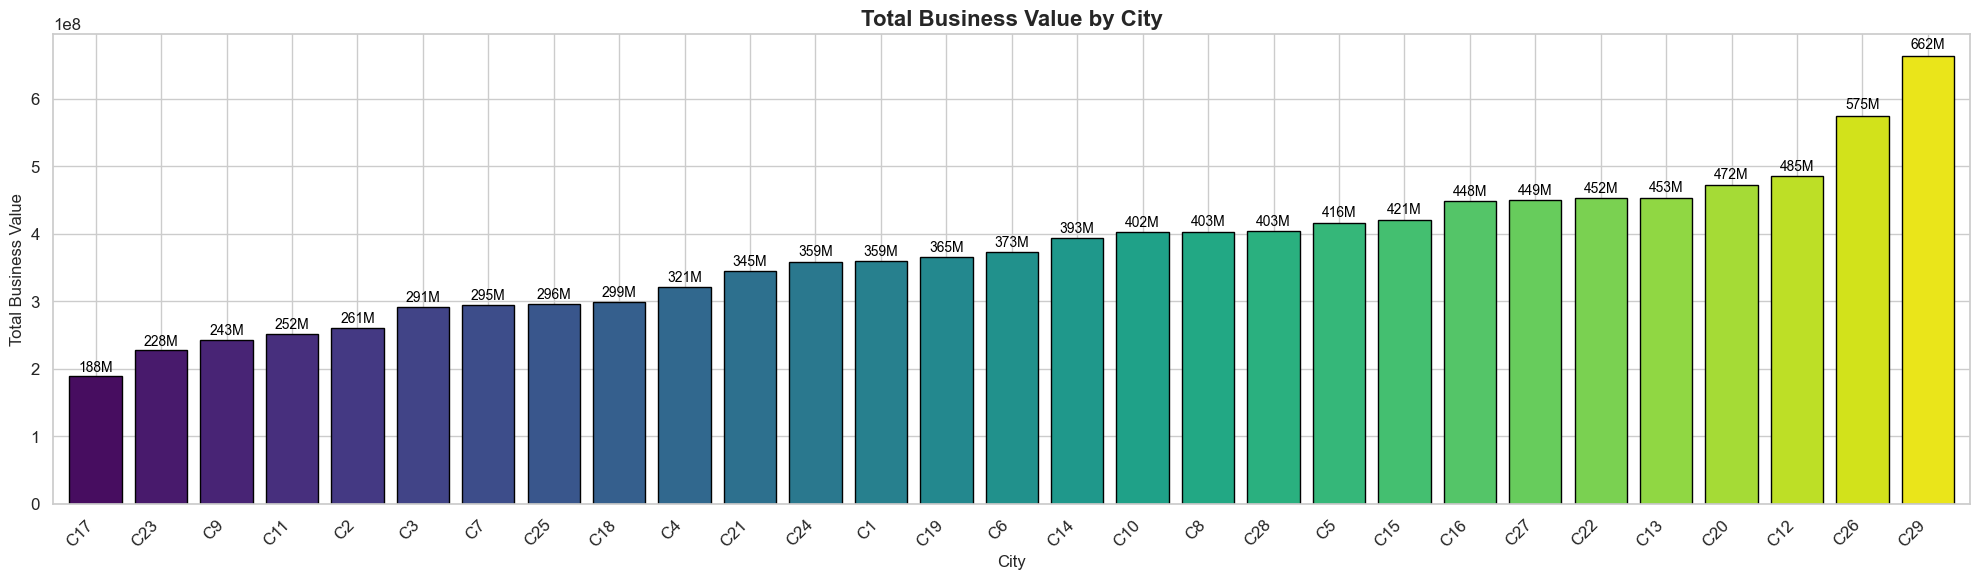

In [35]:
plt.figure(figsize=(20, 6))

ax = merged_df.groupby("City")["Total_Business_Value"].sum().sort_values().plot(
    kind="bar",
    color=sns.color_palette("viridis", len(merged_df["City"].unique())),
    edgecolor="black",
    width=0.8  
)

plt.title("Total Business Value by City", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Business Value", fontsize=12)

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    value = p.get_height()
    if value > 0:
        ax.annotate(f'{int(value/1e6)}M',
                    (p.get_x() + p.get_width() / 2, value + (value * 0.01)), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### **Observations**
- From above plot we can see that C29 makes the highest revenue

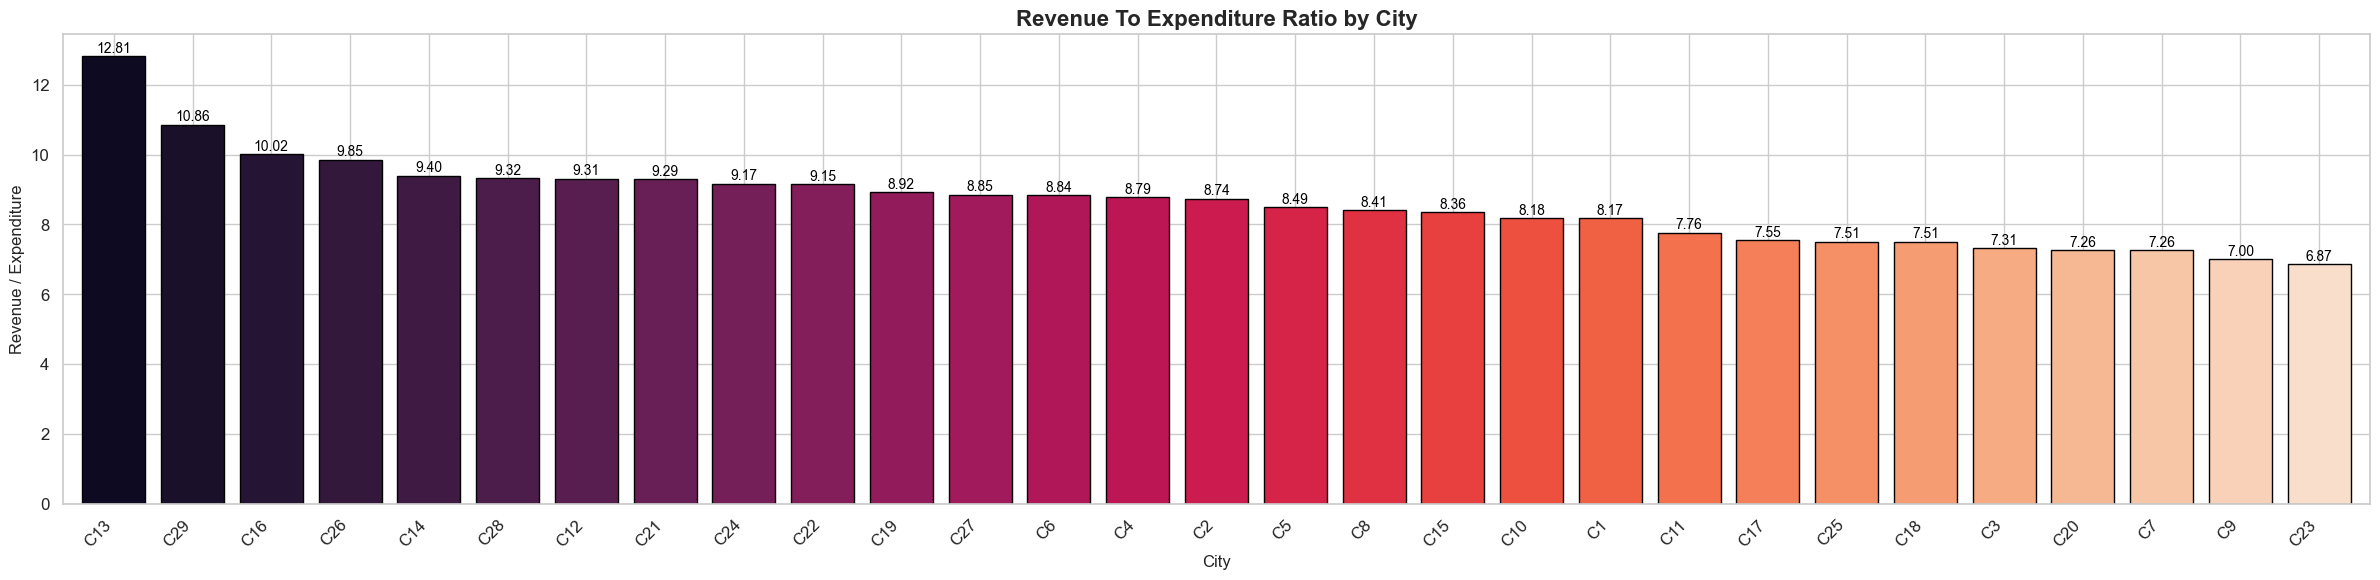

In [36]:
city_ratio_df = merged_df.groupby("City").agg({
    "Total_Business_Value": "sum",
    "Total_Income": "sum"
}).reset_index()

city_ratio_df["Revenue_To_Expenditure_Ratio"] = (city_ratio_df["Total_Business_Value"] / city_ratio_df["Total_Income"]).round(2)
city_ratio_df = city_ratio_df.sort_values("Revenue_To_Expenditure_Ratio", ascending=False)

ax = city_ratio_df.plot.bar(
    x="City",
    y="Revenue_To_Expenditure_Ratio",
    figsize=(24, 6),  # <-- FIGURE SIZE APPLIED HERE
    color=sns.color_palette("rocket", len(city_ratio_df)),
    edgecolor="black",
    width=0.8,
    legend=False
)

plt.title("Revenue To Expenditure Ratio by City", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Revenue / Expenditure", fontsize=12)
plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height + 0.02),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### **Observations**

- Above plot shows that C13 city has the best revenue to expense ratio

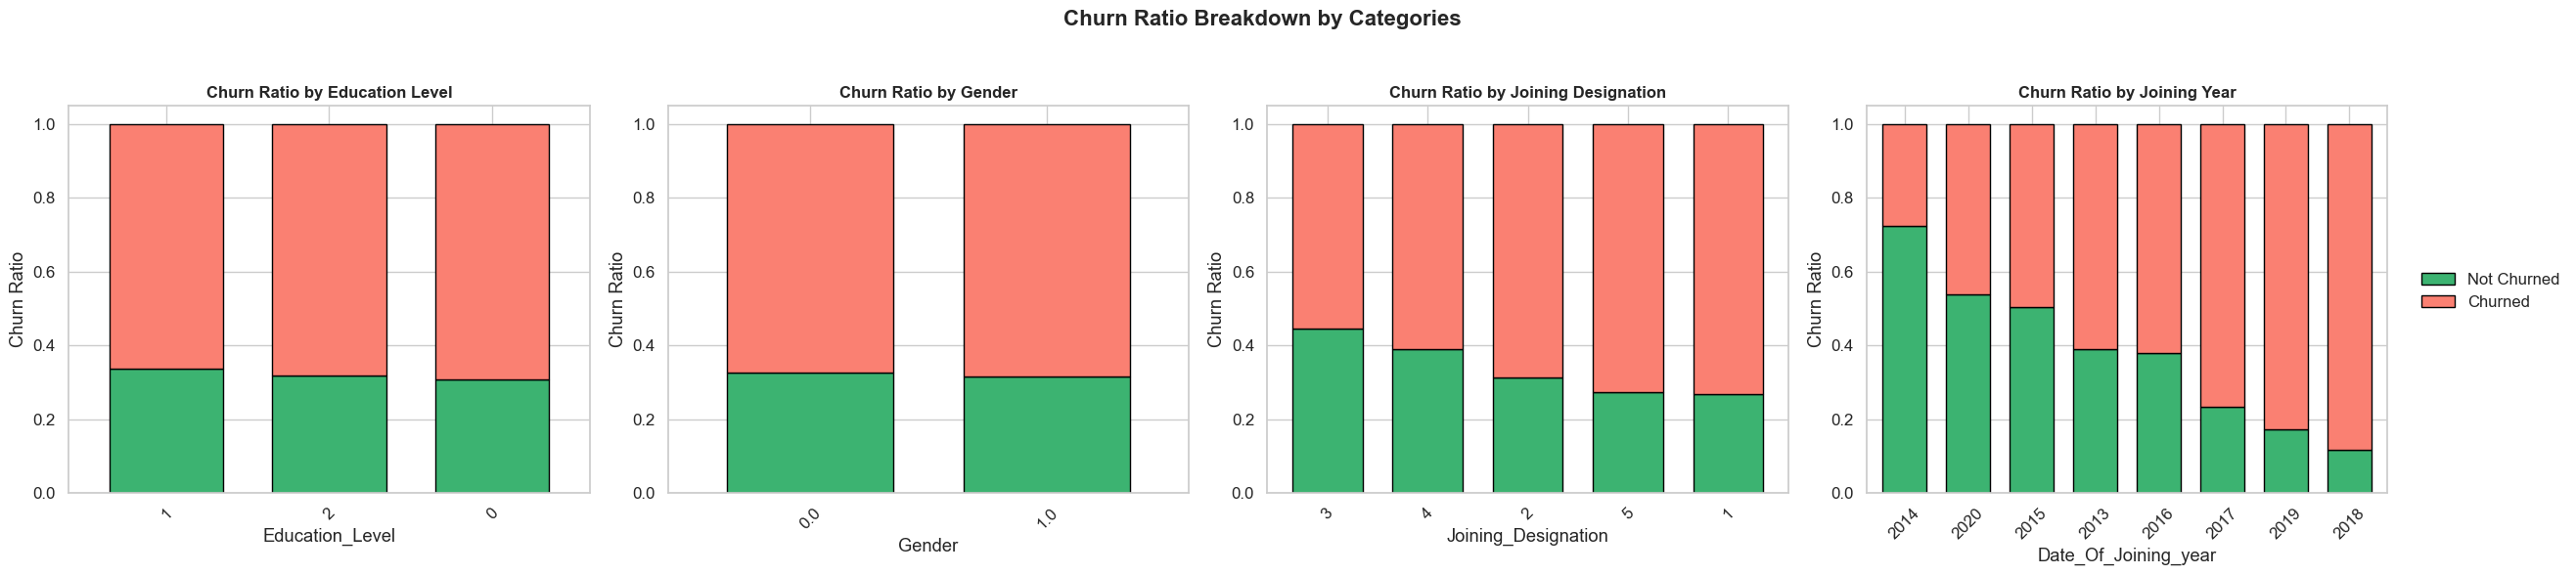

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(26, 6))  
fig.suptitle("Churn Ratio Breakdown by Categories", fontsize=16, fontweight="bold")

plot_configs = [
    ("Education_Level", "Churn Ratio by Education Level"),
    ("Gender", "Churn Ratio by Gender"),
    ("Joining_Designation", "Churn Ratio by Joining Designation"),
    ("Date_Of_Joining_year", "Churn Ratio by Joining Year")
]

for i, (col, title) in enumerate(plot_configs):
    plot_data = pd.crosstab(merged_df[col], merged_df["Churned"], normalize="index").sort_values(1)
    plot_data.plot(
        kind="bar",
        stacked=True,
        ax=ax[i],
        color=["mediumseagreen", "salmon"],
        edgecolor="black",
        width=0.7,
        legend=False  
    )
    ax[i].set_title(title, fontsize=12, fontweight="bold")
    ax[i].set_ylabel("Churn Ratio")
    ax[i].tick_params(axis='x', rotation=45)

fig.legend(
    ["Not Churned", "Churned"],
    loc="center left",
    bbox_to_anchor=(0.95, 0.5),
    fontsize=12,
    frameon=False
)


plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


### **Observations**

- We can see that Gender and Education level donot have significant effect on Churn
- From above plot we can see that Joining designation and Joining year have significant effect on churn

    * **Joining Designation**: Higher churn in Designation 1 & 5.
    * **Year of Joining**: The drivers joined in 2018-2019 churned more, whereas drivers joint in 2014 churned less


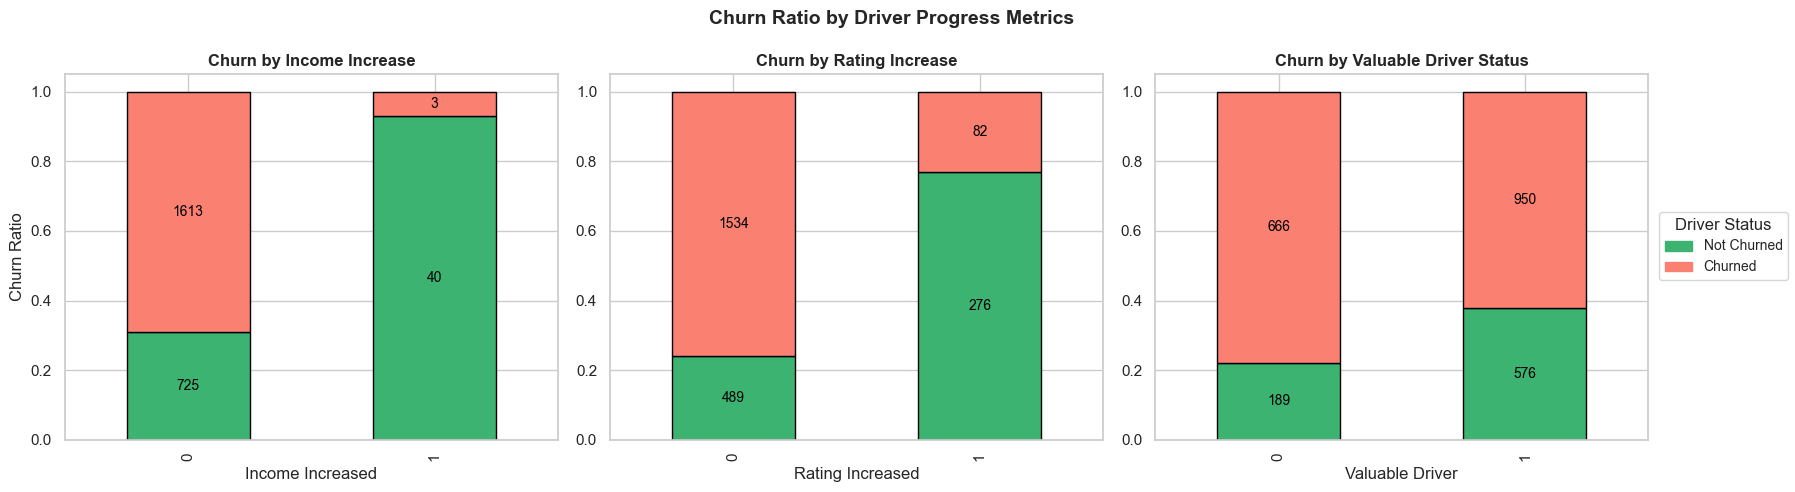

In [ ]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

colors = ["mediumseagreen", "salmon"]

categories = [
    ("Has_Income_Increased", "Churn by Income Increase", "Income Increased"),
    ("Has_Rating_Increased", "Churn by Rating Increase", "Rating Increased"),
    ("Is_Valuable_Driver", "Churn by Valuable Driver Status", "Valuable Driver")
]

# Plot each subplot
for i, (col, title, xlabel) in enumerate(categories):
    ctab = pd.crosstab(merged_df[col], merged_df["Churned"])
    norm_ctab = ctab.div(ctab.sum(axis=1), axis=0)
    
    # Plot stacked normalized bar chart
    norm_ctab.plot(kind="bar", stacked=True, ax=ax[i], color=colors, edgecolor="black", legend=False)
    ax[i].set_title(title, fontsize=12, fontweight="bold")
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel("Churn Ratio" if i == 0 else "")

    # Annotate counts on each segment
    for bar_group, total in zip(ax[i].containers, ctab.values.T):  # transpose to align with stack order
        for rect, val in zip(bar_group, total):
            height = rect.get_height()
            ax[i].text(
                rect.get_x() + rect.get_width() / 2,     # X position
                rect.get_y() + height / 2,               # Y position (center of bar segment)
                str(val),                                # Count as text
                ha='center', va='center', fontsize=10, color='black'
            )

# Shared legend
legend_handles = [
    Patch(color="mediumseagreen", label="Not Churned"),
    Patch(color="salmon", label="Churned")
]
fig.legend(handles=legend_handles, loc='center right', title="Driver Status", fontsize=10)

# Super title and layout
plt.suptitle("Churn Ratio by Driver Progress Metrics", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

### **Observations**

**1. Income Increase vs Churn**

* **Drivers without income increase (0):**

  * **Churned**: 1613 drivers
  * **Not Churned**: 725 drivers
  * Churn rate is significantly **higher** among drivers who didn’t get an income increase.
* **Drivers with income increase (1):**

  * **Churned**: Only 3 drivers
  * **Not Churned**: 40 drivers
  * Indicates a **strong retention effect** of income growth.

**Insight**: **Lack of income growth** is highly associated with **churn**. Drivers rewarded with better pay are **far more likely to stay**.

---

**2. Rating Increase vs Churn**

* **Drivers with no rating increase (0):**

  * **Churned**: 1534 drivers
  * **Not Churned**: 489 drivers
* **Drivers with rating increase (1):**

  * **Churned**: 82 drivers
  * **Not Churned**: 276 drivers

**Insight**: Drivers who **improved their performance ratings** were **less likely to churn**. **Recognition and progress** matter for retention.

---

**3. Valuable Driver Status vs Churn**

* **Not Valuable (0):**

  * **Churned**: 666 drivers
  * **Not Churned**: 189 drivers
* **Valuable (1):**

  * **Churned**: 950 drivers
  * **Not Churned**: 576 drivers

**Insight**: Even among **valuable drivers**, churn still occurs—but retention is **notably better** compared to non-valuable ones.

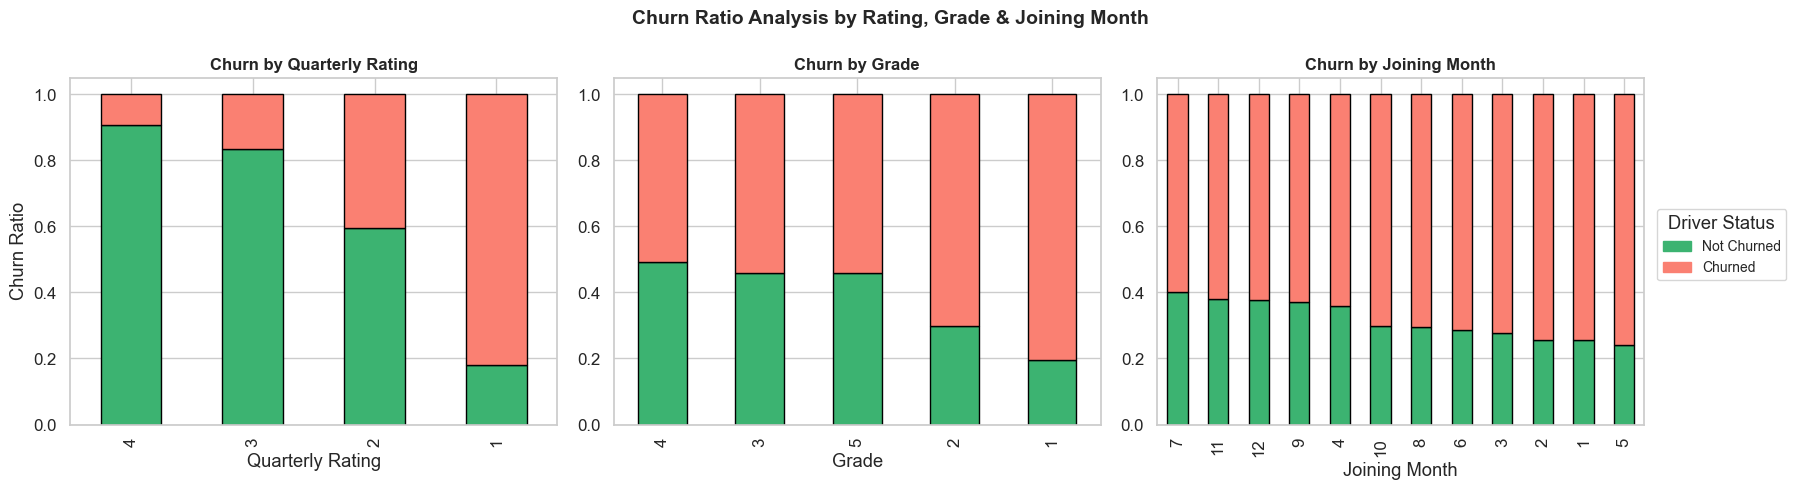

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

pd.crosstab(merged_df["Quarterly_Rating"], merged_df["Churned"], normalize="index") \
  .sort_values(1) \
  .plot(kind="bar", stacked=True, ax=ax[0], color=colors, edgecolor="black", legend=False)
ax[0].set_title("Churn by Quarterly Rating", fontsize=12, fontweight="bold")
ax[0].set_ylabel("Churn Ratio")
ax[0].set_xlabel("Quarterly Rating")

pd.crosstab(merged_df["Grade"], merged_df["Churned"], normalize="index") \
  .sort_values(1) \
  .plot(kind="bar", stacked=True, ax=ax[1], color=colors, edgecolor="black", legend=False)
ax[1].set_title("Churn by Grade", fontsize=12, fontweight="bold")
ax[1].set_ylabel("")
ax[1].set_xlabel("Grade")

pd.crosstab(merged_df["Date_Of_Joining_month"], merged_df["Churned"], normalize="index") \
  .sort_values(1) \
  .plot(kind="bar", stacked=True, ax=ax[2], color=colors, edgecolor="black", legend=False)
ax[2].set_title("Churn by Joining Month", fontsize=12, fontweight="bold")
ax[2].set_ylabel("")
ax[2].set_xlabel("Joining Month")

legend_handles = [
    Patch(color="mediumseagreen", label="Not Churned"),
    Patch(color="salmon", label="Churned")
]
fig.legend(handles=legend_handles, loc="center right", title="Driver Status", fontsize=10)

plt.suptitle("Churn Ratio Analysis by Rating, Grade & Joining Month", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

### **Observations**

**Quarterly Rating vs Churn**

* From above plot we can see that **none of the drivers got Quarterly rating as 5**
* Drivers with **low ratings (1 and 2)** have significantly higher churn ratios.
* **Higher-rated drivers (3 and 4)** tend to **stay longer**, indicating **performance is positively correlated with retention**.

**Grade vs Churn**

* **Grade 1 and 2 drivers churn the most**, possibly due to lower compensation, limited growth, or job dissatisfaction.
* **Grade 4 drivers show the highest retention**, suggesting **senior positions are more stable**.

**Joining Month vs Churn**

* Drivers who joined in **May, January, and February** have **higher churn rates**.
* Joining in **July or November** appears to be **linked to better retention**

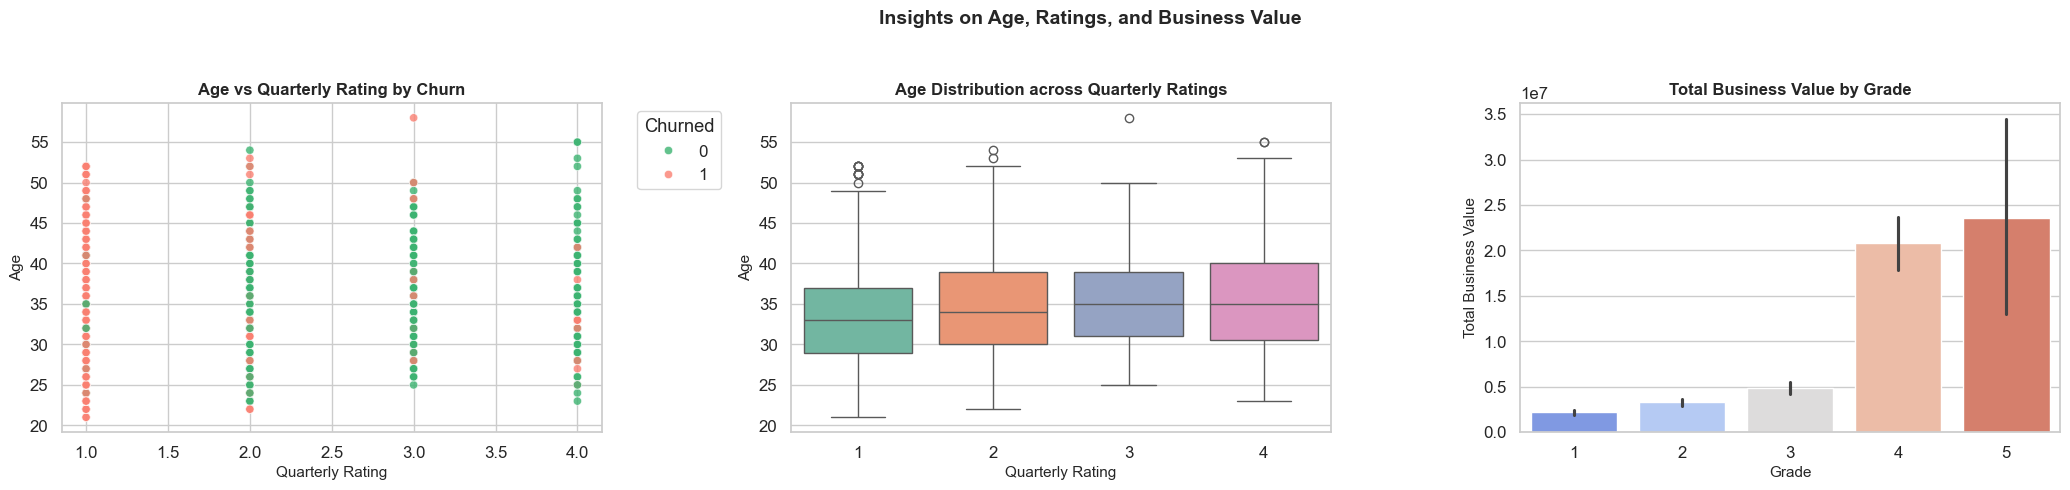

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(22, 5))
palette = {0: "mediumseagreen", 1: "salmon"}

scatter = sns.scatterplot(
    data=merged_df, y="Age", x="Quarterly_Rating", hue="Churned",
    palette=palette, alpha=0.8, ax=ax[0]
)
ax[0].set_title("Age vs Quarterly Rating by Churn", fontsize=12, fontweight='bold')
ax[0].set_xlabel("Quarterly Rating", fontsize=11)
ax[0].set_ylabel("Age", fontsize=11)

ax[0].legend(title="Churned", bbox_to_anchor=(1.05, 1), loc='upper left')

sns.boxplot(
    data=merged_df, y="Age", x="Quarterly_Rating", palette="Set2", ax=ax[1]
)
ax[1].set_title("Age Distribution across Quarterly Ratings", fontsize=12, fontweight='bold')
ax[1].set_xlabel("Quarterly Rating", fontsize=11)
ax[1].set_ylabel("Age", fontsize=11)

sns.barplot(
    data=merged_df, y="Total_Business_Value", x="Grade", palette="coolwarm", ax=ax[2]
)
ax[2].set_title("Total Business Value by Grade", fontsize=12, fontweight='bold')
ax[2].set_xlabel("Grade", fontsize=11)
ax[2].set_ylabel("Total Business Value", fontsize=11)

plt.suptitle("Insights on Age, Ratings, and Business Value", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # Adjust layout to make room for legend
plt.show()

### **Observations**

1. **Age vs Quarterly Rating by Churn**:

   * Drivers with a **Quarterly Rating of 1** are more likely to churn.
   * Across all ratings, churned drivers (red) are present across all age groups, but **higher ratings show lower churn**.

2. **Age Distribution across Quarterly Ratings**:

   * Median age is relatively **consistent across ratings**.
   * **Rating 4 drivers** show slightly **wider age spread**, indicating more experienced/older drivers may perform better.

3. **Total Business Value by Grade**:

   * **Grade 4 and 5 drivers** contribute significantly more to the **Total Business Value**.
   * This suggests **higher grade drivers are more valuable** to the business.


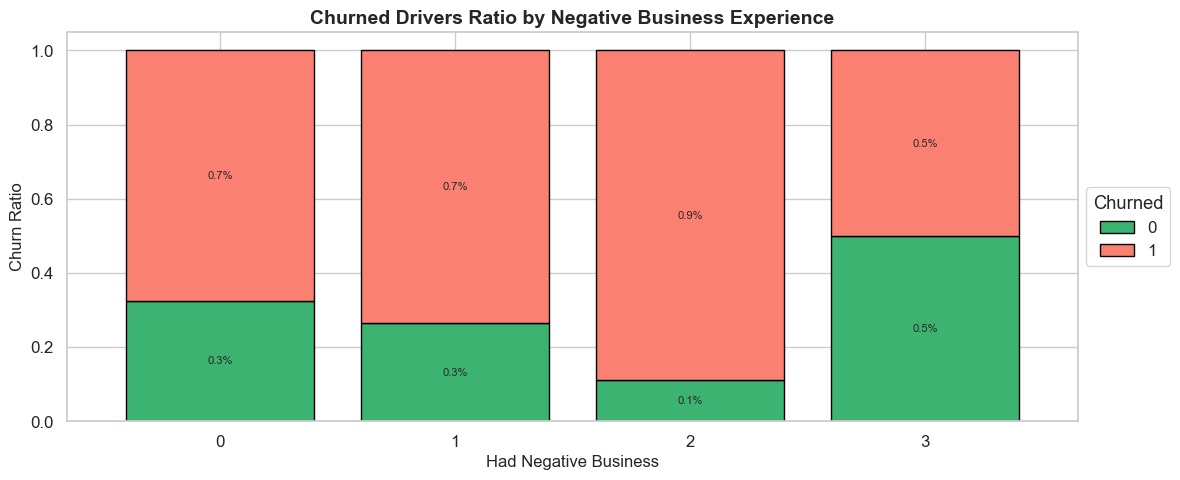

In [41]:
ct = pd.crosstab(
    merged_df["Total_Had_Negative_Business"], 
    merged_df["Churned"], 
    normalize="index"
)

fig, ax = plt.subplots(figsize=(12, 5))
ct.plot(kind="bar", stacked=True, ax=ax, color=["mediumseagreen", "salmon"], edgecolor="black", width=0.8)

ax.set_title("Churned Drivers Ratio by Negative Business Experience", fontsize=14, fontweight='bold')
ax.set_xlabel("Had Negative Business", fontsize=12)
ax.set_ylabel("Churn Ratio", fontsize=12)
ax.legend(title="Churned", loc="center left", bbox_to_anchor=(1, 0.5))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### **Observations**

* **0 or 1 Negative Business Month**:

  * Churn ratio is moderate (\~70%).
  * A substantial number of drivers still churn even with limited negative experience.

* **2 Negative Business Months**:

  * Churn ratio increases (\~90%).
  * Indicates a strong link: more negative months → higher churn probability.

* **3 Negative Business Months**:

  * Slight drop in churn ratio (\~50%).
  * Might be due to **smaller sample size** or **anomalies**—needs deeper inspection.


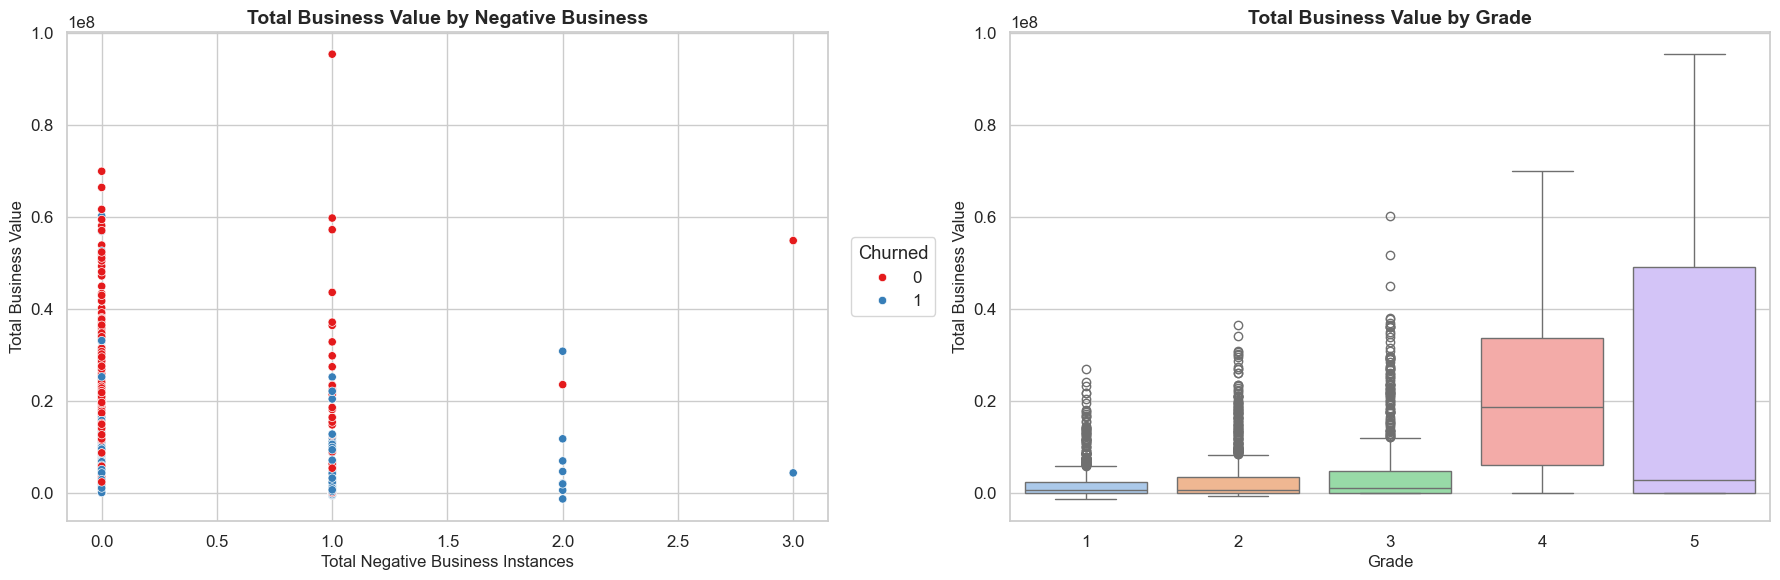

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(
    data=merged_df,
    x="Total_Had_Negative_Business",
    y="Total_Business_Value",
    hue="Churned",
    palette="Set1",
    ax=ax[0]
)
ax[0].set_title("Total Business Value by Negative Business", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Total Negative Business Instances", fontsize=12)
ax[0].set_ylabel("Total Business Value", fontsize=12)
ax[0].legend(title="Churned", loc="center left", bbox_to_anchor=(1.02, 0.5))

sns.boxplot(
    data=merged_df,
    x="Grade",
    y="Total_Business_Value",
    palette="pastel",
    ax=ax[1]
)
ax[1].set_title("Total Business Value by Grade", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Grade", fontsize=12)
ax[1].set_ylabel("Total Business Value", fontsize=12)

plt.tight_layout()
plt.show()

### **Observations**

**Total Business Value by Negative Business (Churn-wise)**

* **Churned drivers (blue)** are more concentrated at lower `Total Business Value` across all negative business instances.
* **Non-churned drivers (red)** show a wider spread, often with **higher business values**, even when negative business instances exist.
* This suggests that **negative business alone doesn’t guarantee churn**, but **low value + negative experience** is more churn-inducing.

**Right Plot: Total Business Value by Grade**

* A **clear upward trend** is visible: higher **grades correlate strongly** with **higher total business value**.
* **Grade 5 drivers** contribute significantly more business on average, with a **larger spread and higher upper quartile**.
* This highlights the **importance of retaining high-grade drivers**, as they generate disproportionately high business value.

In [43]:
df = df.sort_values(['City', 'ReportingYear'])

df['rating_1_flag'] = (df['Quarterly Rating'] == 1).astype(int)
df['rating_2_flag'] = (df['Quarterly Rating'] == 2).astype(int)
df['rating_3_flag'] = (df['Quarterly Rating'] == 3).astype(int)
df['rating_4_flag'] = (df['Quarterly Rating'] == 4).astype(int)

city_agg = (
    df.groupby(['City', 'ReportingYear'], as_index=False)
    .agg({
        'rating_1_flag': 'sum',
        'rating_2_flag': 'sum',
        'rating_3_flag': 'sum',
        'rating_4_flag': 'sum'
    })
    .rename(columns={
        'rating_1_flag': 'Total_Rating_1',
        'rating_2_flag': 'Total_Rating_2',
        'rating_3_flag': 'Total_Rating_3',
        'rating_4_flag': 'Total_Rating_4'
    })
)

city_agg['Rating_Chg_1'] = city_agg.groupby('City')['Total_Rating_1'].transform(lambda x: (x - x.shift(1)) / x).round(3)
city_agg['Rating_Chg_2'] = city_agg.groupby('City')['Total_Rating_2'].transform(lambda x: (x - x.shift(1)) / x).round(3)
city_agg['Rating_Chg_3'] = city_agg.groupby('City')['Total_Rating_3'].transform(lambda x: (x - x.shift(1)) / x).round(3)
city_agg['Rating_Chg_4'] = city_agg.groupby('City')['Total_Rating_4'].transform(lambda x: (x - x.shift(1)) / x).round(3)

rating_df = city_agg[['City', 'ReportingYear', 'Rating_Chg_1', 'Rating_Chg_2', 'Rating_Chg_3', 'Rating_Chg_4']].dropna()
df.drop(columns=['rating_1_flag', 'rating_2_flag', 'rating_3_flag', 'rating_4_flag'], inplace=True)

rating_df.head()

,City,ReportingYear,Rating_Chg_1,Rating_Chg_2,Rating_Chg_3,Rating_Chg_4
1,C1,2020,-0.385,-0.659,0.016,-0.435
3,C10,2020,0.280,-0.085,0.050,0.179
5,C11,2020,-0.116,-0.763,-0.364,-0.143
7,C12,2020,0.191,-0.284,0.260,0.146
9,C13,2020,-0.273,-0.354,0.068,-0.333


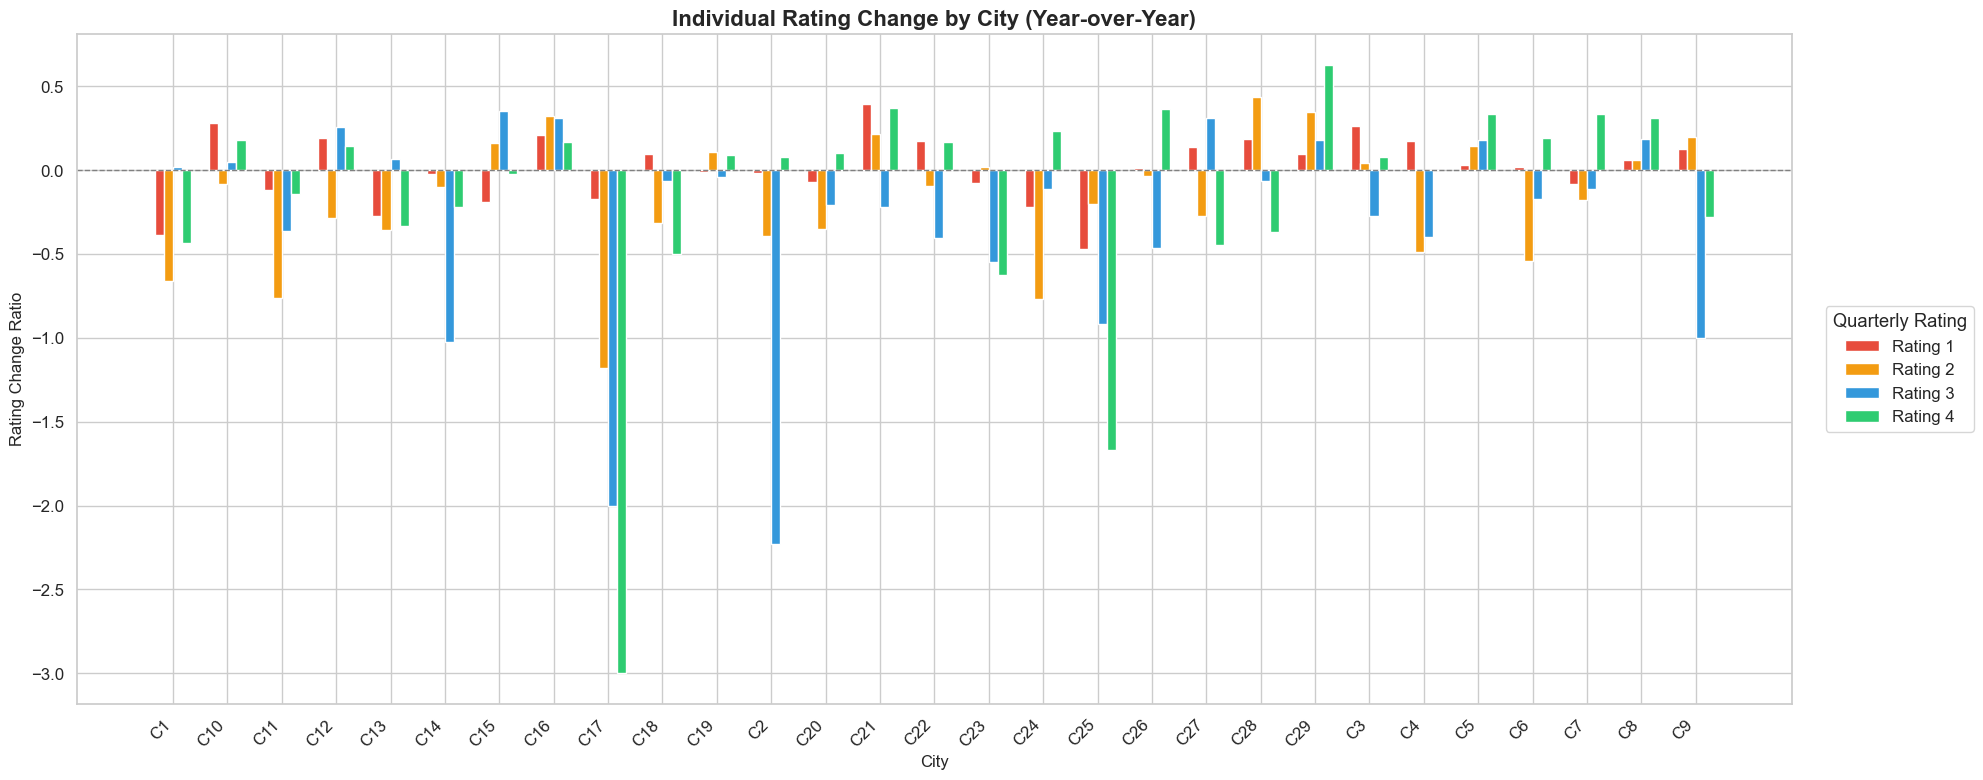

In [44]:
rating_df_sorted = rating_df.sort_values("City").reset_index(drop=True)
cities = rating_df_sorted["City"]
x = np.arange(len(cities)) * 1.2 

bar_width = 0.2

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_style("whitegrid")

ax.bar(x - 1.5 * bar_width, rating_df_sorted["Rating_Chg_1"], width=bar_width, label='Rating 1', color="#e74c3c")
ax.bar(x - 0.5 * bar_width, rating_df_sorted["Rating_Chg_2"], width=bar_width, label='Rating 2', color="#f39c12")
ax.bar(x + 0.5 * bar_width, rating_df_sorted["Rating_Chg_3"], width=bar_width, label='Rating 3', color="#3498db")
ax.bar(x + 1.5 * bar_width, rating_df_sorted["Rating_Chg_4"], width=bar_width, label='Rating 4', color="#2ecc71")

ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45, ha='right')
ax.set_ylabel("Rating Change Ratio", fontsize=12)
ax.set_xlabel("City", fontsize=12)
ax.set_title("Individual Rating Change by City (Year-over-Year)", fontsize=16, fontweight='bold')

ax.axhline(0, color='gray', linestyle='--', linewidth=1)

ax.legend(title="Quarterly Rating", bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)

plt.tight_layout()
plt.show()

### **Observations**

* **C29** showed the **highest positive change** in **4-star ratings**, indicating strong year-over-year improvement in top performance.
* **C17** experienced the **largest overall drop** across **all rating types**, signaling a severe performance decline.
* **C2**, **C14**, and **C9** had **significant declines in 3-star ratings**, suggesting mid-tier performers struggled in these cities.
* **C6** and **C28** maintained **consistently positive or stable changes** across most ratings.
* **C11** and **C12** also showed **moderate positive shifts** in early-quarter ratings (Rating 1 and 2), indicating a good start but mixed trends later.

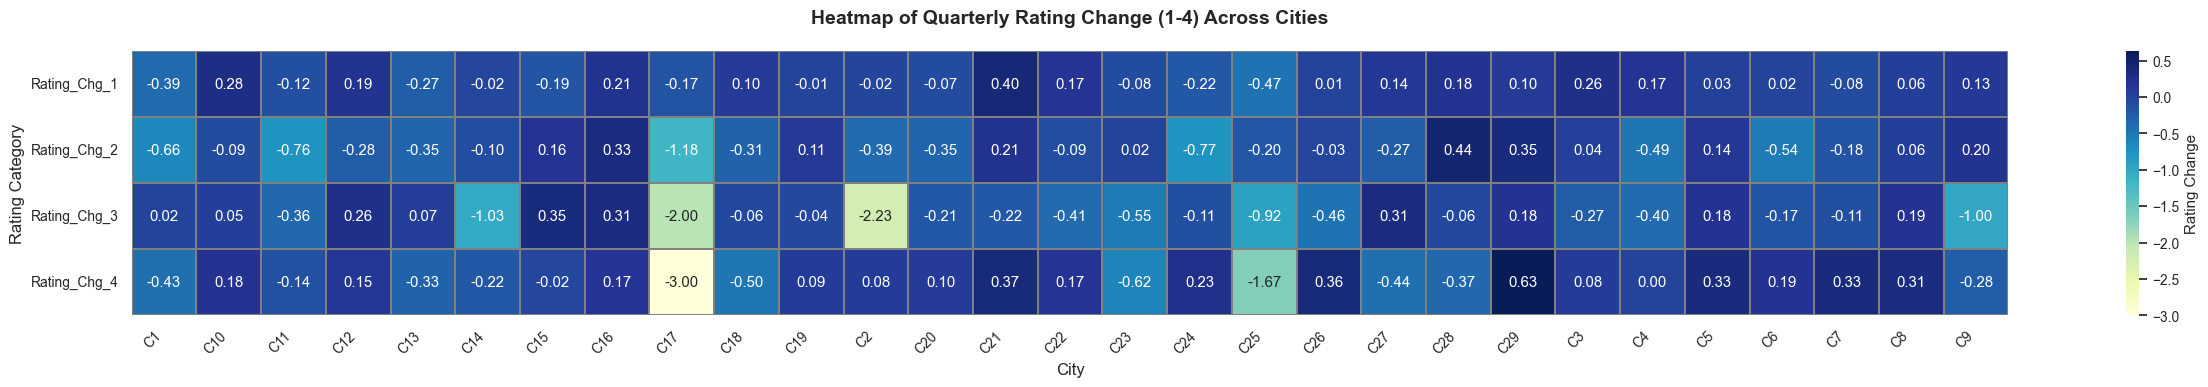

In [45]:
heatmap_df = rating_df[['City', 'Rating_Chg_1', 'Rating_Chg_2', 'Rating_Chg_3', 'Rating_Chg_4']]
heatmap_df = heatmap_df.set_index("City").T  

plt.figure(figsize=(25, 4))
sns.set(style="white", font_scale=0.9)

ax = sns.heatmap(
    heatmap_df,
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    linewidths=0.3,
    linecolor="gray",
    cbar_kws={"label": "Rating Change"}
)

plt.title("Heatmap of Quarterly Rating Change (1-4) Across Cities", fontsize=14, weight='bold', pad=20)
plt.xlabel("City", fontsize=12)
plt.ylabel("Rating Category", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Observations**

* **C17** shows the **sharpest negative shift** in **Rating 4 (-3.00)** and **Rating 3 (-2.00)** — signaling drastic degradation in higher-tier feedback.
* **C2** experienced a **major drop** in **Rating 3 (-2.23)**, indicating a steep decline in mid-tier performance.
* **C18** had consistently poor performance, with all ratings showing negative values, especially **Rating 4 (-1.67)** and **Rating 2 (-1.18)**.
* **C29** stands out with the **highest positive gain** in **Rating 4 (+0.63)**, showing improvement in top-tier perception.
* **C25** faced a broad decline, notably **Rating 3 (-0.92)** and **Rating 4 (-1.67)**.
* Cities like **C3**, **C28**, and **C6** maintained relatively **balanced or improving trends**, with mild positive changes across ratings.


In [48]:
df['reporting_month_year'] = pd.to_datetime(df['reporting_month_year'])

quarterly_agg = (
    df.groupby(['Driver_ID', 'ReportingYear_Quarter', 'reporting_month_year'])['Quarterly Rating']
    .max()
    .reset_index()
)

for i in range(1, 5):
    quarterly_agg[f'rating_{i}_flag'] = (quarterly_agg['Quarterly Rating'] == i).astype(int)

rating_df = (
    quarterly_agg.groupby('reporting_month_year')[
        ['rating_1_flag', 'rating_2_flag', 'rating_3_flag', 'rating_4_flag']
    ]
    .sum()
    .reset_index()
    .rename(columns={
        'rating_1_flag': 'Total_Rating_1',
        'rating_2_flag': 'Total_Rating_2',
        'rating_3_flag': 'Total_Rating_3',
        'rating_4_flag': 'Total_Rating_4',
    })
    .sort_values('reporting_month_year')
)

rating_df.head()

,reporting_month_year,Total_Rating_1,Total_Rating_2,Total_Rating_3,Total_Rating_4
0,2019-01-01,426,318,188,90
1,2019-02-01,348,318,188,90
2,2019-03-01,279,315,187,89
3,2019-04-01,325,242,154,73
4,2019-05-01,292,243,154,75


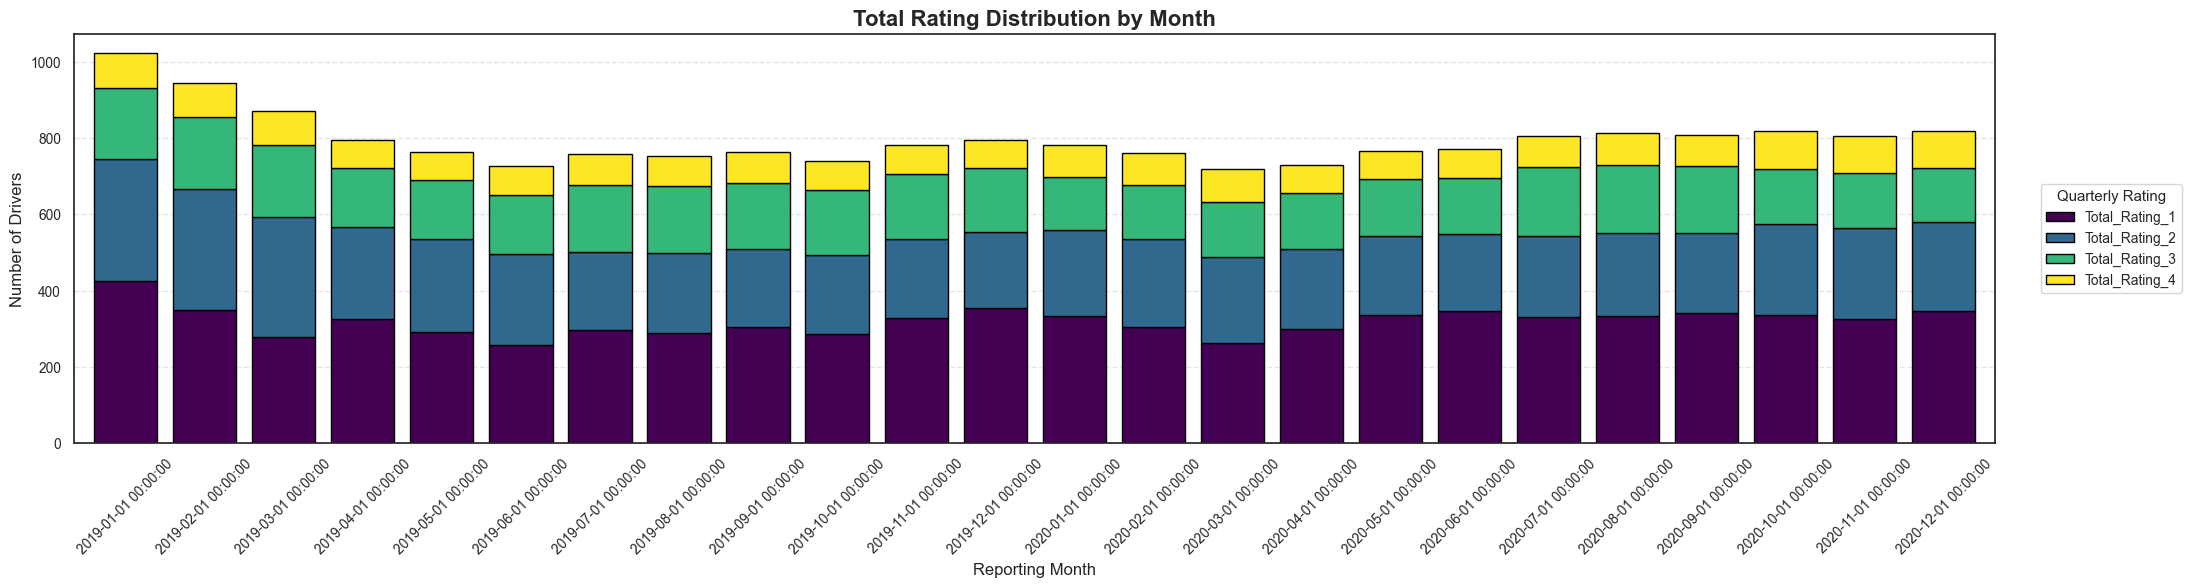

In [49]:
fig, ax = plt.subplots(figsize=(22, 6))

rating_df.plot(
    kind="bar",
    x="reporting_month_year",
    y=["Total_Rating_1", "Total_Rating_2", "Total_Rating_3", "Total_Rating_4"],
    stacked=True,
    width=0.8,
    cmap="viridis",
    edgecolor="black",
    ax=ax
)

ax.set_title("Total Rating Distribution by Month", fontsize=16, fontweight='bold')
ax.set_xlabel("Reporting Month", fontsize=12)
ax.set_ylabel("Number of Drivers", fontsize=12)
ax.tick_params(axis='x', rotation=45)

ax.legend(
    title="Quarterly Rating",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    frameon=True
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Observations**
* The chart shows the **monthly trend in driver ratings** over time from January 2019 to December 2020.
* **Rating 1** (lowest rating) consistently had the **highest count of drivers**, indicating a large portion of drivers were rated at the bottom level throughout.
* After a dip in mid-2019, the **total number of ratings started increasing** steadily again from early 2020.
* **Rating 4** (highest rating) maintained the **lowest share**, suggesting that very few drivers consistently achieved the top performance tier.
* The stable proportions after mid-2019 indicate a **more consistent rating pattern** month-over-month.
* Overall, the stacked bars reflect that **driver performance distribution remained skewed towards lower ratings**.


In [50]:
df_sorted = df.sort_values(["Driver_ID", "reporting_month_year"])

df_sorted["rating_1_flag"] = (df_sorted["Quarterly Rating"] == 1).astype(int)
df_sorted["rating_2_flag"] = (df_sorted["Quarterly Rating"] == 2).astype(int)
df_sorted["rating_3_flag"] = (df_sorted["Quarterly Rating"] == 3).astype(int)
df_sorted["rating_4_flag"] = (df_sorted["Quarterly Rating"] == 4).astype(int)

df_sorted["ReportingYear_Quarter"] = pd.to_datetime(df_sorted["reporting_month_year"]).dt.to_period("Q")

quarterly_agg = (
    df_sorted
    .groupby(["Driver_ID", "City", "ReportingYear_Quarter"], as_index=False)
    [["rating_1_flag", "rating_2_flag", "rating_3_flag", "rating_4_flag"]]
    .max()
)

rating_df = (
    quarterly_agg
    .groupby("City", as_index=False)
    [["rating_1_flag", "rating_2_flag", "rating_3_flag", "rating_4_flag"]]
    .sum()
    .rename(columns={
        "rating_1_flag": "Total_Rating_1",
        "rating_2_flag": "Total_Rating_2",
        "rating_3_flag": "Total_Rating_3",
        "rating_4_flag": "Total_Rating_4"
    })
)

rating_df.head()

,City,Total_Rating_1,Total_Rating_2,Total_Rating_3,Total_Rating_4
0,C1,114,79,43,19
1,C10,128,98,40,18
2,C11,81,55,26,15
3,C12,125,85,43,26
4,C13,114,38,48,21


In [51]:
rating_df['Total'] = rating_df[['Total_Rating_1', 'Total_Rating_2', 'Total_Rating_3', 'Total_Rating_4']].sum(axis=1)

rating_df['Rating_1_Perc'] = (rating_df['Total_Rating_1'] / rating_df['Total']) * 100
rating_df['Rating_2_Perc'] = (rating_df['Total_Rating_2'] / rating_df['Total']) * 100
rating_df['Rating_3_Perc'] = (rating_df['Total_Rating_3'] / rating_df['Total']) * 100
rating_df['Rating_4_Perc'] = (rating_df['Total_Rating_4'] / rating_df['Total']) * 100

rating_df = rating_df.drop(columns=['Total'])
rating_df.head()

,City,Total_Rating_1,Total_Rating_2,Total_Rating_3,Total_Rating_4,Rating_1_Perc,Rating_2_Perc,Rating_3_Perc,Rating_4_Perc
0,C1,114,79,43,19,44.705882,30.980392,16.862745,7.450980
1,C10,128,98,40,18,45.070423,34.507042,14.084507,6.338028
2,C11,81,55,26,15,45.762712,31.073446,14.689266,8.474576
3,C12,125,85,43,26,44.802867,30.465950,15.412186,9.318996
4,C13,114,38,48,21,51.583710,17.194570,21.719457,9.502262


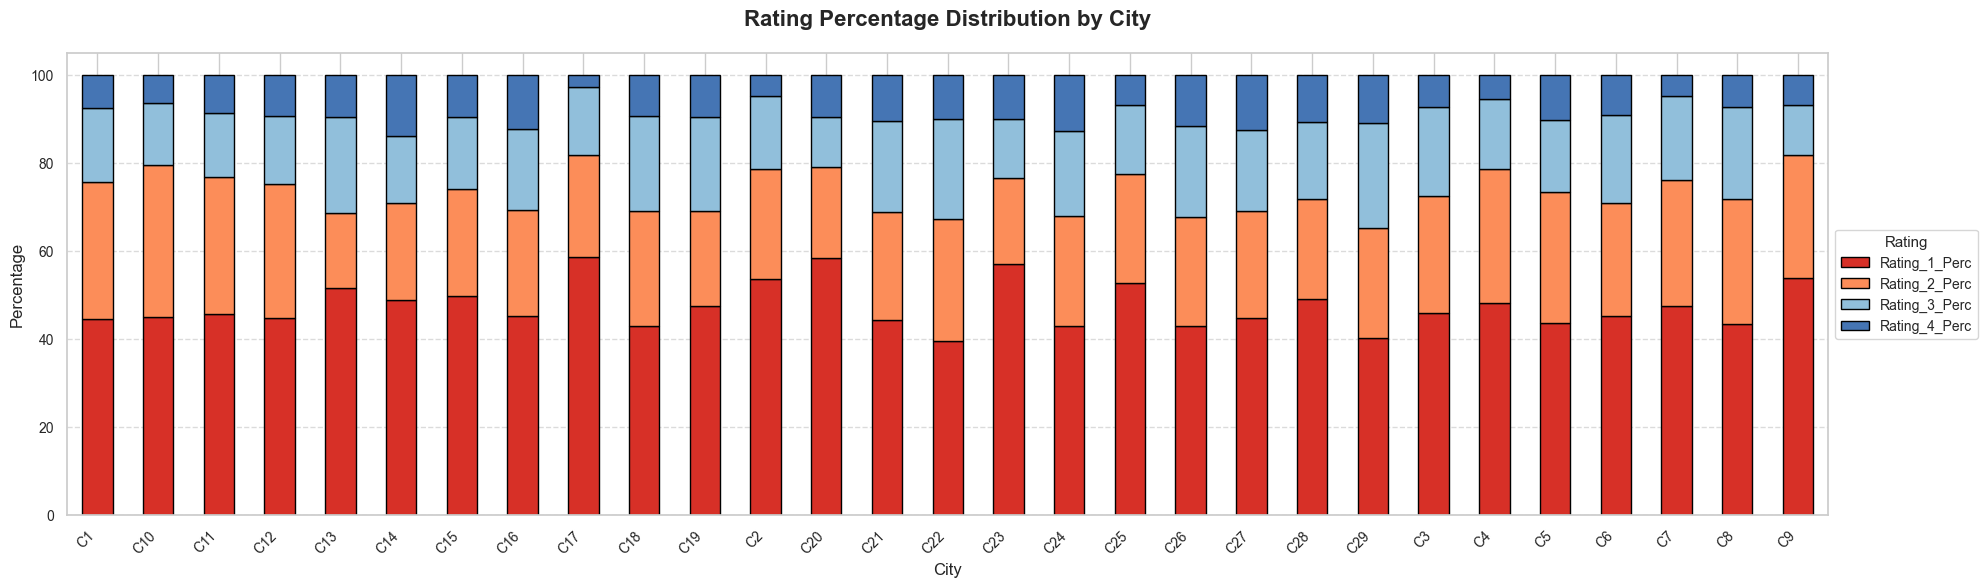

In [52]:
sns.set_style("whitegrid")

palette = ["#d73027", "#fc8d59", "#91bfdb", "#4575b4"] 

fig, ax = plt.subplots(figsize=(20, 6))

rating_df.set_index("City")[["Rating_1_Perc", "Rating_2_Perc", "Rating_3_Perc", "Rating_4_Perc"]].plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=palette,
    edgecolor="black"
)

ax.set_title("Rating Percentage Distribution by City", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("City", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

ax.yaxis.grid(True, linestyle="--", alpha=0.7)

ax.legend(title="Rating", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()

### **Observations**

* **Rating 1** (lowest rating) consistently dominates across all cities, contributing to over **40–55%** of the driver ratings, indicating performance concerns are widespread.
* Cities like **C17, C2, and C20** have the **highest proportion of Rating 1**, suggesting more drivers with lower performance in these areas.
* **C12 and C13** show relatively **better distributions**, with a higher share of **Ratings 3 and 4**, indicating better-performing drivers.
* **Rating 4** (best rating) stays the **least common** across most cities, rarely exceeding 10%, highlighting a general scarcity of top-rated drivers.
* **Balanced distributions** are observed in cities like **C13 and C19**, where mid-tier ratings (2 and 3) are more prominent than extreme values.

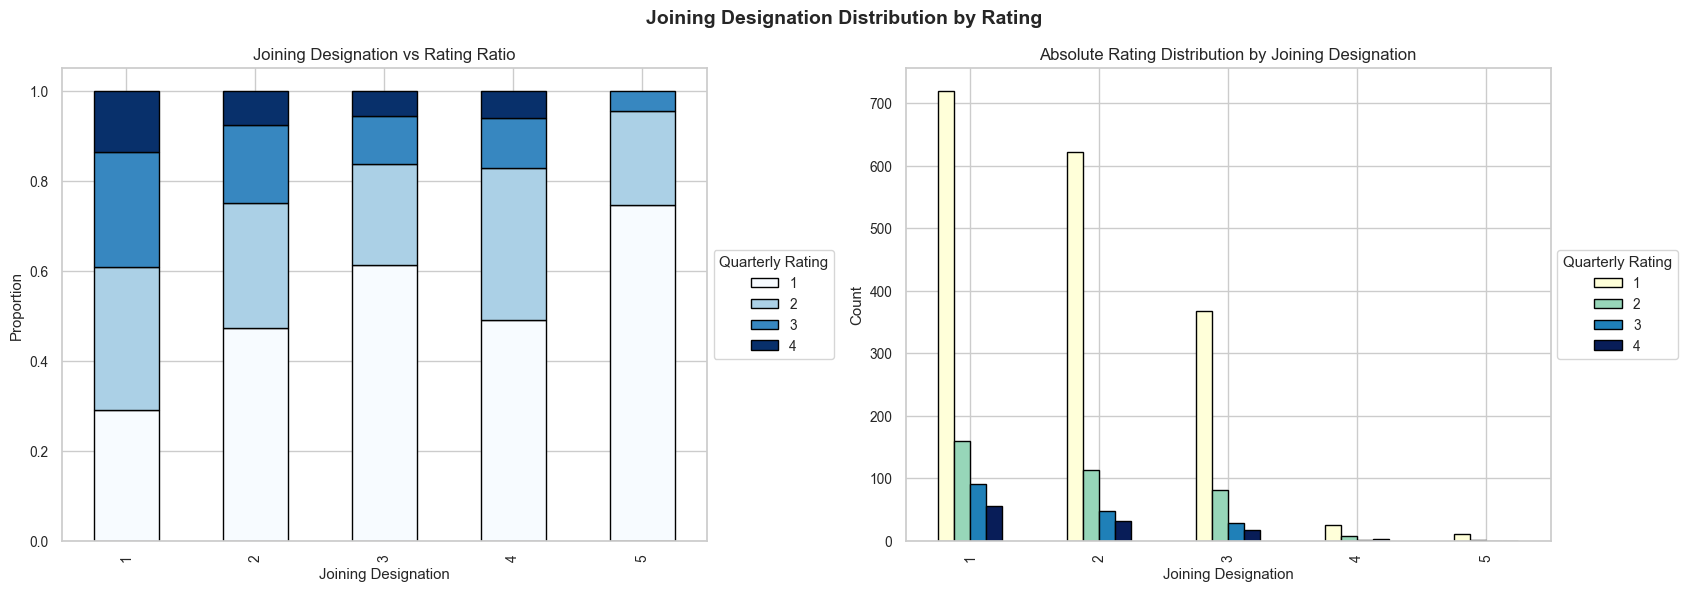

In [53]:
sns.set_style("whitegrid")

rating_counts = merged_df.groupby("Joining_Designation")["Quarterly_Rating"].value_counts().unstack().fillna(0)

rating_ratios = pd.crosstab(
    df["Joining Designation"],
    df["Quarterly Rating"],
    normalize="index"
)

fig, ax = plt.subplots(1, 2, figsize=(17, 6))

rating_ratios.plot(
    kind="bar",
    stacked=True,
    cmap="Blues",
    edgecolor="black",
    ax=ax[0]
)
ax[0].set_title("Joining Designation vs Rating Ratio", fontsize=12)
ax[0].set_ylabel("Proportion")
ax[0].set_xlabel("Joining Designation")
ax[0].legend(
    title="Quarterly Rating",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

rating_counts.plot(
    kind="bar",
    stacked=False,
    cmap="YlGnBu",
    edgecolor="black",
    ax=ax[1]
)
ax[1].set_title("Absolute Rating Distribution by Joining Designation", fontsize=12)
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Joining Designation")
ax[1].legend(
    title="Quarterly Rating",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.suptitle("Joining Designation Distribution by Rating", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### **Observations**

* **Lower Joining Designations (1 and 2)** have a **higher proportion of drivers** with better ratings (Ratings 3 and 4), suggesting better performance or retention.
* **Designation 1** shows the most balanced spread, with a notable share of **Rating 2 and Rating 3**, and the **highest count overall**.
* As **Joining Designation increases (3 to 5)**, there's a **sharp rise in Rating 1 proportion**, indicating **poorer performance** among higher-designation joiners.
* **Designation 5** has **more than 70% of drivers** rated as **Rating 1**, and almost **no presence** in Ratings 3 and 4.
* The **absolute counts** confirm that **Designation 1 and 2** dominate in volume, with hundreds of drivers, while higher designations are fewer but tend to underperform.

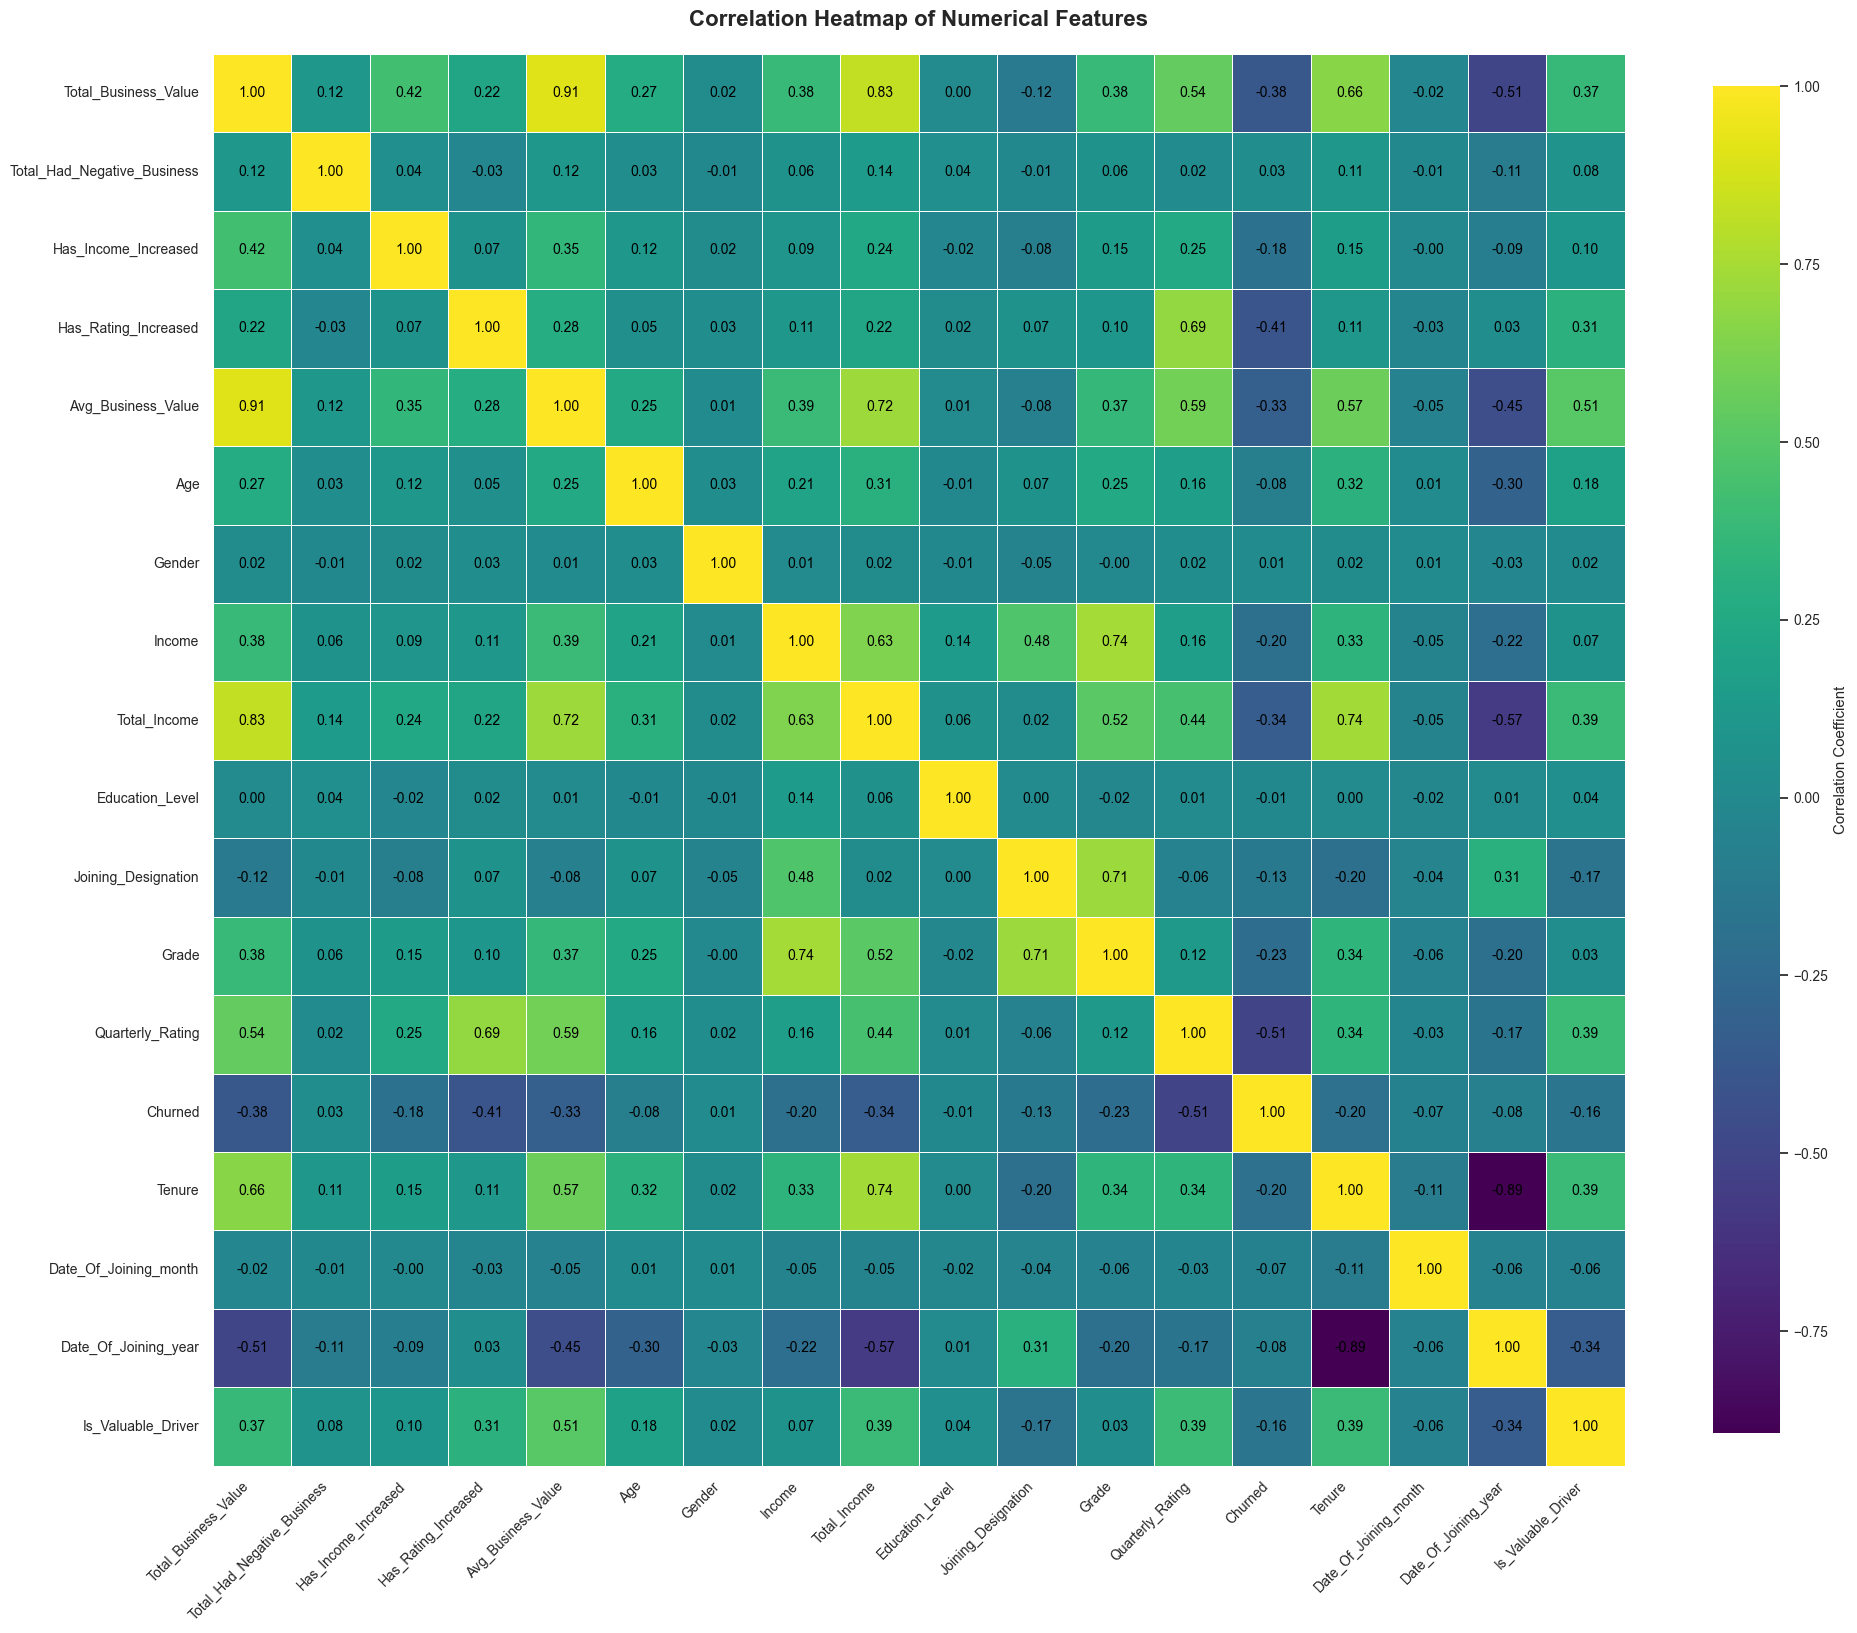

In [54]:
merged_df_corr = merged_df.select_dtypes(include=[np.number]).drop("Driver_ID", axis=1).corr()

plt.figure(figsize=(20, 18))

sns.heatmap(
    merged_df_corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot_kws={"fontsize": 10, "color": "black"}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


### **Observations**

* **Strong Positive Correlations:**

  * `Total_Business_Value` has a **very high correlation** with:

    * `Avg_Business_Value` (**0.91**)
    * `Total_Income` (**0.83**)
    * `Grade` (**0.83**)
    * `Quarterly_Rating` (**0.54**)
  * `Total_Income` is highly correlated with:

    * `Income` (**0.74**)
    * `Grade` (**0.74**)
    * `Tenure` (**0.74**)

* **Key Indicators of High Performance:**

  * `Quarterly_Rating` correlates positively with:

    * `Has_Rating_Increased` (**0.65**)
    * `Avg_Business_Value` (**0.59**)
    * `Grade` (**0.44**)
    * `Total_Business_Value` (**0.54**)

* **Indicators of Churn:**

  * `Churned` has a **moderate negative correlation** with:

    * `Tenure` (**-0.43**)
    * `Quarterly_Rating` (**-0.51**)
    * `Total_Business_Value` (**-0.38**)
    * `Is_Valuable_Driver` (**-0.34**)
    * `Date_Of_Joining_year` (**-0.57**) → More recent joiners churn more.

* **Interesting Observations:**

  * `Is_Valuable_Driver` is positively associated with:

    * `Quarterly_Rating` (**0.39**)
    * `Tenure` (**0.39**)
    * `Total_Income` (**0.39**)
    * `Total_Business_Value` (**0.37**)

* **Low or No Correlation:**

  * `Gender`, `Education_Level`, and `Age` have weak or negligible correlations with most performance or value indicators.

In [55]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    accuracy_score,
    f1_score,
    average_precision_score,
    precision_score,
    recall_score
)

import joblib

In [56]:
model_df = merged_df.drop(columns= ['Churned_str'])
model_df.head(3).T

,0,1,2
Driver_ID,1,2,4
Date_Of_Joining,2018-12-24 00:00:00,2020-06-11 00:00:00,2019-07-12 00:00:00
Total_Business_Value,1715580,0,350000
Total_Had_Negative_Business,1,0,0
Has_Income_Increased,0,0,0
Has_Rating_Increased,0,0,0
Avg_Business_Value,571860,0,70000
Last_Reporting_Month,2019-03-01 00:00:00,2020-12-01 00:00:00,2020-04-01 00:00:00
Age,28.0,31.0,43.0
Gender,0.0,0.0,0.0


### **Random Forest Classifier**

In [57]:
categorical_cols = ['City']

numerical_cols = [
    'Total_Business_Value', 'Total_Had_Negative_Business', 'Has_Income_Increased',
    'Has_Rating_Increased', 'Avg_Business_Value', 'Age', 'Gender', 'Income',
    'Total_Income', 'Education_Level', 'Joining_Designation', 'Grade',
    'Quarterly_Rating', 'Tenure', 'Date_Of_Joining_month', 'Date_Of_Joining_year',
    'Is_Valuable_Driver'
]
feature_columns = categorical_cols + numerical_cols

train_data, test_data = train_test_split(model_df, test_size=0.2, random_state=42)

X_train_rf = train_data[feature_columns]
y_train_rf = train_data['Churned']
X_test_rf = test_data[feature_columns]
y_test_rf = test_data['Churned']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [200, 250, 300, 350],
    "classifier__max_depth": [5, 10, 15, 20],
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_rf, y_train_rf)
y_pred_rf = grid.predict(X_test_rf)

joblib.dump(grid.best_estimator_, "S:/Project_3/models/rf_model.pkl")

best_rf = joblib.load("S:/Project_3/models/rf_model.pkl")
rf_model = best_rf.named_steps['classifier']
print("NumTrees:", rf_model.n_estimators, "MaxDepth:", rf_model.max_depth)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
NumTrees: 300 MaxDepth: 20


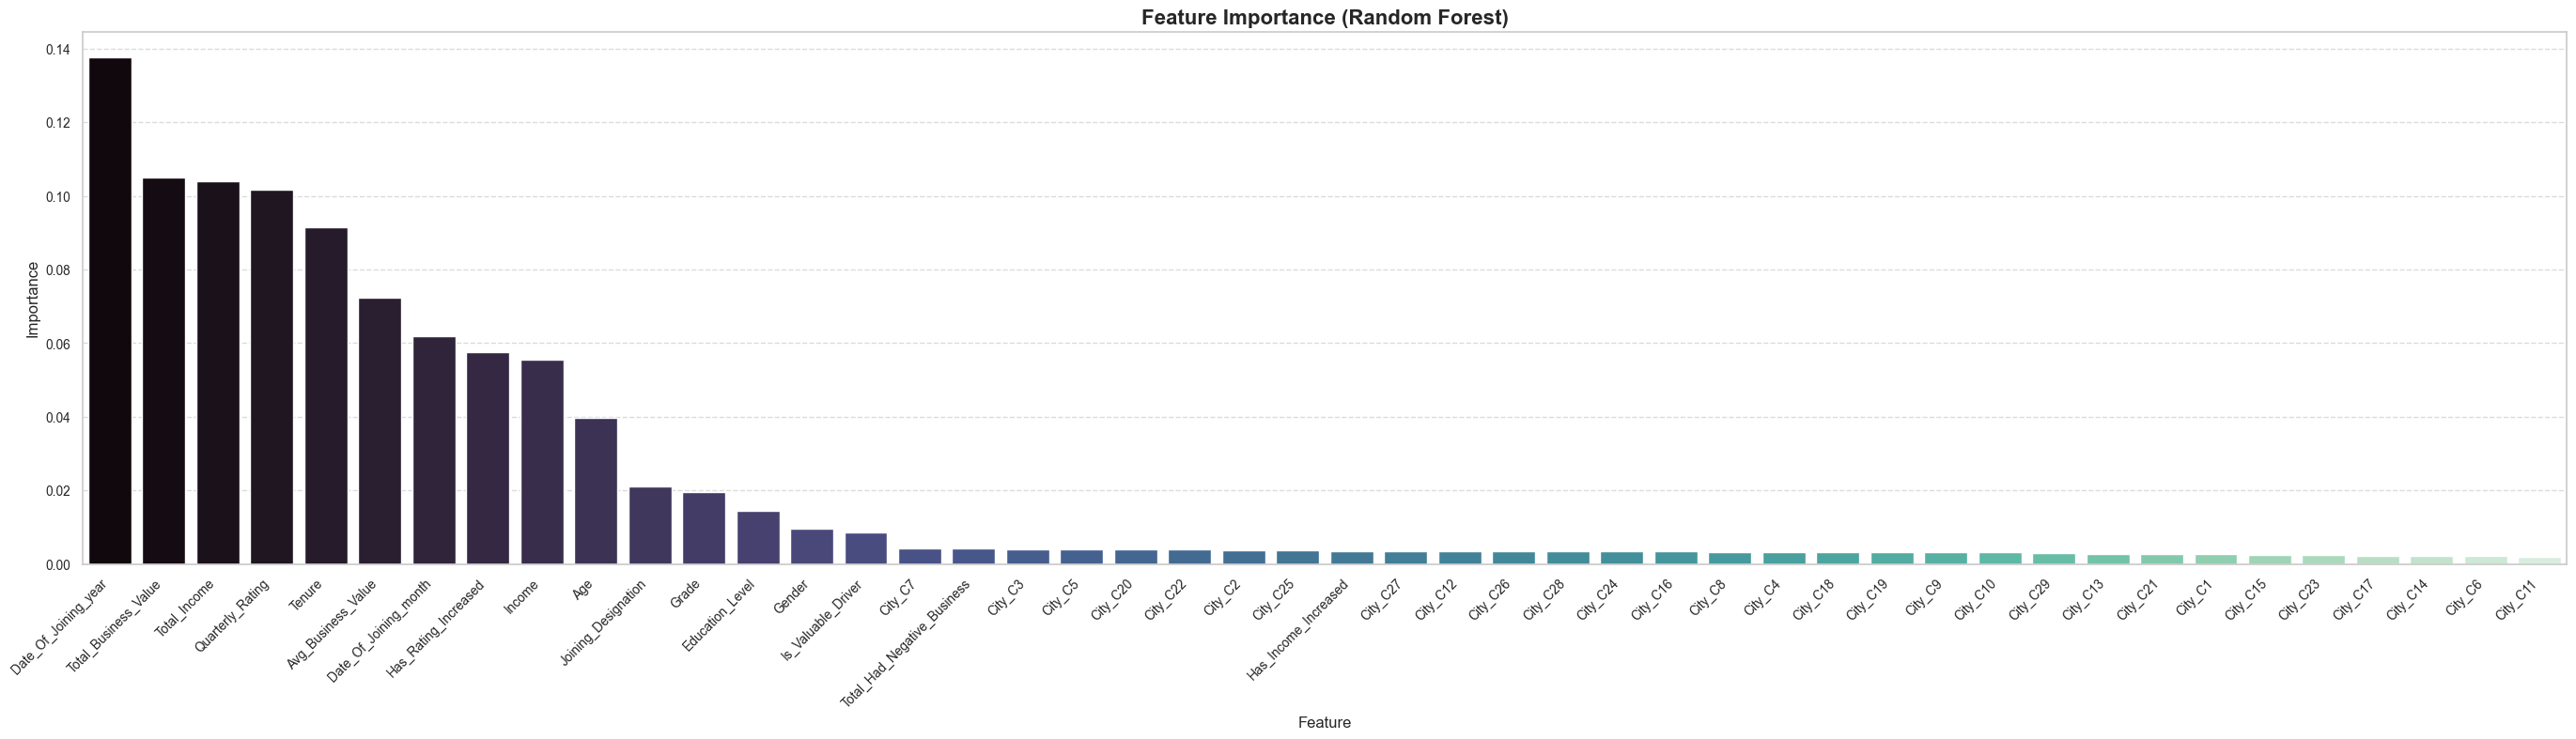

In [58]:
preprocessor = best_rf.named_steps['preprocessor']
rf_model = best_rf.named_steps['classifier']

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
num_features = numerical_cols
all_features = np.concatenate([cat_features, num_features])

importances = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(max(10, len(all_features) * 0.6), 8))
sns.barplot(data=feat_imp_df, x="Feature", y="Importance", palette="mako")

plt.title("Feature Importance (Random Forest)", fontsize=16, weight="bold")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### **Observations**
- We can see that Joining Year is the most important feature followed by Total Bussiness Value.

In [59]:
y_pred_rf = best_rf.predict(X_test_rf)
y_prob_rf = best_rf.predict_proba(X_test_rf)[:, 1] 
y_true_rf = y_test_rf

In [60]:
def print_metrics(y_true, y_pred, y_prob):
    print(classification_report(y_true, y_pred))
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("F1 Score: ", f1_score(y_true, y_pred))
    print("AUC: ", roc_auc_score(y_true, y_prob))

def get_best_threshold(y_true, y_prob):
    thresholds = np.arange(0.0, 1.0, 0.01)

    precisions = []
    recalls = []
    f1s = []

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        precisions.append(precision_score(y_true, y_pred))
        recalls.append(recall_score(y_true, y_pred))
        f1s.append(f1_score(y_true, y_pred))

    best_index = np.argmax(f1s)
    best_threshold = thresholds[best_index]

    print(f'Best threshold: {best_threshold:.2f}')
    print(f'Precision at best threshold: {precisions[best_index]:.3f}')
    print(f'Recall at best threshold: {recalls[best_index]:.3f}')
    print(f'F1 score at best threshold: {f1s[best_index]:.3f}')

    return best_threshold

print_metrics(y_true_rf, y_pred_rf, y_prob_rf)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       150
           1       0.89      0.94      0.91       327

    accuracy                           0.88       477
   macro avg       0.87      0.85      0.86       477
weighted avg       0.88      0.88      0.88       477

Accuracy:  0.8805031446540881
F1 Score:  0.9147982062780269
AUC:  0.9508256880733945


In [61]:
best_threshold = get_best_threshold(y_true_rf, y_prob_rf)
y_pred_thresh = (y_prob_rf >= best_threshold).astype(int)

Best threshold: 0.58
Precision at best threshold: 0.928
Recall at best threshold: 0.908
F1 score at best threshold: 0.918


In [62]:
print_metrics(y_true_rf, y_pred_thresh, y_prob_rf)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.93      0.91      0.92       327

    accuracy                           0.89       477
   macro avg       0.87      0.88      0.87       477
weighted avg       0.89      0.89      0.89       477

Accuracy:  0.8888888888888888
F1 Score:  0.9180834621329211
AUC:  0.9508256880733945


### **Observations**

- With these new adjustment the, the f1 score increased by 0.4%.

### **Insights**
- A Recall of 91% means that out of all churned drivers, the model was correct 91% of times
- A precision of 93% means that out of all churned drivers predicted, 93% were actually churned.

In [63]:
def plot_two_evaluation_plots(y_true, y_prob):

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    thresholds = np.append(thresholds, 1.0)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = roc_auc_score(y_true, y_prob)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=100, gridspec_kw={'wspace': 0.25})

    axs[0].plot(thresholds, precision, label="Precision", color="green")
    axs[0].plot(thresholds, recall, label="Recall", color="orange")
    axs[0].set_xlabel("Threshold")
    axs[0].set_ylabel("Score")
    axs[0].set_title("Precision & Recall vs Threshold")
    axs[0].grid(True, linestyle="--", alpha=0.5)

    axs[1].plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="blue")
    axs[1].plot([0, 1], [0, 1], 'k--', lw=1)
    axs[1].set_xlabel("False Positive Rate")
    axs[1].set_ylabel("True Positive Rate")
    axs[1].set_title("ROC Curve")
    axs[1].grid(True, linestyle="--", alpha=0.5)

    handles0, labels0 = axs[0].get_legend_handles_labels()
    handles1, labels1 = axs[1].get_legend_handles_labels()

    fig.legend(handles0 + handles1, labels0 + labels1,
               loc='center left', bbox_to_anchor=(0.9, 0.5),
               frameon=False, fontsize=11)

    plt.tight_layout(rect=[0, 0, 1.02, 1])
    plt.show()

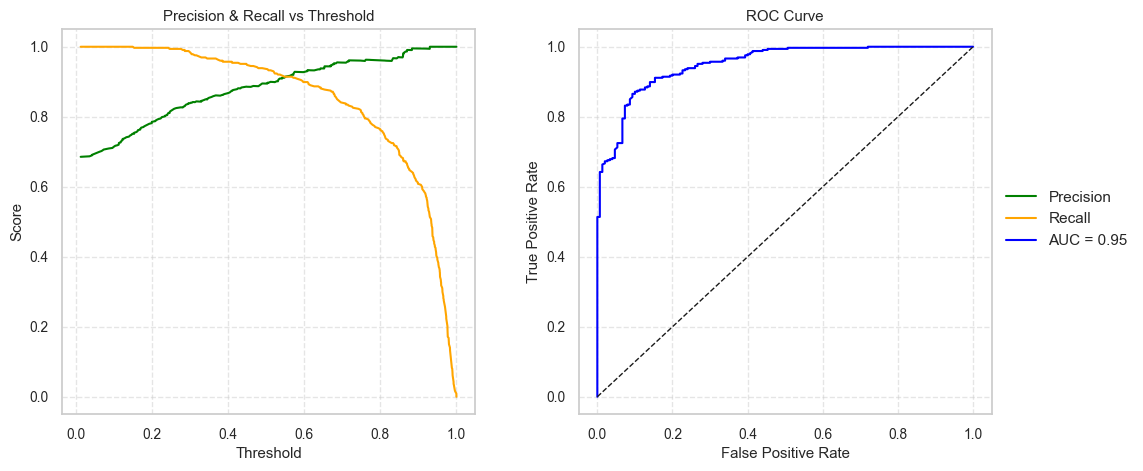

In [64]:
plot_two_evaluation_plots(y_true_rf, y_prob_rf)

In [65]:
def plot_pr_and_confusion_matrix(y_true, y_prob, y_pred, normalize='true'):

    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred, normalize=normalize, labels=[0, 1])

    fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.25})

    axs[0].plot(recall, precision, label='Precision-Recall', color='purple')
    axs[0].set_xlabel("Recall")
    axs[0].set_ylabel("Precision")
    axs[0].set_title("Precision-Recall Curve")
    axs[0].grid(True, linestyle="--", alpha=0.5)

    sns.heatmap(cm, annot=True, cmap="viridis", fmt='.2f', 
                xticklabels=[0, 1], yticklabels=[0, 1], ax=axs[1])
    axs[1].set_title('Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.9, 0.5), frameon=False, fontsize=11)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

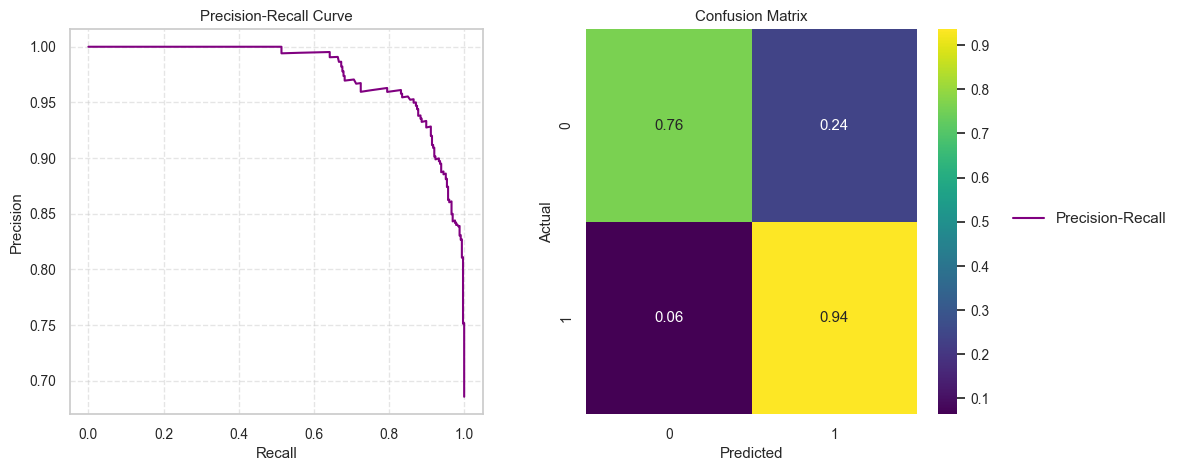

In [66]:
plot_pr_and_confusion_matrix(y_true_rf, y_prob_rf, y_pred_rf)

### **Observations**

- 76% of the actual negative cases (class 0) were correctly predicted by the model as not having churned.
- 24% of the actual negative cases (class 0) were incorrectly predicted by the model as having churned.
- 6% of the actual positive cases (class 1) were incorrectly predicted by the model as not having churned.
- 94% of the actual positive cases (class 1) were correctly predicted by the model as having churned.

### **Gradient Boosting Classifier**

In [67]:
categorical_cols = ['City']

numerical_cols = [
    'Total_Business_Value', 'Total_Had_Negative_Business', 'Has_Income_Increased',
    'Has_Rating_Increased', 'Avg_Business_Value', 'Age', 'Gender', 'Income',
    'Total_Income', 'Education_Level', 'Joining_Designation', 'Grade',
    'Quarterly_Rating', 'Tenure', 'Date_Of_Joining_month', 'Date_Of_Joining_year',
    'Is_Valuable_Driver'
]
feature_columns = categorical_cols + numerical_cols

train_data, test_data = train_test_split(model_df, test_size=0.2, random_state=42)

X_train_gbt = train_data[feature_columns]
y_train_gbt = train_data['Churned']
X_test_gbt = test_data[feature_columns]
y_test_gbt = test_data['Churned']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

maxDepth_values = np.random.choice(range(3, 10), size=4, replace=False)
stepSize_values = [0.1, 0.2]
maxIter_values = [30, 50, 100, 150]

param_grid = {
    "classifier__max_depth": list(maxDepth_values),
    "classifier__learning_rate": stepSize_values,
    "classifier__n_estimators": maxIter_values
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_gbt, y_train_gbt)

y_pred_gbt = grid.predict(X_test_gbt)
joblib.dump(grid.best_estimator_, "S:/Project_3/models/gb_model.pkl")

best_gb = joblib.load("S:/Project_3/models/gb_model.pkl")
gb_model = best_gb.named_steps['classifier']
print("Best MaxDepth:", gb_model.max_depth)
print("Best LearningRate:", gb_model.learning_rate)
print("Best NumEstimators:", gb_model.n_estimators)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best MaxDepth: 5
Best LearningRate: 0.1
Best NumEstimators: 150


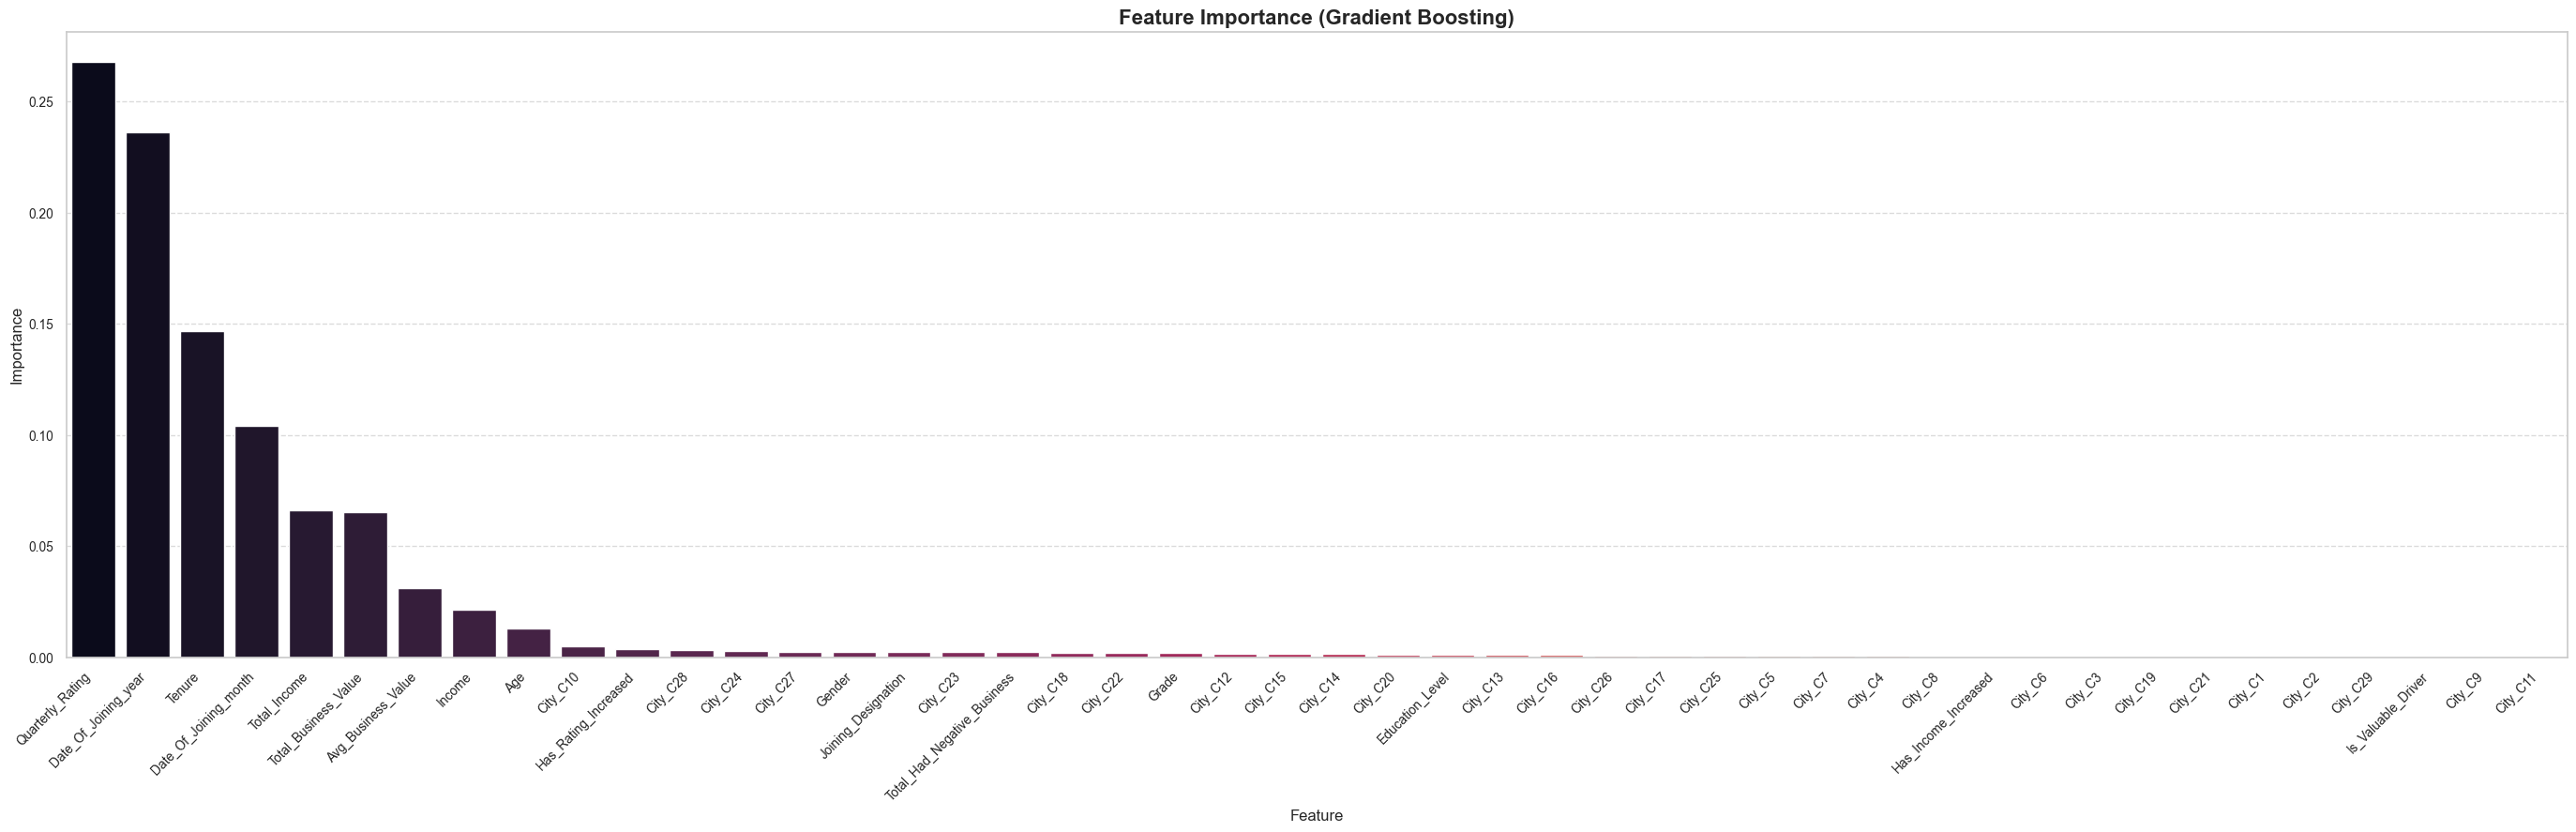

In [68]:
preprocessor = best_gb.named_steps['preprocessor']
gb_model = best_gb.named_steps['classifier']

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
num_features = numerical_cols
all_features = np.concatenate([cat_features, num_features])

importances = gb_model.feature_importances_

feat_imp_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(max(10, len(all_features) * 0.6), 9))
sns.barplot(data=feat_imp_df, x="Feature", y="Importance", palette="rocket")

plt.title("Feature Importance (Gradient Boosting)", fontsize=16, weight="bold")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### **Observations**

- We can see that Quarterly Rating is the most important feature followed by Joining Year.

In [69]:
y_pred_gbt = best_gb.predict(X_test_gbt)
y_prob_gbt = gb_model.predict_proba(preprocessor.transform(X_test_gbt))[:, 1]
y_true_gbt = y_test_gbt

In [70]:
print_metrics(y_true_gbt, y_pred_gbt, y_prob_gbt)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       150
           1       0.94      0.95      0.95       327

    accuracy                           0.93       477
   macro avg       0.92      0.91      0.91       477
weighted avg       0.93      0.93      0.93       477

Accuracy:  0.9266247379454927
F1 Score:  0.9468892261001517
AUC:  0.9761671763506625


In [71]:
best_threshold = get_best_threshold(y_true_gbt, y_prob_gbt)
y_pred_thresh = (y_prob_gbt >= best_threshold).astype(int)

Best threshold: 0.55
Precision at best threshold: 0.954
Recall at best threshold: 0.954
F1 score at best threshold: 0.954


In [72]:
print_metrics(y_true_gbt, y_pred_thresh, y_prob_gbt)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       150
           1       0.95      0.95      0.95       327

    accuracy                           0.94       477
   macro avg       0.93      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477

Accuracy:  0.9371069182389937
F1 Score:  0.9541284403669725
AUC:  0.9761671763506625


### **Observations**

- With these new adjustment the, the f1 score increased by 0.8%.

### **Insights**
- A Recall of 95% means that out of all churned drivers, the model was correct 95% of times
- A precision of 95% means that out of all churned drivers predicted, 95% were actually churned.

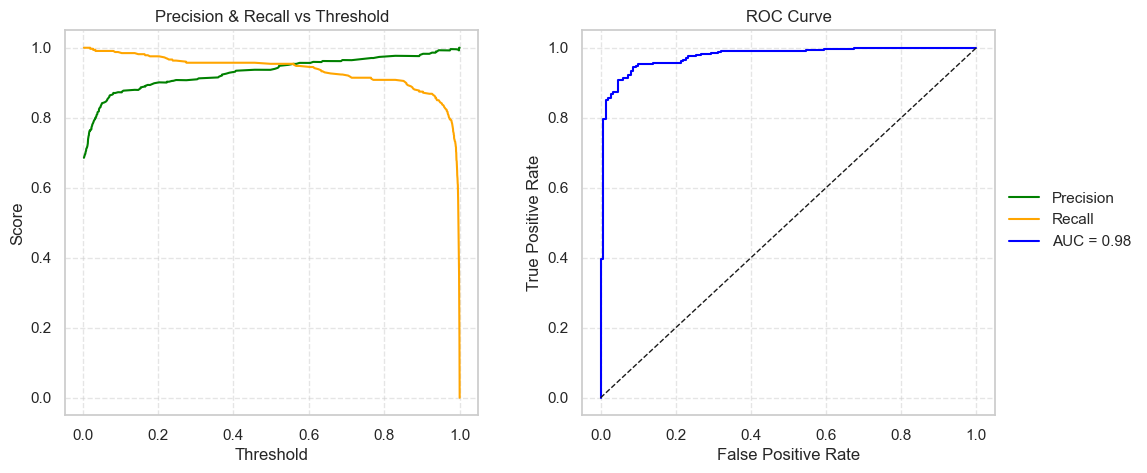

In [115]:
plot_two_evaluation_plots(y_true_gbt, y_prob_gbt)

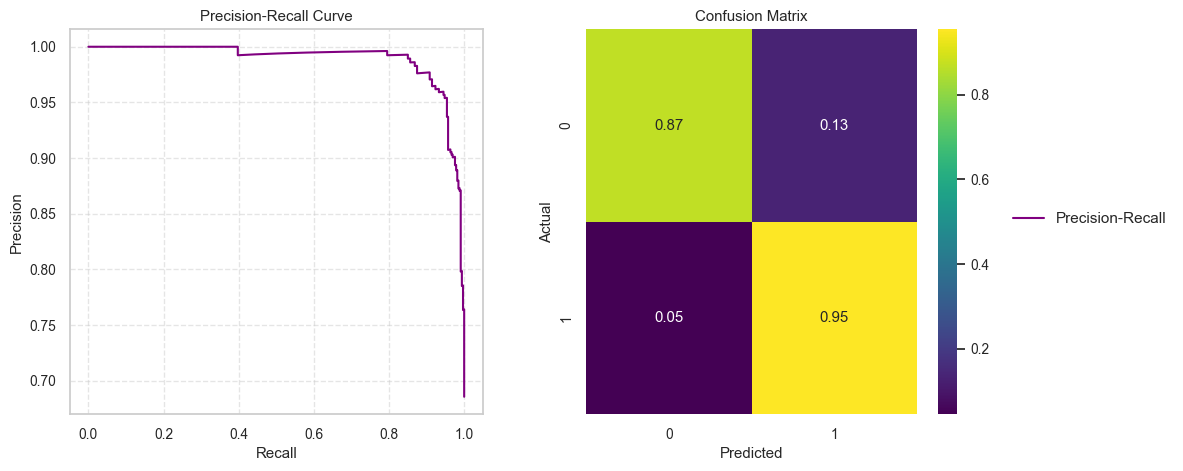

In [74]:
plot_pr_and_confusion_matrix(y_true_gbt, y_prob_gbt, y_pred_gbt)

### **Observations**

- 87% of the actual negative cases (class 0) were correctly predicted by the model as not having churned.
- 13% of the actual negative cases (class 0) were incorrectly predicted by the model as having churned.
- 5% of the actual positive cases (class 1) were incorrectly predicted by the model as not having churned.
- 95% of the actual positive cases (class 1) were correctly predicted by the model as having churned.

### **XGB Classifier**

In [75]:
categorical_cols = ['City']

numerical_cols = [
    'Total_Business_Value', 'Total_Had_Negative_Business', 'Has_Income_Increased',
    'Has_Rating_Increased', 'Avg_Business_Value', 'Age', 'Gender', 'Income',
    'Total_Income', 'Education_Level', 'Joining_Designation', 'Grade',
    'Quarterly_Rating', 'Tenure', 'Date_Of_Joining_month', 'Date_Of_Joining_year',
    'Is_Valuable_Driver'
]
feature_columns = categorical_cols + numerical_cols

train_data, test_data = train_test_split(model_df, test_size=0.2, random_state=42)

X_train_xgb = train_data[feature_columns]
y_train_xgb = train_data['Churned']
X_test_xgb = test_data[feature_columns]
y_test_xgb = test_data['Churned']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__learning_rate": [0.1, 0.2, 0.3],
    "classifier__n_estimators": [150, 200, 250],
    "classifier__subsample": [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_xgb, y_train_xgb)

y_pred_xgb = grid.predict(X_test_xgb)
joblib.dump(grid.best_estimator_, "S:/Project_3/models/xgb_model.pkl")

best_xgb = joblib.load("S:/Project_3/models/xgb_model.pkl")
xgb_model = best_xgb.named_steps['classifier']

print("Best MaxDepth:", xgb_model.max_depth)
print("Best LearningRate:", xgb_model.learning_rate)
print("Best NumEstimators:", xgb_model.n_estimators)
print("Best Subsample:", xgb_model.subsample)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best MaxDepth: 5
Best LearningRate: 0.1
Best NumEstimators: 200
Best Subsample: 1.0


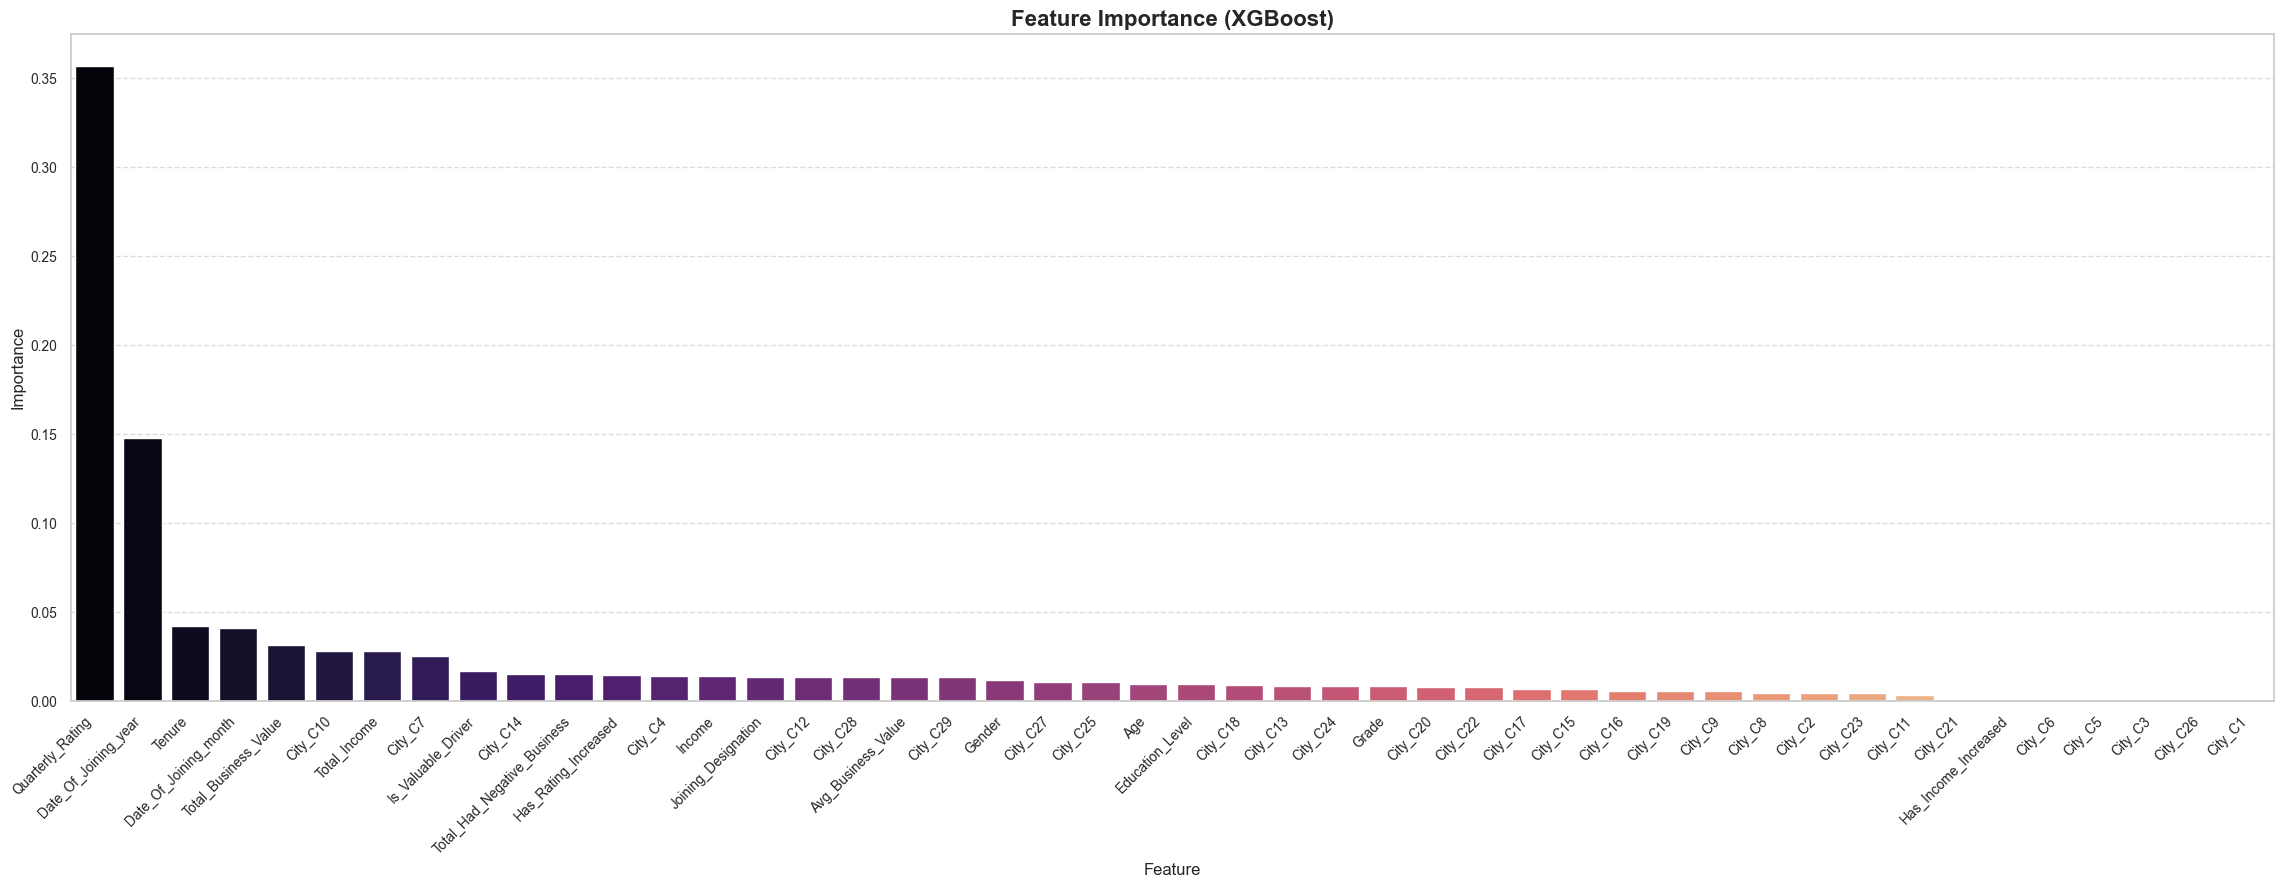

In [76]:
preprocessor = best_xgb.named_steps['preprocessor']
xgb_model = best_xgb.named_steps['classifier']

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
num_features = numerical_cols
all_features = np.concatenate([cat_features, num_features])

importances = xgb_model.feature_importances_

feat_imp_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(max(12, len(all_features) * 0.5), 9))
sns.barplot(data=feat_imp_df, x="Feature", y="Importance", palette="magma")

plt.title("Feature Importance (XGBoost)", fontsize=16, weight="bold")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### **Observations**
- We can see that Quarterly Rating is the most important feature followed by Joining Year.

In [77]:
y_pred_xgb = best_xgb.predict(X_test_xgb)
y_prob_xgb = xgb_model.predict_proba(preprocessor.transform(X_test_xgb))[:, 1]
y_true_xgb = y_test_xgb

In [78]:
print_metrics(y_true_xgb, y_pred_xgb, y_prob_xgb)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       150
           1       0.94      0.95      0.94       327

    accuracy                           0.92       477
   macro avg       0.91      0.91      0.91       477
weighted avg       0.92      0.92      0.92       477

Accuracy:  0.9224318658280922
F1 Score:  0.943683409436834
AUC:  0.9787359836901122


In [79]:
best_threshold = get_best_threshold(y_true_xgb, y_prob_xgb)
y_pred_thresh = (y_prob_xgb >= best_threshold).astype(int)

Best threshold: 0.67
Precision at best threshold: 0.971
Recall at best threshold: 0.930
F1 score at best threshold: 0.950


In [80]:
print_metrics(y_true_xgb, y_pred_thresh, y_prob_xgb)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       150
           1       0.97      0.93      0.95       327

    accuracy                           0.93       477
   macro avg       0.92      0.93      0.92       477
weighted avg       0.94      0.93      0.93       477

Accuracy:  0.9329140461215933
F1 Score:  0.95
AUC:  0.9787359836901122


### **Observations**

- With these new adjustment the, the f1 score increased by 0.7%.

### **Insights**
- A Recall of 93% means that out of all churned drivers, the model was correct 93% of times
- A precision of 97% means that out of all churned drivers predicted, 97% were actually churned.

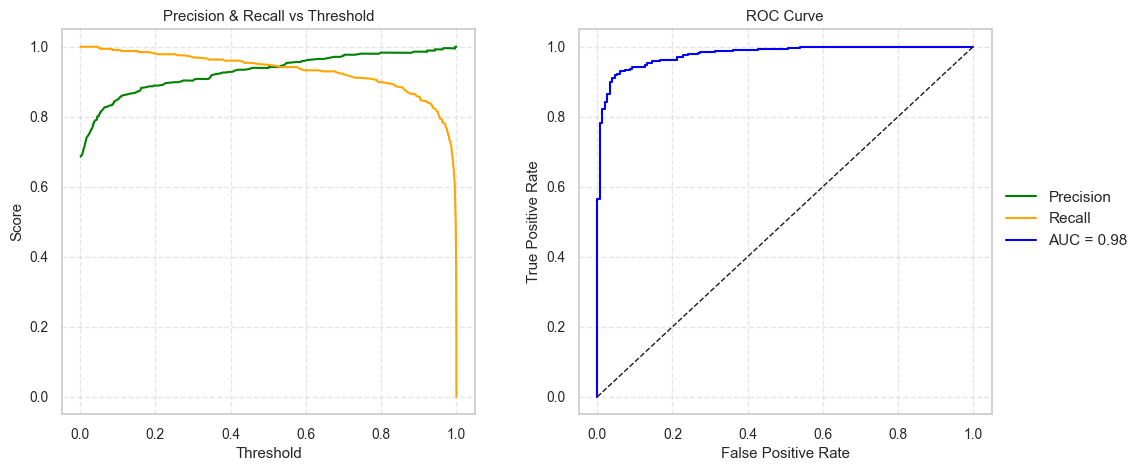

In [81]:
plot_two_evaluation_plots(y_true_xgb, y_prob_xgb)

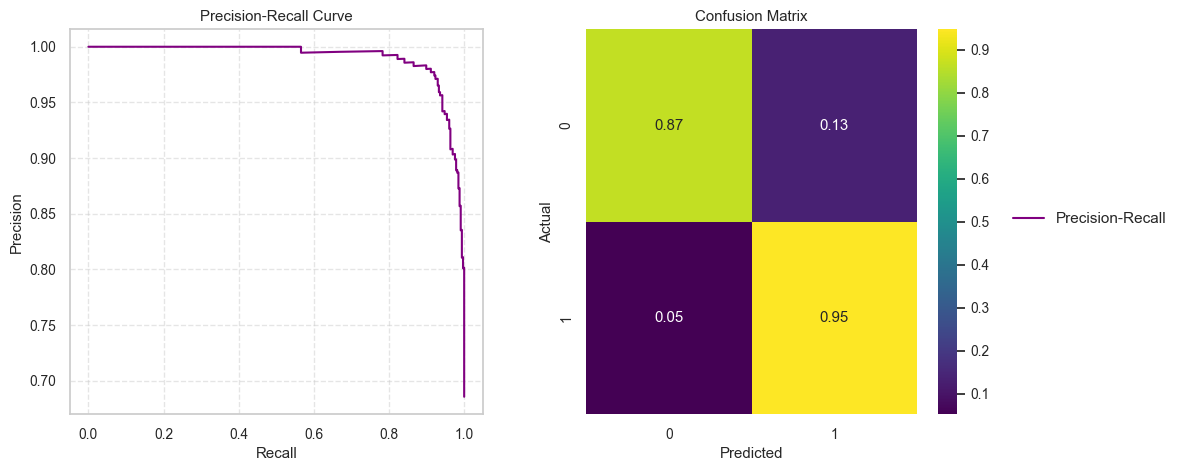

In [82]:
plot_pr_and_confusion_matrix(y_true_xgb, y_prob_xgb, y_pred_xgb)

### **Observations**

- 87% of the actual negative cases (class 0) were correctly predicted by the model as not having churned.
- 13% of the actual negative cases (class 0) were incorrectly predicted by the model as having churned.
- 5% of the actual positive cases (class 1) were incorrectly predicted by the model as not having churned.
- 95% of the actual positive cases (class 1) were correctly predicted by the model as having churned.

### **LGBM Classifier**

In [83]:
import optuna

categorical_cols = ['City']
numerical_cols = [
    'Total_Business_Value', 'Total_Had_Negative_Business', 'Has_Income_Increased',
    'Has_Rating_Increased', 'Avg_Business_Value', 'Age', 'Gender', 'Income',
    'Total_Income', 'Education_Level', 'Joining_Designation', 'Grade',
    'Quarterly_Rating', 'Tenure', 'Date_Of_Joining_month', 'Date_Of_Joining_year',
    'Is_Valuable_Driver'
]
feature_columns = categorical_cols + numerical_cols

train_data, test_data = train_test_split(model_df, test_size=0.2, random_state=42)
X_train_lgbm = train_data[feature_columns]
y_train_lgbm = train_data['Churned']
X_test_lgbm = test_data[feature_columns]
y_test_lgbm = test_data['Churned']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.3)
    num_iterations = trial.suggest_int("n_estimators", 50, 200)
    subsample = trial.suggest_float("subsample", 0.6, 1.0)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(
            learning_rate=learning_rate,
            n_estimators=num_iterations,
            subsample=subsample,
            random_state=42,
            verbosity=-1,
            class_weight="balanced"  
        ))
    ])

    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_lgbm, y_train_lgbm, test_size=0.2, random_state=42)

    pipeline.fit(X_train_split, y_train_split)
    y_val_pred = pipeline.predict(X_val_split)
    f1 = f1_score(y_val_split, y_val_pred)

    return f1

study = optuna.create_study(direction="maximize")
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=50)

print("Best Trial:")
print(f"  F1 Score: {study.best_trial.value:.4f}")
print("  Params:")
for k, v in study.best_trial.params.items():
    print(f"    {k}: {v}")


best_params = study.best_trial.params

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        learning_rate=best_params["learning_rate"],
        n_estimators=best_params["n_estimators"],
        subsample=best_params["subsample"],
        random_state=42,
        verbosity=-1,
        class_weight="balanced"
    ))
])

final_pipeline.fit(X_train_lgbm, y_train_lgbm)
joblib.dump(final_pipeline, "S:/Project_3/models/lgbm_model.pkl")

y_pred_lgbm = final_pipeline.predict(X_test_lgbm)
y_prob_lgbm = final_pipeline.predict_proba(X_test_lgbm)[:, 1]
print("Test F1 Score:", f1_score(y_test_lgbm, y_pred_lgbm))

[I 2025-07-13 11:04:47,871] A new study created in memory with name: no-name-f64de012-c79c-4c29-b15f-7aa4f996b68f


Best Trial:
  F1 Score: 0.9364
  Params:
    learning_rate: 0.25250233340053446
    n_estimators: 139
    subsample: 0.9993086200429014
Test F1 Score: 0.9418960244648318


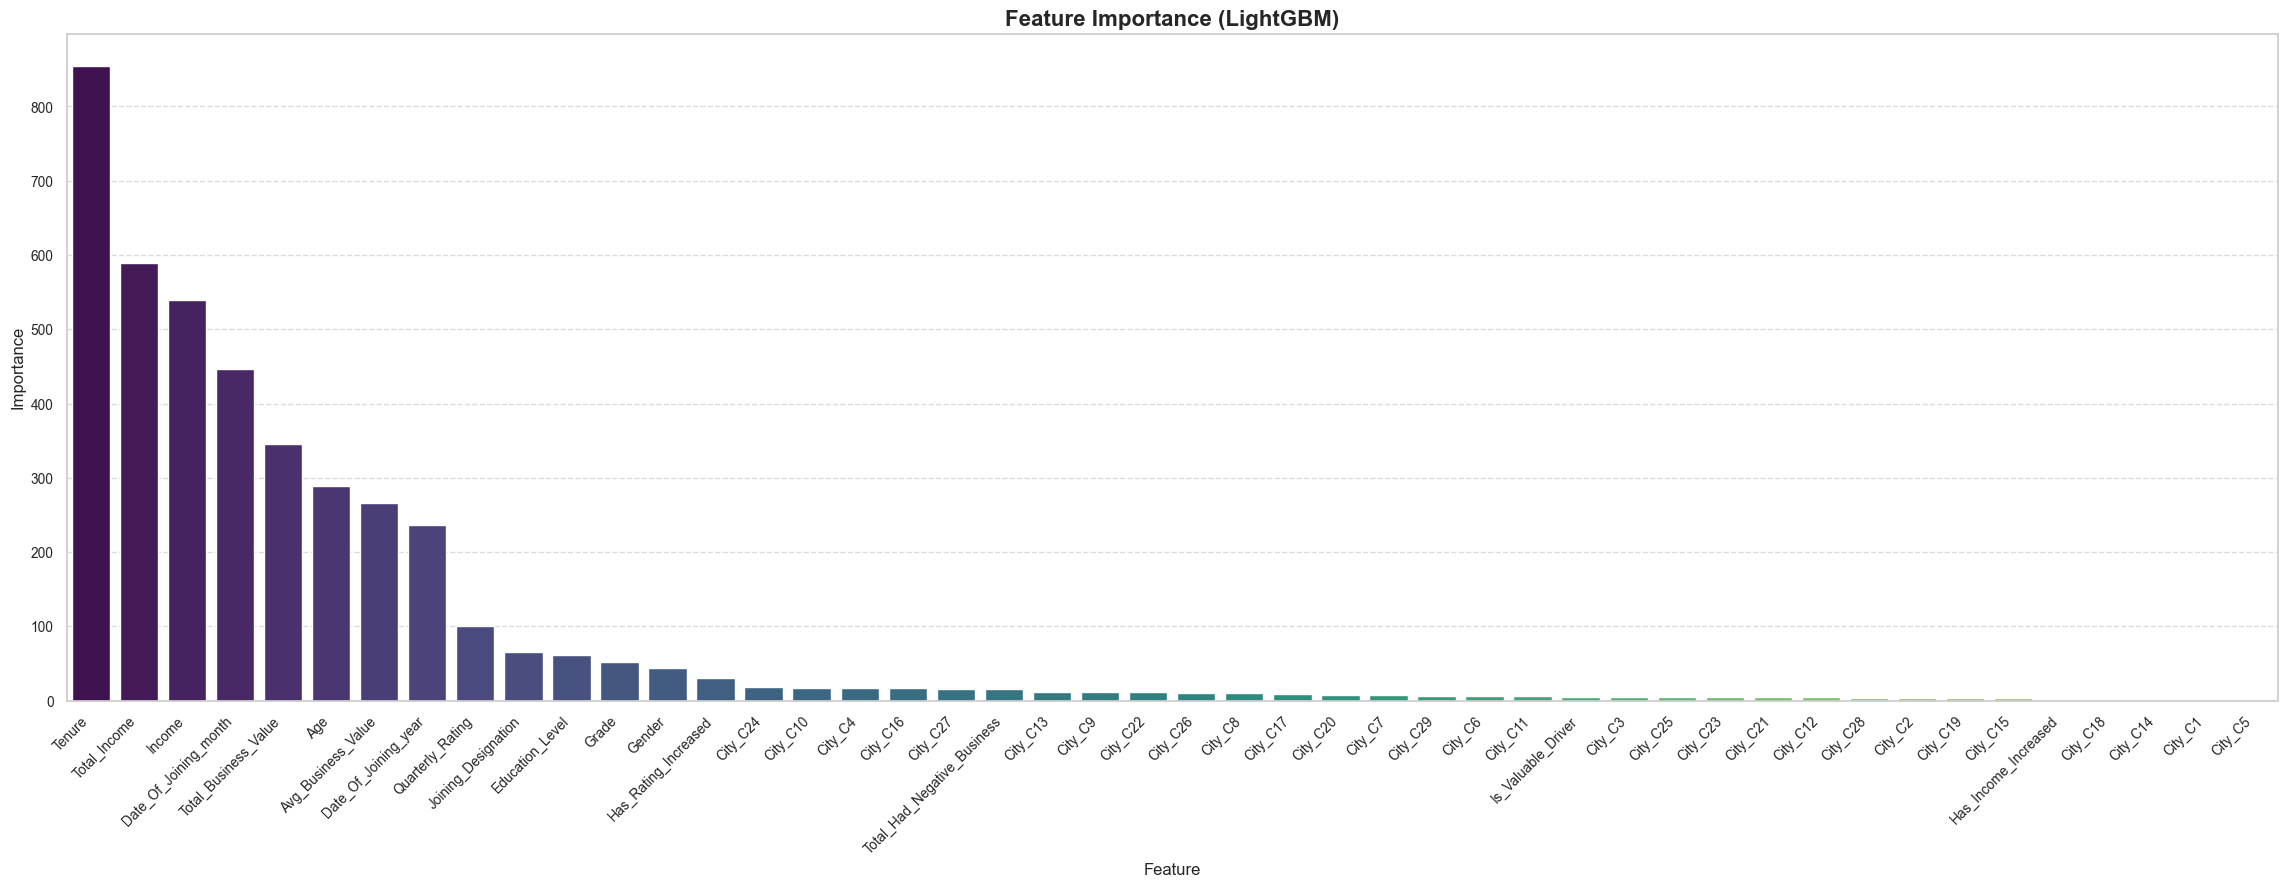

In [84]:
preprocessor = final_pipeline.named_steps['preprocessor']
lgbm_model = final_pipeline.named_steps['classifier']

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
num_features = numerical_cols
all_features = np.concatenate([cat_features, num_features])

importances = lgbm_model.feature_importances_

feat_imp_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(max(12, len(all_features) * 0.5), 9))
sns.barplot(data=feat_imp_df, x="Feature", y="Importance", palette="viridis")

plt.title("Feature Importance (LightGBM)", fontsize=16, weight="bold")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### **Observations**
- We can see that Tenure is the most important feature followed by Total Income.

In [85]:
y_pred_lgbm = final_pipeline.predict(X_test_lgbm)
y_prob_lgbm = final_pipeline.predict_proba(X_test_lgbm)[:, 1]
y_true_lgbm = y_test_lgbm

In [86]:
print_metrics(y_true_lgbm, y_pred_lgbm, y_prob_lgbm)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.94      0.94      0.94       327

    accuracy                           0.92       477
   macro avg       0.91      0.91      0.91       477
weighted avg       0.92      0.92      0.92       477

Accuracy:  0.9203354297693921
F1 Score:  0.9418960244648318
AUC:  0.9788786952089704


In [87]:
best_threshold = get_best_threshold(y_true_lgbm, y_prob_lgbm)
y_pred_thresh = (y_prob_lgbm >= best_threshold).astype(int)

Best threshold: 0.87
Precision at best threshold: 0.977
Recall at best threshold: 0.924
F1 score at best threshold: 0.950


In [88]:
print_metrics(y_true_lgbm, y_pred_thresh, y_prob_lgbm)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       150
           1       0.98      0.92      0.95       327

    accuracy                           0.93       477
   macro avg       0.91      0.94      0.92       477
weighted avg       0.94      0.93      0.93       477

Accuracy:  0.9329140461215933
F1 Score:  0.949685534591195
AUC:  0.9788786952089704


### **Observations**
- With these new adjustment the, the f1 score increased by 0.9%.

### **Insights**
- A Recall of 92% means that out of all churned drivers, the model was correct 92% of times
- A precision of 98% means that out of all churned drivers predicted, 98% were actually churned.

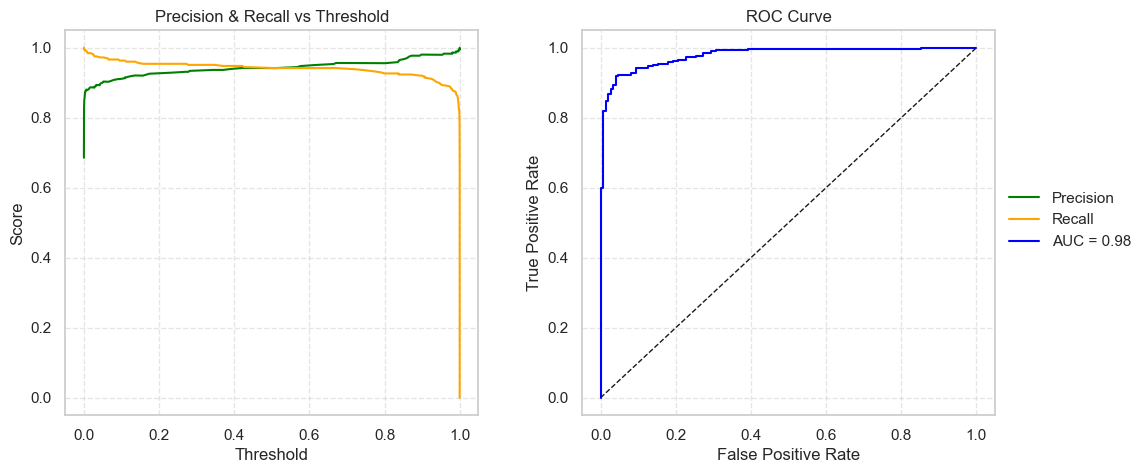

In [116]:
plot_two_evaluation_plots(y_true_lgbm, y_prob_lgbm)

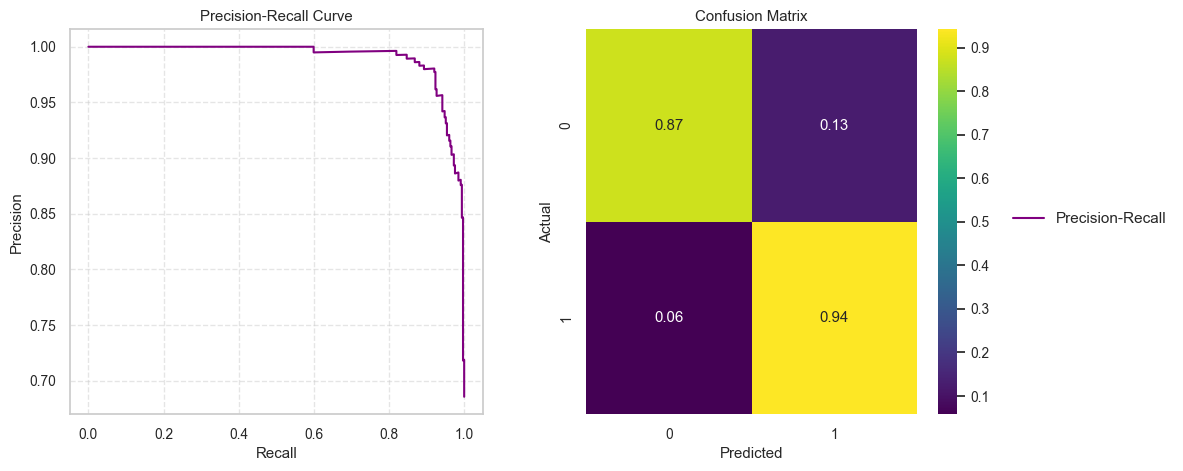

In [90]:
plot_pr_and_confusion_matrix(y_true_lgbm, y_prob_lgbm, y_pred_lgbm)

### **Observations**

- 87% of the actual negative cases (class 0) were correctly predicted by the model as not having churned.
- 13% of the actual negative cases (class 0) were incorrectly predicted by the model as having churned.
- 6% of the actual positive cases (class 1) were incorrectly predicted by the model as not having churned.
- 94% of the actual positive cases (class 1) were correctly predicted by the model as having churned.

### **Model Comparison**

In [91]:
import joblib

best_rf = joblib.load("S:/Project_3/models/rf_model.pkl")
best_gbt = joblib.load("S:/Project_3/models/gb_model.pkl")
best_xgb = joblib.load("S:/Project_3/models/xgb_model.pkl")
best_lgbm = joblib.load("S:/Project_3/models/lgbm_model.pkl")

In [92]:
y_prob_rf = best_rf.predict_proba(X_test_rf)[:, 1]
y_prob_gbt = best_gbt.predict_proba(X_test_gbt)[:, 1]
y_prob_xgb = best_xgb.predict_proba(X_test_xgb)[:, 1]
y_prob_lgbm = best_lgbm.predict_proba(X_test_lgbm)[:, 1]

In [93]:
best_threshold_rf = get_best_threshold(y_true_rf, y_prob_rf)
best_threshold_gbt = get_best_threshold(y_true_gbt, y_prob_gbt)
best_threshold_xgb = get_best_threshold(y_true_xgb, y_prob_xgb)
best_threshold_lgbm = get_best_threshold(y_true_lgbm, y_prob_lgbm)

y_pred_rf = (y_prob_rf >= best_threshold_rf).astype(int)
y_pred_gbt = (y_prob_gbt >= best_threshold_gbt).astype(int)
y_pred_xgb = (y_prob_xgb >= best_threshold_xgb).astype(int)
y_pred_lgbm = (y_prob_lgbm >= best_threshold_lgbm).astype(int)

Best threshold: 0.58
Precision at best threshold: 0.928
Recall at best threshold: 0.908
F1 score at best threshold: 0.918
Best threshold: 0.55
Precision at best threshold: 0.954
Recall at best threshold: 0.954
F1 score at best threshold: 0.954
Best threshold: 0.67
Precision at best threshold: 0.971
Recall at best threshold: 0.930
F1 score at best threshold: 0.950
Best threshold: 0.87
Precision at best threshold: 0.977
Recall at best threshold: 0.924
F1 score at best threshold: 0.950


In [94]:
print("Random Forest:\n", classification_report(y_true_rf, y_pred_rf))
print("GBT:\n", classification_report(y_true_gbt, y_pred_gbt))
print("XGBoost:\n", classification_report(y_true_xgb, y_pred_xgb))
print("LightGBM:\n", classification_report(y_true_lgbm, y_pred_lgbm))

Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.93      0.91      0.92       327

    accuracy                           0.89       477
   macro avg       0.87      0.88      0.87       477
weighted avg       0.89      0.89      0.89       477

GBT:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       150
           1       0.95      0.95      0.95       327

    accuracy                           0.94       477
   macro avg       0.93      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477

XGBoost:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       150
           1       0.97      0.93      0.95       327

    accuracy                           0.93       477
   macro avg       0.92      0.93      0.92       477
weighted avg       0.94      0.93      0.9

In [95]:
columns = ["Model", "F1", "Accuracy", "Precision", "Recall", "AUC"]

results = [
    ("Random Forest", f1_score(y_true_rf, y_pred_rf), accuracy_score(y_true_rf, y_pred_rf), precision_score(y_true_rf, y_pred_rf), recall_score(y_true_rf, y_pred_rf), roc_auc_score(y_true_rf, y_prob_rf)),
    ("Gradient Boosting", f1_score(y_true_gbt, y_pred_gbt), accuracy_score(y_true_gbt, y_pred_gbt), precision_score(y_true_gbt, y_pred_gbt), recall_score(y_true_gbt, y_pred_gbt), roc_auc_score(y_true_gbt, y_prob_gbt)),
    ("XGBoost", f1_score(y_true_xgb, y_pred_xgb), accuracy_score(y_true_xgb, y_pred_xgb), precision_score(y_true_xgb, y_pred_xgb), recall_score(y_true_xgb, y_pred_xgb), roc_auc_score(y_true_xgb, y_prob_xgb)),
    ("LightGBM", f1_score(y_true_lgbm, y_pred_lgbm), accuracy_score(y_true_lgbm, y_pred_lgbm), precision_score(y_true_lgbm, y_pred_lgbm), recall_score(y_true_lgbm, y_pred_lgbm), roc_auc_score(y_true_lgbm, y_prob_lgbm))
]

results_df = pd.DataFrame(results, columns=columns).sort_values("F1", ascending=False)
results_df

,Model,F1,Accuracy,Precision,Recall,AUC
1,Gradient Boosting,0.954128,0.937107,0.954128,0.954128,0.976167
2,XGBoost,0.950000,0.932914,0.971246,0.929664,0.978736
3,LightGBM,0.949686,0.932914,0.977346,0.923547,0.978879
0,Random Forest,0.918083,0.888889,0.928125,0.908257,0.950826


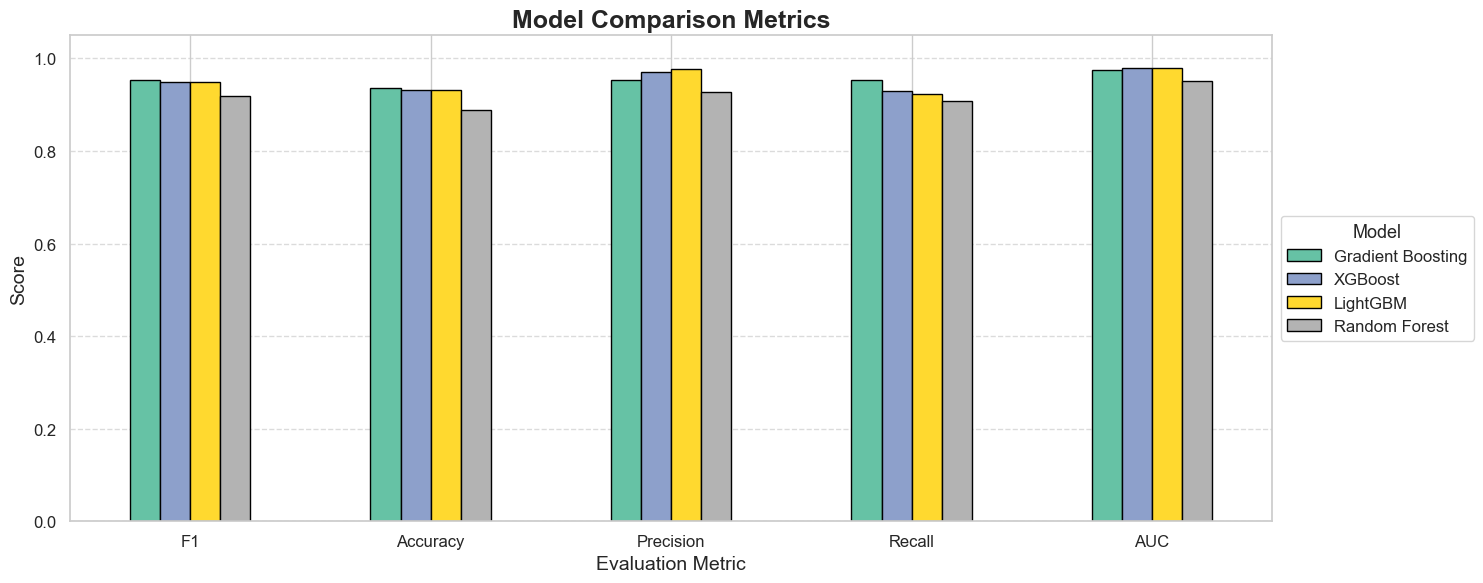

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

ax = results_df.set_index("Model").T.plot(
    kind="bar",
    figsize=(15, 6),
    colormap="Set2",
    edgecolor='black'
)

plt.title("Model Comparison Metrics", fontsize=18, fontweight="bold")
plt.ylabel("Score", fontsize=14)
plt.xlabel("Evaluation Metric", fontsize=14)
plt.ylim(0, 1.05)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(
    title="Model",
    bbox_to_anchor=(1, 0.5),
    loc='center left',
    fontsize=12,
    title_fontsize=13
)
plt.tight_layout()
plt.show()

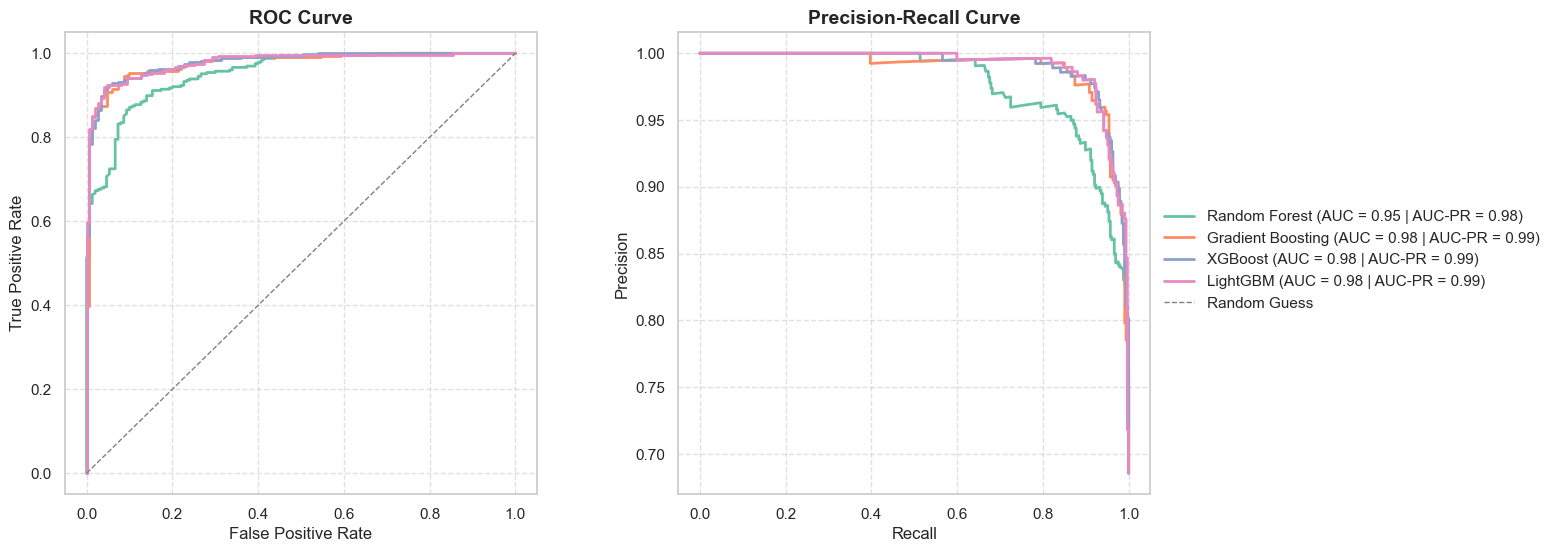


Best Model by AUC: LightGBM (0.9789)
Best Model by AUC-PR: LightGBM (0.9907)


In [97]:
def plot_roc_and_pr_curves(y_true_dict, y_prob_dict, palette=None):
    
    if palette is None:
        palette = sns.color_palette("Set2", len(y_true_dict))

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), dpi=100, gridspec_kw={'wspace': 0.3})
    
    auc_scores = {}
    auc_pr_scores = {}
    combined_labels = []

    for i, model in enumerate(y_true_dict.keys()):
        y_true = y_true_dict[model]
        y_prob = y_prob_dict[model]

        fpr, tpr, _ = roc_curve(y_true, y_prob)
        auc_score = roc_auc_score(y_true, y_prob)
        auc_scores[model] = auc_score

        precision, recall, _ = precision_recall_curve(y_true, y_prob)
        auc_pr = average_precision_score(y_true, y_prob)
        auc_pr_scores[model] = auc_pr

        label = f"{model} (AUC = {auc_score:.2f} | AUC-PR = {auc_pr:.2f})"
        combined_labels.append(label)

        axs[0].plot(fpr, tpr, label=label, color=palette[i], linewidth=2)
        axs[1].plot(recall, precision, label=label, color=palette[i], linewidth=2)

    axs[0].plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1, label="Random Guess")

    axs[0].set_title("ROC Curve", fontsize=14, fontweight="bold")
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Positive Rate")
    axs[0].grid(True, linestyle="--", alpha=0.6)

    axs[1].set_title("Precision-Recall Curve", fontsize=14, fontweight="bold")
    axs[1].set_xlabel("Recall")
    axs[1].set_ylabel("Precision")
    axs[1].grid(True, linestyle="--", alpha=0.6)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.9, 0.5), frameon=False, fontsize=11)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

    best_auc_model = max(auc_scores, key=auc_scores.get)
    best_aucpr_model = max(auc_pr_scores, key=auc_pr_scores.get)

    print(f"\nBest Model by AUC: {best_auc_model} ({auc_scores[best_auc_model]:.4f})")
    print(f"Best Model by AUC-PR: {best_aucpr_model} ({auc_pr_scores[best_aucpr_model]:.4f})")



y_true_dict = {"Random Forest": y_true_rf, "Gradient Boosting": y_true_gbt, "XGBoost": y_true_xgb, "LightGBM": y_true_lgbm}
y_prob_dict = {"Random Forest": y_prob_rf, "Gradient Boosting": y_prob_gbt, "XGBoost": y_prob_xgb, "LightGBM": y_prob_lgbm}


plot_roc_and_pr_curves(y_true_dict, y_prob_dict)

### **Final Pipeline**

In [ ]:
from joblib import dump

best_params = {
    'learning_rate': 0.25250233340053446,
    'n_estimators': 139,
    'subsample': 0.9993086200429014,
    'random_state': 42,
    'verbosity': -1,
    'class_weight': 'balanced'
}

categorical_cols = ['City']
numerical_cols = [
    'Total_Business_Value', 'Total_Had_Negative_Business', 'Has_Income_Increased',
    'Has_Rating_Increased', 'Avg_Business_Value', 'Age', 'Gender', 'Income',
    'Total_Income', 'Education_Level', 'Joining_Designation', 'Grade',
    'Quarterly_Rating', 'Tenure', 'Date_Of_Joining_month', 'Date_Of_Joining_year',
    'Is_Valuable_Driver'
]

feature_columns = categorical_cols + numerical_cols

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

train_data, test_data = train_test_split(model_df, test_size=0.2, random_state=42)
X_train_final = train_data[feature_columns]
y_train_final = train_data['Churned']
X_test_final = test_data[feature_columns]
y_test_final = test_data['Churned']

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(**best_params))
])

final_pipeline.fit(X_train_final, y_train_final)

dump(final_pipeline, 'final_pipeline_model_lgbm.joblib')
print("✅ Final pipeline model saved as 'final_pipeline_model_lgbm.joblib'")

✅ Final pipeline model saved as 'final_pipeline_model_lgbm.joblib'


In [ ]:
y_test_probs = final_pipeline.predict_proba(X_test_final)[:, 1]
y_test_preds = (y_test_probs >= 0.80).astype(int) 

print(classification_report(y_test_final, y_test_preds))
print("F1 Score:", f1_score(y_test_final, y_test_preds))
print("AUC:", roc_auc_score(y_test_final, y_test_probs))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       150
           1       0.96      0.93      0.94       327

    accuracy                           0.92       477
   macro avg       0.90      0.92      0.91       477
weighted avg       0.92      0.92      0.92       477

F1 Score: 0.9409937888198758
AUC: 0.9788786952089704


In [114]:
test_row = model_df[model_df['Driver_ID'] == 11]

X_test_row = test_row[feature_columns]

probability = final_pipeline.predict_proba(X_test_row)[0][1] 
prediction = int(probability >= 0.87)  

print("Probability of churn:", probability)
print("Predicted class:", prediction)
print("Actual class:", test_row['Churned'].values[0])

Probability of churn: 2.854693826037466e-06
Predicted class: 0
Actual class: 0


## **Driver Churn Prediction – Final Project Summary**

### 1. **Driver Demographics & General Trends**

* Most drivers are **aged between 28–38**, with a **right-skewed** age distribution.
* **1404 male** and **977 female** drivers; **668 churned females**, **948 churned males**.
* **Education level** and **gender** have **little impact** on churn.
* Most drivers joined at **Designation 1**, which also sees **high churn**.

### 2. **Income & Business Value**

* Income follows a **positively skewed** distribution.
* Majority earn **₹40k–₹70k**; few earn above ₹1.5L.
* **Only 43 drivers** had an income increase → **Income growth is strongly linked to retention**.
* Drivers with higher **total and average business value** are less likely to churn.

### 3. **Tenure & Performance Ratings**

* Tenure is **right-skewed**; short-tenure drivers churn more.
* Drivers with **Quarterly Rating 1 or 2** have **significantly higher churn**.
* **No drivers** received a rating of 5.
* Higher **grades (4 and 5)** contribute **more business** and **churn less**.
* **Quarterly Rating** is **positively correlated** with performance and retention.

### 4. **City-Level Insights**

* **City C13** has the **highest churn rate** (>80%); **C20** has the **highest absolute churn**.
* **C29** has the **lowest churn rate** and **highest revenue**.
* **C13** shows the **best revenue-to-expense ratio**.
* **Performance trends** vary across cities:

  * **C17** shows a **sharp performance decline**, while
  * **C29** shows **strong rating improvements**.

### 5. **Joining Date Impact**

* Drivers who joined in **2018–2019** saw the **highest churn**.
* **Joining month** also influences churn; May, Jan, and Feb show higher churn rates.

### 6. **Negative Business Impact**

* More **negative business months** → higher churn probability.
* **2 negative months** → \~90% churn rate.
* **3 negative months** → lower churn (possible anomaly or small sample).

### 7. **Correlations**

* `Churned` is **negatively correlated** with:

  * `Tenure` (-0.43)
  * `Quarterly_Rating` (-0.51)
  * `Total_Business_Value` (-0.38)
* `Quarterly_Rating`, `Grade`, and `Income` are **positively correlated** with `Total_Income` and `Business Value`.

---

## **Modeling Observations**

### Model Comparison:

| Model                 | F1 Score | Accuracy | Precision | Recall | **AUC**                  |
| --------------------- | -------- | -------- | --------- | ------ | ------------------------ |
| **Gradient Boosting** | 0.9541   | 0.9371   | 0.9541    | 0.9541 | **0.9762**               |
| **XGBoost**           | 0.9500   | 0.9329   | 0.9712    | 0.9297 | **0.9787**               |
| **LightGBM**          | 0.9497   | 0.9329   | 0.9773    | 0.9235 | **0.9789**               |
| **Random Forest**     | 0.9181   | 0.8889   | 0.9281    | 0.9083 | **0.9508**               |

### Final Model: **LightGBM**

* **Best performing** model in terms of **F1 Score**, **AUC**, and **AUC-PR**.
* **Precision:** 96%
* **Recall:** 93%
* **F1 Score:** **0.941**
* **AUC:** **0.9789**
* **AUC-PR:** **0.9907**

---

## **Key Takeaways**

* **Performance rating**, **tenure**, **total income**, and **joining year** are the **strongest predictors** of churn.
* Drivers with **no income or rating increase** are **far more likely to leave**.
* **City-level** analysis helps target **problem areas** like C13, C17, and C2 for intervention.
* **High business value drivers** and those in **higher grades** should be **prioritized for retention**.
* The **LightGBM model** offers the most reliable predictions for churn and can be used in production with high confidence.